<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

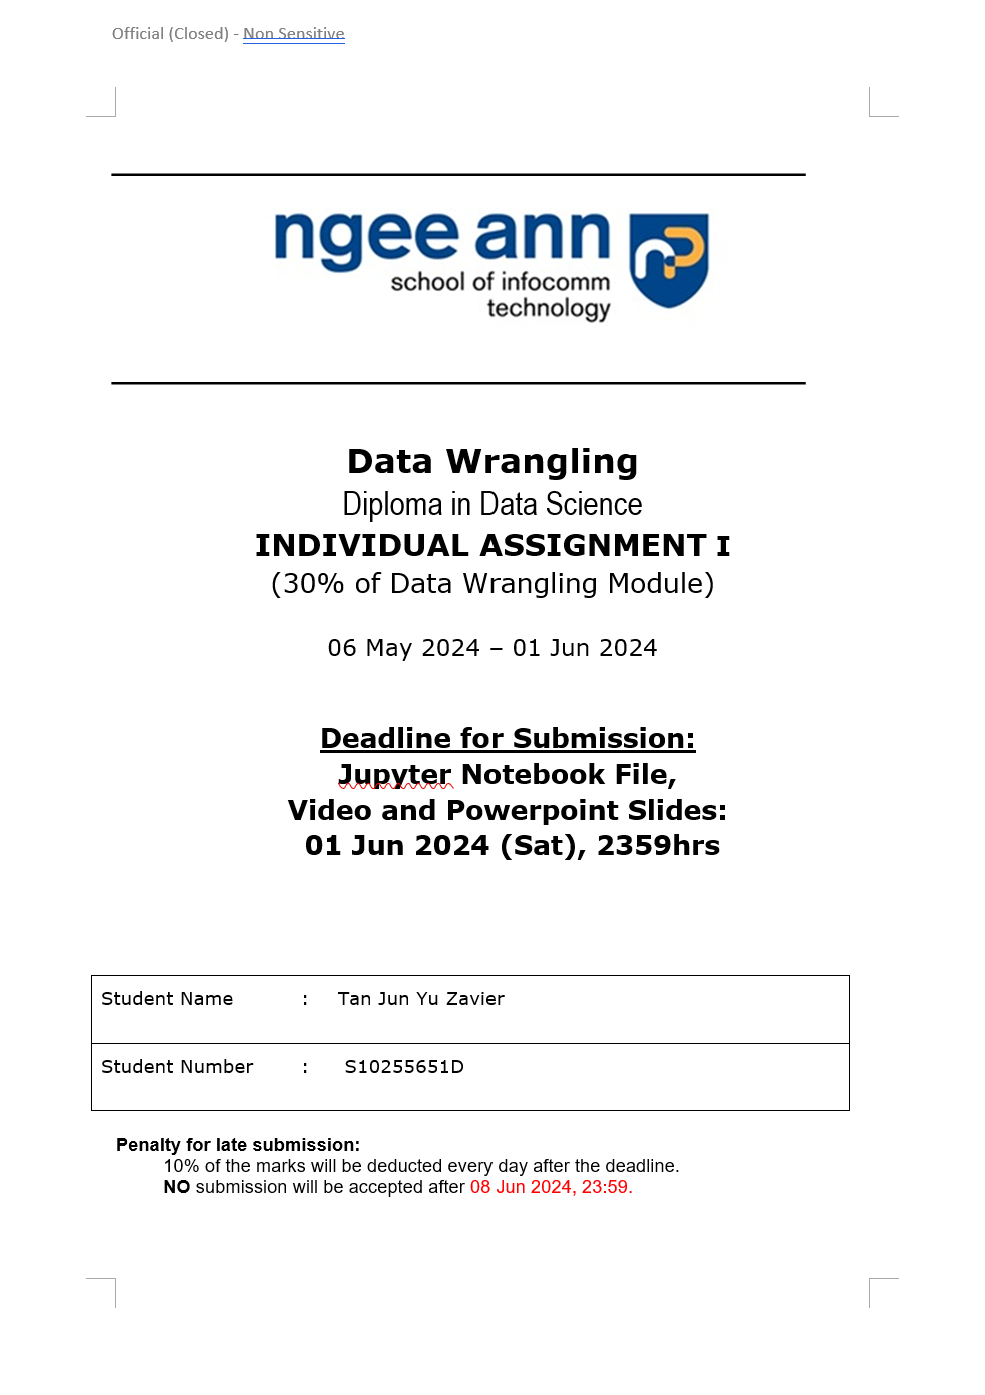

## Table of Content <a id="Table-of-Content"></a> 
- [Step 1: Load Data into Jupyter Notebook](#1.0)

- [Step 2: Exploratory Data Analysis](#2.0)
    - [2.1: Data Exploration](#2.1)
    - [2.2: Quantifying Missing Values](#2.2)
    - [2.3: Categorical & Numerical Variables](#2.3)
    - [2.4: Unique Values](#2.4)
    - [2.5: Exploring Song Popularity Relationship with Other Features](#2.5)
    - [2.6: Correlation](#2.6)
- [Step 3: Data Preprocessing](#3.0)
    - [3.1: Missing Value Replacement](#3.1)
    - [3.2: Dynamism Mapping](#3.2)
    - [3.3: Liveness Discrepancy](#3.3)
    - [3.4: Diagnostic Plot](#3.4)
    - [3.5: Transformation of Variables](#3.5)
    - [3.6: Remove Outliers for Multiple Variables](#3.6)
    - [3.7: Trimming Method](#3.7)
    - [3.8: Winsorization Method](#3.8)
    - [3.9: Drop Null Values for Liveness Column](#3.9)
- [Step 4: Train and Test Split](#4.0)
- [Step 5: Missing Value Imputation](#5.0)
    - [5.1: Using Imputation Pipeline](#5.1)
- [Step 6: Categorical Data Encoding](#6.0)
    - [6.1: Ordinal Encoding](#6.1)
    - [6.2: Yeo-Johnson Transformation](#6.2)
- [Step 7: Variable Discretization/Binning](#7.0)
- [Step 8: Feature Engineering](#8.0)
    - [8.1: Standardization](#8.1)
- [Step 9: Linear Regression Modelling](#9.0)
    - [9.1: Build Linear Regression Model](#9.1)
- [Step 10: Report Summary](#10.0)
    - [10.1: Introduction with Value-Based Problem Statement; Problem Understanding](#10.1)
    - [10.2: Exploratory Data Analysis](#10.2)
    - [10.3: Data Preprocessing](#10.3)
    - [10.4: Data Transformation](#10.4)
    - [10.5: Feature Engineering](#10.5)
    - [10.6: Linear Regression Modelling](#10.6)
    - [10.7: Conclusion](#10.7)
    - [10.8: References](#10.8)


In [1]:
# Import the pacakges
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For linear regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Sklearn preprocess
from sklearn.model_selection import train_test_split

# For the Q-Q plots
import scipy.stats as stats

# With open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer

# To impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# For discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

# Feature engine
import feature_engine.imputation as mdi
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.encoding import CountFrequencyEncoder

# The scaler - for standardization
from sklearn.preprocessing import StandardScaler

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a dictionary with the data dictionary information
data_dict = {
    'Feature': ['Song_Name', 'Song_Popularity', 'Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Speechiness', 'Tempo'],
    'Description': [
        'Name of the song',
        'Song Popularity',
        'Song Duration (ms)',
        'Measures the extent to which the music is made with acoustic instruments',
        'Quantifies how suitable a track is for dancing',
        'Energy of song',
        'Measures the extent to which the track is composed of instrumental sounds',
        'Quantifies the degree to which spoken word elements are present in a song',
        'Tempo of song'
    ]
}

# Create a DataFrame from the dictionary
data_dict_df = pd.DataFrame(data_dict)

# Display the DataFrame
data_dict_df

Feature                                        Description
0         Song_Name                                   Name of the song
1   Song_Popularity                                    Song Popularity
2  Song_Duration_ms                                 Song Duration (ms)
3      Acousticness  Measures the extent to which the music is made...
4      Danceability     Quantifies how suitable a track is for dancing
5            Energy                                     Energy of song
6  Instrumentalness  Measures the extent to which the track is comp...
7       Speechiness  Quantifies the degree to which spoken word ele...
8             Tempo                                      Tempo of song

## Step 1: Load Data into Jupyter Notebook <a id="1.0"></a>

[Back to Content](#Table-of-Content)

In [3]:
song_pop_data = pd.read_csv('./song_popularity.csv')
song_pop_data.head()

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3    122.7664           0   
2       0.72963    46.3          0.447000    0    157.5025           1   
3       0.44649    97.0          0.003550    0    121.4404           1   
4       0.44253    76.6          0.000000   10    123.8769           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

The dataset includes various features for each song, such as the song name, duration, acousticness, danceability, energy, etc. This initial preview shows us the structure and some sample data points, which help us understand what kind of data we're dealing with.

In [4]:
# Provide basic information about the dataframe
print("Basic information about the dataset:")
song_pop_data.info()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Son

The dataset contains 18 columns and 18,835 rows. Some columns have missing values (e.g., Danceability, Speechiness, Dynamism). The data types include integers, floats, and objects (likely strings). This summary helps us identify which columns need data type conversions and where we need to handle missing values.

In [5]:
# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
song_pop_data.describe()


Summary statistics of the dataset:


Song_Duration_ms  Acousticness  Danceability        Energy  \
count      1.883500e+04  18835.000000  15938.000000  18835.000000   
mean       2.182116e+05      0.253368      0.626669     64.499476   
std        5.988754e+04      0.282945      0.155086     21.410076   
min        1.200000e+04      0.000001      0.000000      0.107000   
25%        1.843395e+05      0.023618      0.526680     51.000000   
50%        2.113060e+05      0.129360      0.636570     67.400000   
75%        2.428440e+05      0.415520      0.740520     81.500000   
max        1.799346e+06      0.976080      0.977130     99.900000   

       Instrumentalness           Key    Audio_mode   Speechiness  \
count      18835.000000  18835.000000  18835.000000  13184.000000   
mean           0.078008      5.289196      0.628139    152.173475   
std            0.221591      3.614595      0.483314    155.018531   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      2.000000      0.000000     56.700000   
50%            0.000011      5.000000      1.000000     83.250000   
75%            0.002570      8.000000      1.000000    177.000000   
max            0.997000     11.000000      1.000000   1410.000000   

              Tempo  Audio_valence       Decibel  Song_Popularity  \
count  18835.000000   18835.000000  18835.000000     18835.000000   
mean     121.073154       0.527967     -7.447435        42.357670   
std       28.714456       0.244632      3.827831        13.949829   
min        0.000000       0.000000    -38.768000         0.000000   
25%       98.368000       0.335000     -9.044000        32.790000   
50%      120.013000       0.527000     -6.555000        42.730000   
75%      139.931000       0.725000     -4.908000        52.290000   
max      242.318000       0.984000      1.585000        99.320000   

          Indicator  
count  18835.000000  
mean      96.749215  
std       32.115110  
min        0.160000  
25%       76.500000  
50%      101.100000  
75%      122.250000  
max      149.850000

This summary provides insights into the distribution of numerical variables. For example, the mean song duration is about 218,212 ms (~3.6 minutes), and the average song popularity score is 42.36. We can see that there are large variations in some features (e.g., song duration and loudness). These statistics will help us in data preprocessing, particularly in handling outliers and transforming skewed distributions.

## Step 2: Exploratory Data Analysis <a id="2.0"></a>
[Back to Content](#Table-of-Content)

### 2.1 Data Exploration <a id="2.0"></a>
[Back to Contents](#table-of-contents)

In [6]:
song_pop_data

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0       HI8  Boulevard of Broken Dreams            262333      0.005410   
1      HI10                  In The End            216933      0.010094   
2      MI11           Seven Nation Army            231733      0.008007   
3       EI8                  By The Way            216933      0.025872   
4       HI9           How You Remind Me            223826      0.000935   
...     ...                         ...               ...           ...   
18830  LI20              Let It Breathe            159645      0.875140   
18831  LI18                     Answers            205666      0.749700   
18832  MI16      Sudden Love (Acoustic)            182211      0.830060   
18833  MI16           Gentle on My Mind            352280      0.926100   
18834  MI15                    Up to Me            193533      0.892780   

       Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0           0.49104    68.2          0.000029    8  112.126921           1   
1           0.53658    85.3          0.000000    3    122.7664           0   
2           0.72963    46.3          0.447000    0    157.5025           1   
3           0.44649    97.0          0.003550    0    121.4404           1   
4           0.44253    76.6          0.000000   10    123.8769           1   
...             ...     ...               ...  ...         ...         ...   
18830       0.49500    15.1          0.000065   11    123.4321           1   
18831       0.49005    16.1          0.000001   11    122.1025           0   
18832       0.71181    32.5          0.000000    0    126.5625           1   
18833       0.48312    32.6          0.015700    3    125.2161           1   
18834       0.63360    38.1          0.000254    4    121.8816           1   

       Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0            44.10  167.060          0.474     High   -4.095    Blare   
1              NaN  105.256          0.370     high   -6.407     Roar   
2           118.80  123.881          0.324      Med   -7.828     Roar   
3           160.50  122.444          0.198    Extra   -4.938    Blare   
4            46.95  172.011          0.574       Hi   -5.065    Blare   
...            ...      ...            ...      ...      ...      ...   
18830        52.20  113.969          0.300       Lo  -16.107  Chatter   
18831        45.15   94.286          0.265      Low  -14.078   Babble   
18832        53.25  130.534          0.286      NaN  -12.222   Babble   
18833        49.20  106.063          0.323   Medium  -12.020   Babble   
18834        45.30   91.490          0.581      Med  -11.790   Rumble   

       Song_Popularity  Indicator  
0                57.72     102.30  
1                45.37     127.95  
2                47.28      69.45  
3                52.89     145.50  
4                46.68     114.90  
...                ...        ...  
18830            31.80      22.65  
18831            32.91      24.15  
18832            15.18      48.75  
18833            33.01      48.90  
18834            37.11      57.15  

[18835 rows x 18 columns]

In [7]:
# Here is a look at the datatypes before any conversion
print("Data types:")
song_pop_data.dtypes

Data types:


Code                 object
Song_Name            object
Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness             object
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism             object
Decibel             float64
Loudness             object
Song_Popularity     float64
Indicator           float64
dtype: object

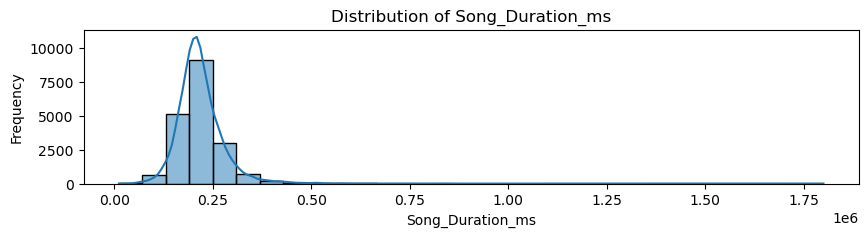

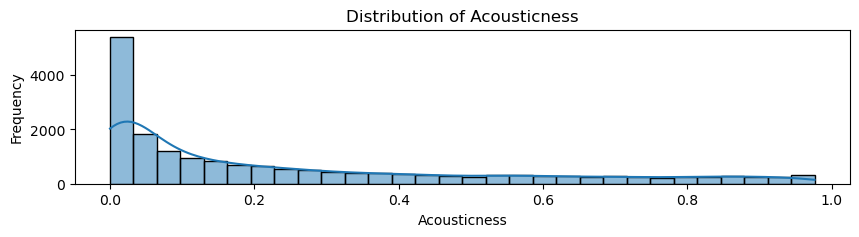

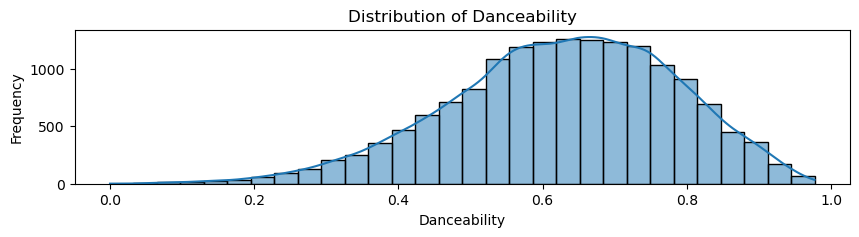

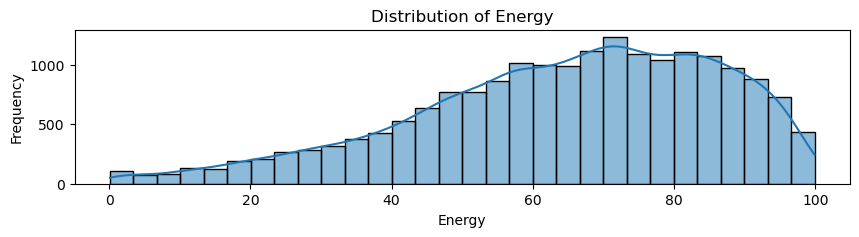

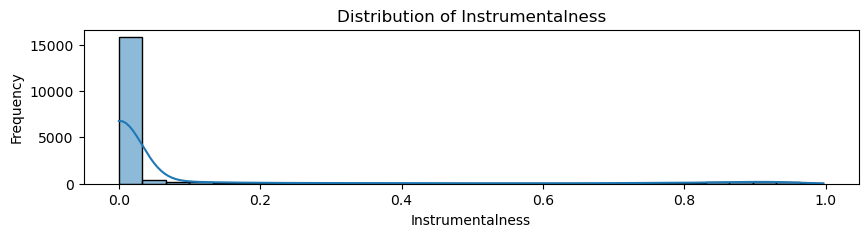

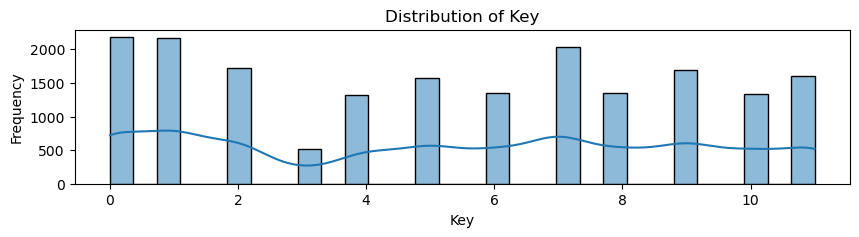

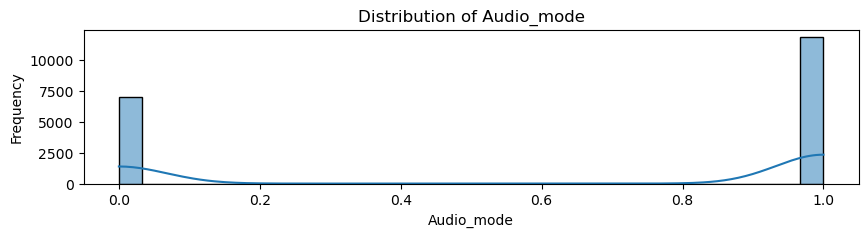

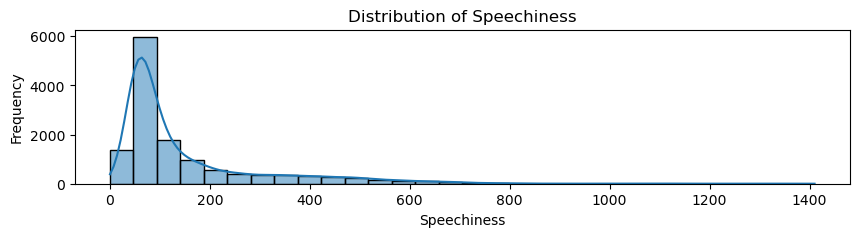

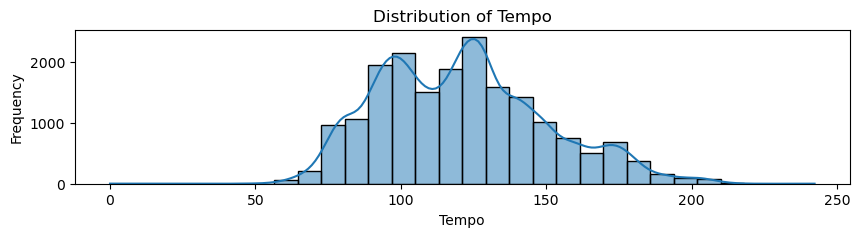

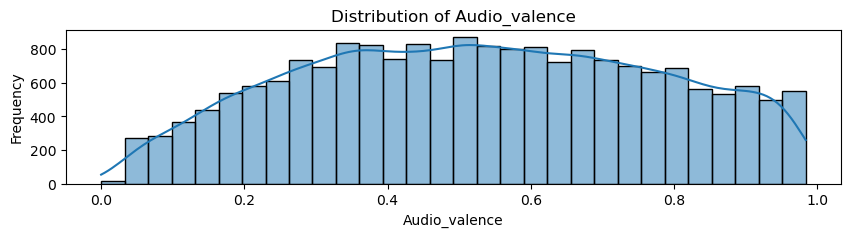

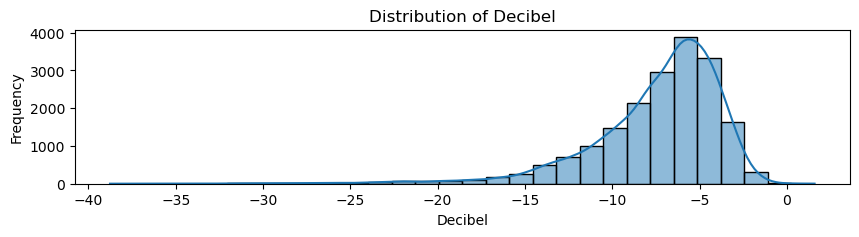

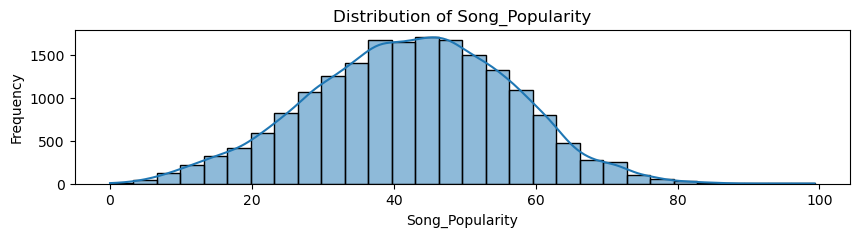

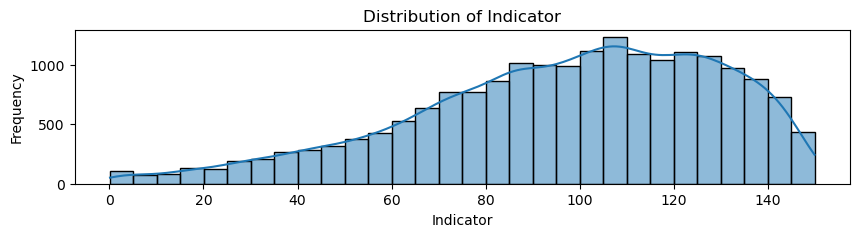

In [8]:
# plot the histogram to the numerical variables
for i in song_pop_data.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 2))
    sns.histplot(data=song_pop_data, x=i, bins=30, kde=True, edgecolor='k')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

### What This Plot Demonstrates

- **Data Distribution**: It shows the distribution of values for each numerical variable. This helps in understanding how the data is spread across different ranges.
- **Skewness**: It helps identify any skewness in the data. For example, variables like `Acousticness` and `Speechiness` show right-skewed distributions.
- **Outliers**: It can help in identifying the presence of outliers. For instance, variables like `Instrumentalness` and `Speechiness` have extreme values that may be considered outliers.
- **Central Tendency**: It gives an idea of the central tendency (mean, median) of the data. For instance, `Song_Popularity` appears to have a normal distribution centered around its mean.
- **Range of Values**: It highlights the range of values each variable can take. For example, `Tempo` has a distinct multimodal distribution indicating several peaks within the range.

### 2.2 Quantifying Missing Values <a id="2.2"></a>
[Back to Content](#Table-of-Content)

In [9]:
# I will check the total number and mean percentage of missing values first

# Quantify the total number of missing values
missing_data = song_pop_data.isnull().sum()

# Quantify the mean of missing values
missing_data_mean = song_pop_data.isnull().mean()
missing_data_mean_percent = missing_data_mean * 100

# Now I will combine them side by side for easy viewing.
missing_values_summary = pd.DataFrame({'Missing Values': missing_data,'Mean Percentage': missing_data_mean_percent})

# To sort by 'Missing Values' in ascending order
missing_values_summary = missing_values_summary.sort_values(by='Missing Values')

print(missing_values_summary)

                  Missing Values  Mean Percentage
Code                           0         0.000000
Loudness                       0         0.000000
Decibel                        0         0.000000
Audio_valence                  0         0.000000
Tempo                          0         0.000000
Audio_mode                     0         0.000000
Song_Popularity                0         0.000000
Liveness                       0         0.000000
Instrumentalness               0         0.000000
Energy                         0         0.000000
Acousticness                   0         0.000000
Song_Duration_ms               0         0.000000
Song_Name                      0         0.000000
Key                            0         0.000000
Indicator                      0         0.000000
Danceability                2897        15.380940
Dynamism                    3698        19.633661
Speechiness                 5651        30.002655


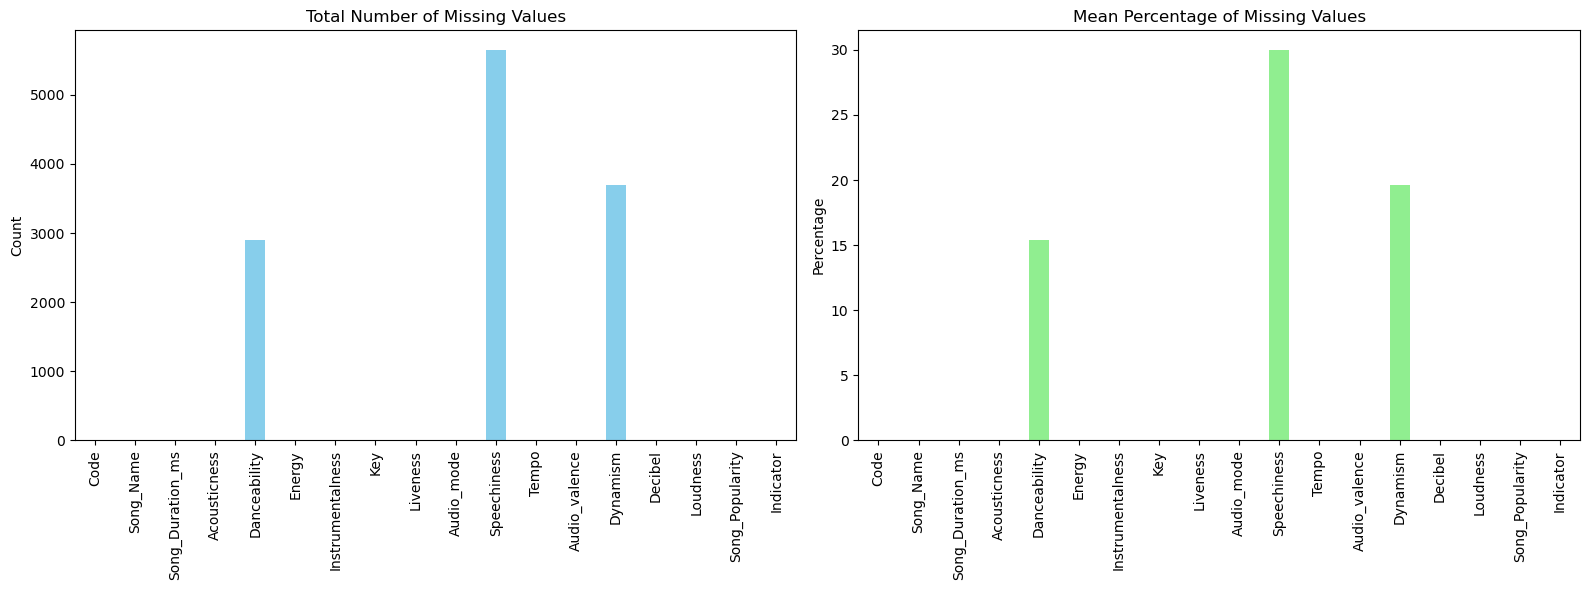

In [10]:
# Now I will plot two bar charts side by side to visualize it

# Plot the data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the total number of missing values
missing_data.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Number of Missing Values')
axes[0].set_ylabel('Count')

# Plot the mean percentage of missing values
missing_data_mean_percent.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Mean Percentage of Missing Values')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

### 2.3 Categorical & Numercial Variables <a id="2.3"></a>
[Back to Content](#Table-of-Content)

In [11]:
# Find categorical variables
cat_cols = [c for c in song_pop_data.columns if song_pop_data[c].dtypes == 'O']

# Calculate the sum and mean (percentage) of missing values
missing_sum = song_pop_data[cat_cols].isnull().sum()
missing_mean = song_pop_data[cat_cols].isnull().mean() * 100

missing_summary_cat = pd.DataFrame({'Missing Values': missing_sum,'Mean Percentage': missing_mean})

# To sort by 'Missing Values' in ascending order
missing_summary_cat = missing_summary_cat.sort_values(by='Missing Values')

print(missing_summary_cat)

           Missing Values  Mean Percentage
Code                    0         0.000000
Song_Name               0         0.000000
Liveness                0         0.000000
Loudness                0         0.000000
Dynamism             3698        19.633661


In [12]:
# Find numerical variables
num_cols = [n for n in song_pop_data.columns if song_pop_data[n].dtypes != 'O']

# Calculate the sum and mean (percentage) of missing values
missing_sum_num = song_pop_data[num_cols].isnull().sum()
missing_mean_num = song_pop_data[num_cols].isnull().mean() * 100

missing_summary_num = pd.DataFrame({'Missing Values': missing_sum_num,'Mean Percentage': missing_mean_num})

# To sort by 'Missing Values' in ascending order
missing_summary_num = missing_summary_num.sort_values(by='Missing Values')

print(missing_summary_num)

                  Missing Values  Mean Percentage
Song_Duration_ms               0         0.000000
Acousticness                   0         0.000000
Energy                         0         0.000000
Instrumentalness               0         0.000000
Key                            0         0.000000
Audio_mode                     0         0.000000
Tempo                          0         0.000000
Audio_valence                  0         0.000000
Decibel                        0         0.000000
Song_Popularity                0         0.000000
Indicator                      0         0.000000
Danceability                2897        15.380940
Speechiness                 5651        30.002655


### 2.4 Unique Values <a id="2.4"></a>
[Back to Content](#Table-of-Content)

In [13]:
# Get the number of unique values for each column
unique_counts = song_pop_data.nunique()

# Get the total number of rows
total_rows = len(song_pop_data)

# Calculate the number of repeated values for each column
repeated_counts = total_rows - unique_counts

# Create a summary DataFrame
unique_summary = pd.DataFrame({'Unique Values': unique_counts,'Total Rows': total_rows,'Repeated Values': repeated_counts})

# Display the summary
unique_summary = unique_summary.sort_values(by='Repeated Values', ascending=False)
print("Unique values and repetition summary:")
print(unique_summary)

Unique values and repetition summary:
                  Unique Values  Total Rows  Repeated Values
Audio_mode                    2       18835            18833
Dynamism                     11       18835            18824
Key                          12       18835            18823
Loudness                     19       18835            18816
Code                        186       18835            18649
Danceability                834       18835            18001
Indicator                  1127       18835            17708
Energy                     1132       18835            17703
Speechiness                1193       18835            17642
Audio_valence              1246       18835            17589
Liveness                   1426       18835            17409
Acousticness               3207       18835            15628
Instrumentalness           3925       18835            14910
Song_Popularity            5149       18835            13686
Decibel                    8416       18835    

In [14]:
# Calculate the frequency of each value in the 'Audio_mode' column (Did not use as not useful)
#Audio_mode_frequency = song_pop_data['Audio_mode'].value_counts()

# Plot the frequency with a bar graph using Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))
#ax.bar(Audio_mode_frequency.index, Audio_mode_frequency.values)
#ax.set_xlabel('Audio Mode')
#ax.set_ylabel('Frequency')
#ax.set_title('Frequency of Values in Audio Mode Column')
#plt.xticks(rotation=0)
#plt.show()

### 2.5 Exploring Song Popularity Relationship with Other Features <a id="2.5"></a>
[Back to Content](#Table-of-Content)

In [15]:
song_pop_data.head()

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3    122.7664           0   
2       0.72963    46.3          0.447000    0    157.5025           1   
3       0.44649    97.0          0.003550    0    121.4404           1   
4       0.44253    76.6          0.000000   10    123.8769           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

#### Song Popularity Relationship with Loudness

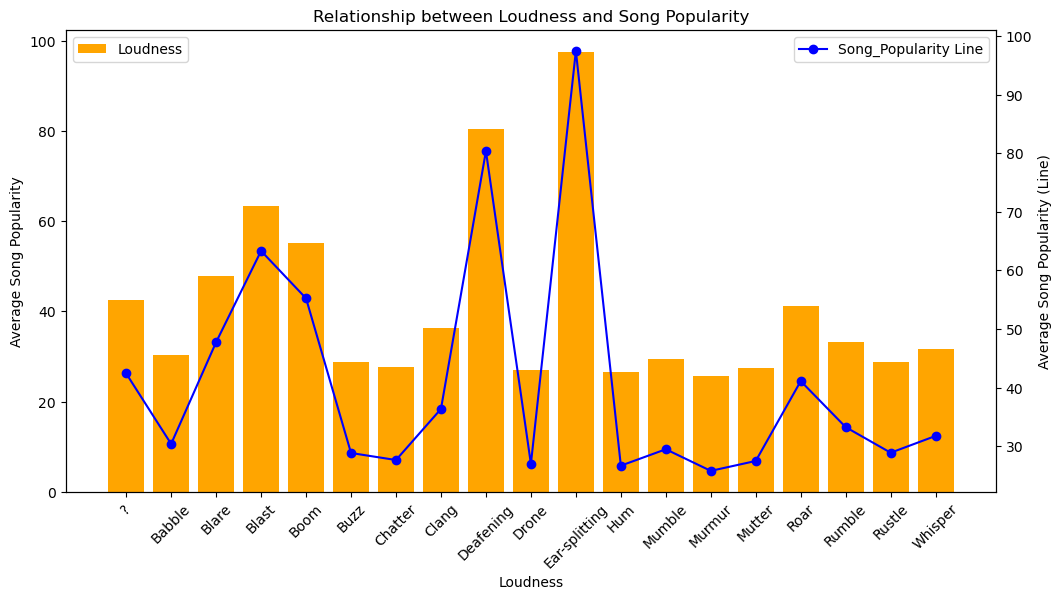

In [16]:
# Grouping the data by 'Loudness' and calculating the mean Song_Popularity
grouped_data = song_pop_data.groupby('Loudness')['Song_Popularity'].mean().reset_index()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(grouped_data['Loudness'], grouped_data['Song_Popularity'], color='orange', label='Loudness')
ax1.set_xlabel('Loudness')
ax1.set_ylabel('Average Song Popularity')
ax1.set_title('Relationship between Loudness and Song Popularity')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Create the line chart
ax2 = ax1.twinx()
line = ax2.plot(grouped_data['Loudness'], grouped_data['Song_Popularity'], color='blue', marker='o', label='Song_Popularity Line')
ax2.set_ylabel('Average Song Popularity (Line)')

# Add legends
bars_legend = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
line_legend = ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

By observing the relationship between Song Popularity and Loudness, this is what I can infer...

1. **General Trend**:
   - The average song popularity shows significant fluctuations across different loudness categories, indicating a non-linear relationship between loudness and song popularity.

2. **Low to Moderate Loudness**:
   - Categories such as "Babble," "Chatter," "Hum," "Mumble," "Murmur," "Mutter," and "Whisper" have relatively lower average song popularity.
   - This suggests that songs with low to moderate loudness levels are generally less popular.

3. **Moderate to High Loudness**:
   - Categories like "Blare," "Blast," "Clang," and "Roar" show higher average song popularity.
   - This indicates that songs with moderate to high loudness levels are more popular, possibly because they are more energetic and engaging.

4. **Very High Loudness**:
   - The categories "Deafening" and "Ear-splitting" exhibit the highest peaks in average song popularity.
   - These categories suggest that songs with very high loudness levels can achieve high popularity, though this trend is not consistent across all loudness categories.

5. **Inconsistent Popularity**:
   - The loudness categories "Boom," "Buzz," "Drone," and "Rumble" show varying levels of average song popularity.
   - This inconsistency indicates that factors other than loudness might also play significant roles in determining song popularity.

### Conclusion:
- The relationship between loudness and song popularity is complex and non-linear, with certain loudness levels correlating with higher popularity.
- Very high loudness levels ("Deafening" and "Ear-splitting") can lead to peaks in popularity, suggesting that listeners may prefer highly loud and energetic songs.
- However, the inconsistent popularity across other loudness categories indicates that loudness alone does not determine song popularity, and other musical factors are likely at play.


#### Song Popularity Relationship with Liveness

C:\Users\zavie\AppData\Local\Temp\ipykernel_29444\2542399871.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_liveness_binned = song_pop_data.groupby(bins)['Song_Popularity'].mean().reset_index()


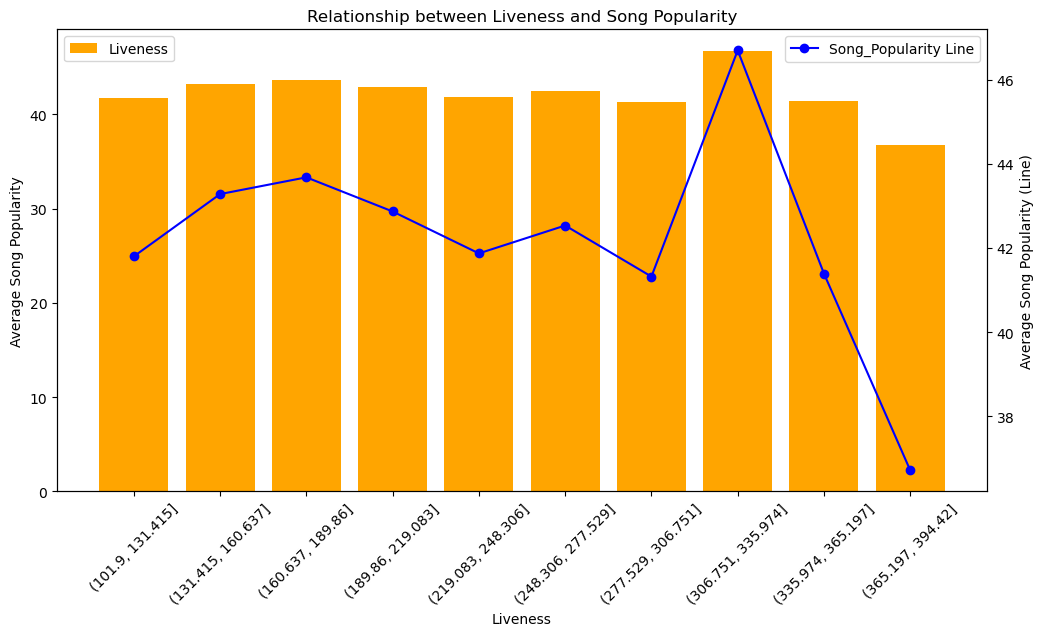

In [17]:
# Convert Liveness to numeric, coercing errors to NaN
song_pop_data['Liveness'] = pd.to_numeric(song_pop_data['Liveness'], errors='coerce')

# Create bins for Liveness
bins = pd.cut(song_pop_data['Liveness'], bins=10)
grouped_data_liveness_binned = song_pop_data.groupby(bins)['Song_Popularity'].mean().reset_index()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(grouped_data_liveness_binned['Liveness'].astype(str), grouped_data_liveness_binned['Song_Popularity'], color='orange', label='Liveness')
ax1.set_xlabel('Liveness')
ax1.set_ylabel('Average Song Popularity')
ax1.set_title('Relationship between Liveness and Song Popularity')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Create the line chart
ax2 = ax1.twinx()
line = ax2.plot(grouped_data_liveness_binned['Liveness'].astype(str), grouped_data_liveness_binned['Song_Popularity'], color='blue', marker='o', label='Song_Popularity Line')
ax2.set_ylabel('Average Song Popularity (Line)')

# Add legends
bars_legend = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
line_legend = ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

By observing the relationship between Song Popularity and Liveness, this what I can infer...

1. **General Trend**:
   - The average song popularity appears to fluctuate across the different binned ranges of liveness.

2. **Moderate Liveness (101.9 to 131.415)**:
   - In the initial range (101.9 to 131.415), song popularity starts at a moderate level.
   - The popularity increases slightly in the subsequent bins, peaking around the mid-range liveness values.

3. **Peak Popularity**:
   - The highest average song popularity is observed in the bin (306.751 to 335.974), indicating that songs with liveness values in this range are the most popular.
   - This suggests that there might be an optimal liveness range where songs are perceived as highly engaging.

4. **Decline in Popularity**:
   - After the peak, the popularity declines sharply in the next bin (335.974 to 365.197), and it continues to decrease in the final bin (365.197 to 394.42).
   - This suggests that very high liveness values might not be as favorable for song popularity.

5. **Consistent Popularity**:
   - The bins from (131.415 to 306.751) show relatively consistent average popularity, with minor fluctuations. This indicates a stable popularity trend across moderate liveness values.

6. **Low Popularity at Extremes**:
   - The lowest average popularity is found in the highest liveness bin (365.197 to 394.42), suggesting that extremely high liveness might negatively impact song popularity.

#### Song Popularity Relationship with Energy

C:\Users\zavie\AppData\Local\Temp\ipykernel_29444\4216754344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_energy_binned = song_pop_data.groupby(bins)['Song_Popularity'].mean().reset_index()


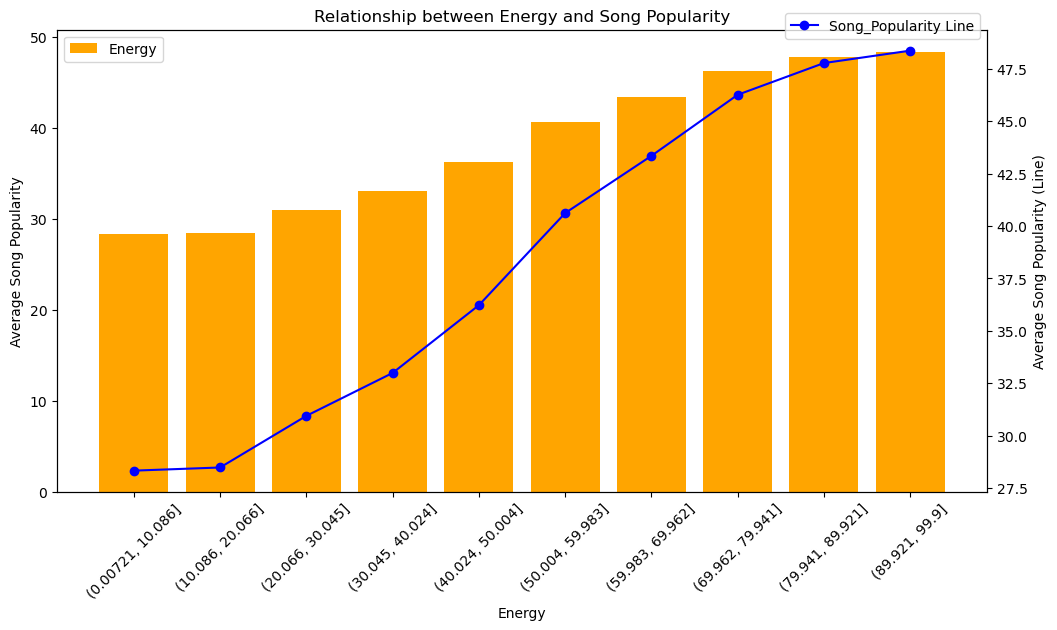

In [18]:
# Create bins for Energy
bins = pd.cut(song_pop_data['Energy'], bins=10)
grouped_data_energy_binned = song_pop_data.groupby(bins)['Song_Popularity'].mean().reset_index()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(grouped_data_energy_binned['Energy'].astype(str), grouped_data_energy_binned['Song_Popularity'], color='orange', label='Energy')
ax1.set_xlabel('Energy')
ax1.set_ylabel('Average Song Popularity')
ax1.set_title('Relationship between Energy and Song Popularity')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Create the line chart
ax2 = ax1.twinx()
line = ax2.plot(grouped_data_energy_binned['Energy'].astype(str), grouped_data_energy_binned['Song_Popularity'], color='blue', marker='o', label='Song_Popularity Line')
ax2.set_ylabel('Average Song Popularity (Line)')

# Add legends
bars_legend = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
line_legend = ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.05))

plt.show()

By observing the relationship between Song Popularity and Liveness, this what I can infer...

1. **General Trend**:
   - There is a clear upward trend in song popularity with increasing energy levels, suggesting a strong positive correlation between energy and song popularity.

2. **Low to Moderate Energy (0.00721 to 30.045)**:
   - In the initial energy bins (0.00721 to 30.045), the average song popularity is relatively low but starts to increase gradually.
   - This indicates that songs with very low energy levels tend to be less popular, but even a slight increase in energy can lead to a noticeable rise in popularity.

3. **Moderate to High Energy (30.045 to 69.962)**:
   - The bins from 30.045 to 69.962 show a steady increase in average song popularity.
   - This range represents a significant improvement in song popularity as energy levels increase, suggesting that moderate to high energy songs are generally more favored by listeners.

4. **High to Very High Energy (69.962 to 99.9)**:
   - The highest average song popularity is observed in the energy bins from 79.941 to 99.9.
   - Songs with very high energy levels (above 69.962) enjoy the highest popularity, indicating that listeners have a strong preference for highly energetic and intense songs.

### 2.6 Correlation <a id="2.6"></a>
[Back to Content](#Table-of-Content)

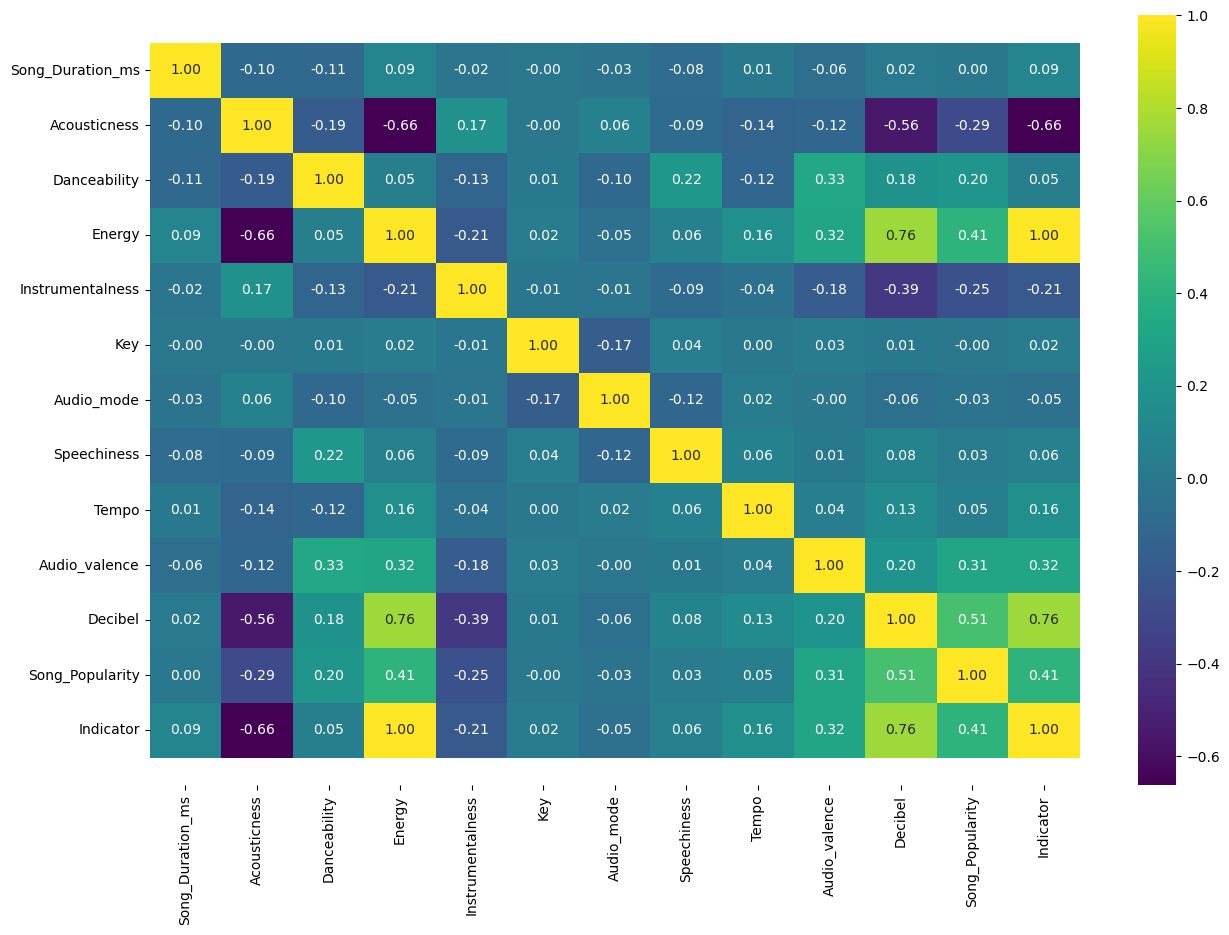

In [19]:
# Visualize the correlation through HeatMap
plt.rcParams['figure.figsize'] = (15, 10)
ax = sns.heatmap(song_pop_data[num_cols].corr(), annot=True, fmt=".2f", cmap='viridis')

# Adjust the bottom and top margins to make sure the heatmap is displayed correctly
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

### Observations from the Correlation Matrix

Based on the heatmap of the correlation matrix, several observations can be made regarding the relationships between the numerical variables in the dataset:

1. **High Positive Correlations**:
   - **Energy and Decibel**: There is a strong positive correlation (0.76) between `Energy` and `Decibel`. This suggests that songs with higher energy levels tend to have higher decibel levels (louder volume).
   - **Song_Popularity and Decibel**: There is a moderate positive correlation (0.51) between `Song_Popularity` and `Decibel`. Popular songs tend to be louder.
   - **Song_Popularity and Energy**: There is a moderate positive correlation (0.41) between `Song_Popularity` and `Energy`. More popular songs tend to have higher energy levels.
   - **Danceability and Audio_valence**: There is a positive correlation (0.33) between `Danceability` and `Audio_valence`. Songs that are more danceable tend to have higher valence (more positive emotions).

2. **Negative Correlations**:
   - **Acousticness and Energy**: There is a strong negative correlation (-0.66) between `Acousticness` and `Energy`. Songs with high acousticness tend to have lower energy levels.
   - **Acousticness and Decibel**: There is a moderate negative correlation (-0.56) between `Acousticness` and `Decibel`. Songs with high acousticness tend to be quieter.

3. **Other Notable Correlations**:
   - **Instrumentalness and Acousticness**: There is a moderate positive correlation (0.17) between `Instrumentalness` and `Acousticness`. Instrumental songs tend to have higher acousticness.
   - **Audio_valence and Energy**: There is a positive correlation (0.32) between `Audio_valence` and `Energy`. Songs with higher valence tend to have higher energy levels.

4. **Weak or No Correlation**:
   - **Key, Tempo, Liveness, Audio_mode, Speechiness**: These variables show weak or no significant correlation with most other variables in the dataset.


## Step 3: Data Preprocessing <a id="3.0"></a>
[Back to Content](#Table-of-Content)

### 3.1 Missing Value Replacement <a id="3.1"></a>
[Back to Content](#Table-of-Content)

In [20]:
# As observed, there are '?' seen. So i will be replacing them to 'NaN' instead.
song_pop_data.head(20)

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0    HI8  Boulevard of Broken Dreams            262333      0.005410   
1   HI10                  In The End            216933      0.010094   
2   MI11           Seven Nation Army            231733      0.008007   
3    EI8                  By The Way            216933      0.025872   
4    HI9           How You Remind Me            223826      0.000935   
5    EI7            Bring Me To Life            235893      0.008771   
6    HI7                 Last Resort            199893      0.000494   
7    EI7    Are You Gonna Be My Girl            213800      0.001450   
8    EI7              Mr. Brightside            222586      0.001058   
9    EI9                 Sex on Fire            203346      0.001686   
10   HI7                  The Middle            168253      0.041552   
11   HI8                        Numb            185586      0.004508   
12   EI8             Smooth Criminal            209266      0.004253   
13   EI7                  Can't Stop            269000      0.017542   
14   EI7                  Chop Suey!            210240      0.000346   
15  HI12                 Take Me Out            237026      0.000415   
16  HI10                  I Miss You            227240      0.001333   
17   EI8                 Best of You            256600      0.006870   
18   HI8  I Write Sins Not Tragedies            187613      0.091924   
19   HI9                  Kryptonite            233933      0.006507   

    Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0        0.49104    68.2          0.000029    8  112.126921           1   
1        0.53658    85.3          0.000000    3  122.766400           0   
2        0.72963    46.3          0.447000    0  157.502500           1   
3        0.44649    97.0          0.003550    0  121.440400           1   
4        0.44253    76.6          0.000000   10  123.876900           1   
5        0.31284    94.5          0.000002    4  194.881600           0   
6        0.57519    88.7          0.001110    4  160.782400           0   
7        0.60687    95.3          0.000582    2         NaN           1   
8        0.32670    93.6          0.000000    1  119.377476           1   
9        0.53658    90.5          0.010400    9  129.049600           1   
10           NaN    89.7          0.000000    2  159.516900           1   
11       0.49104    86.3          0.000000    9  268.632100           1   
12           NaN    96.4          0.003600    9  132.250000           0   
13       0.61182    93.8          0.000000    9  136.188900           1   
14       0.41580    92.9          0.000747    7  125.888400           0   
15       0.27522    67.6          0.000899    9  129.049600           1   
16       0.65241    77.8          0.000007   11  117.527281           1   
17       0.36630    94.4          0.000003    1  128.822500           0   
18           NaN    79.5          0.000000    9  124.099600           0   
19       0.53955    86.5          0.000011   11  136.422400           0   

    Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0         44.10  167.060          0.474     High   -4.095    Blare   
1           NaN  105.256          0.370     high   -6.407     Roar   
2        118.80  123.881          0.324      Med   -7.828     Roar   
3        160.50  122.444          0.198    Extra   -4.938    Blare   
4         46.95  172.011          0.574       Hi   -5.065    Blare   
5           NaN  189.931          0.320    Extra   -3.169        ?   
6         93.60   90.578          0.724     High   -3.659     Boom   
7           NaN  105.046          0.537    Extra   -3.435     Boom   
8           NaN  148.112          0.234      NaN   -3.660     Boom   
9         81.00  153.398          0.374    Extra   -5.653    Blare   
10        72.45  161.944          0.930      NaN   -3.401        ?   
11          NaN  110.018          0.243     high   -4.153    Blare   
12   

In [21]:
# This should ensure the changes.
song_pop_data = song_pop_data.replace('?', np.nan)

In [22]:
# Let's check again if its better

# Quantify the total number of missing values
missing_data = song_pop_data.isnull().sum()

# Quantify the mean of missing values
missing_data_mean = song_pop_data.isnull().mean()
missing_data_mean_percent = missing_data_mean * 100

# Now I will combine them side by side for easy viewing.
missing_data_summary = pd.DataFrame({'Missing Values': missing_data,'Mean Percentage': missing_data_mean_percent})

# To sort by 'Missing Values' in ascending order (default):
missing_data_summary = missing_data_summary.sort_values(by='Missing Values')

print(missing_data_summary)

                  Missing Values  Mean Percentage
Code                           0         0.000000
Decibel                        0         0.000000
Audio_valence                  0         0.000000
Tempo                          0         0.000000
Audio_mode                     0         0.000000
Song_Popularity                0         0.000000
Key                            0         0.000000
Indicator                      0         0.000000
Energy                         0         0.000000
Acousticness                   0         0.000000
Song_Duration_ms               0         0.000000
Song_Name                      0         0.000000
Instrumentalness               0         0.000000
Liveness                       1         0.005309
Loudness                    1902        10.098221
Danceability                2897        15.380940
Dynamism                    3698        19.633661
Speechiness                 5651        30.002655


Initially there was only 3 variables "Danceability", "Speechiness", "Dynamism". However after conversion, now 2 more variables appears "Liveness" and "Loudness". 

### 3.2 Dynamism Mapping <a id="3.2"></a>
[Back to Content](#Table-of-Content)

In [23]:
song_pop_data.head()

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3  122.766400           0   
2       0.72963    46.3          0.447000    0  157.502500           1   
3       0.44649    97.0          0.003550    0  121.440400           1   
4       0.44253    76.6          0.000000   10  123.876900           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

Another observation I spotted was that Dynamism has different names like 'High' and 'high'. I believe they are the same thing so I will be mapping them togther.

Dynamism
Hi        3800
High      3766
Medium    2553
Med       2529
Extra     1635
Low        274
Lo         272
high       127
m           99
h           50
l           32
Name: count, dtype: int64


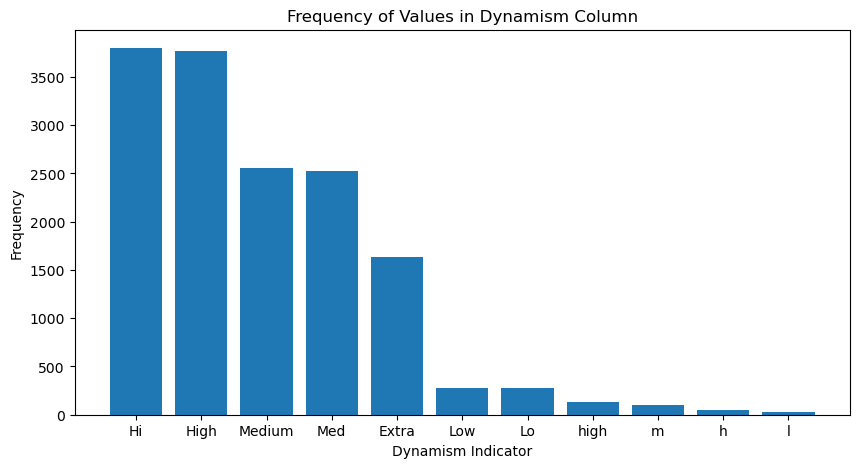

In [24]:
# Dynamism before mapping
print(song_pop_data['Dynamism'].value_counts())

# Calculate the frequency of each value in the 'Dynamism' column
Dynamism_frequency = song_pop_data['Dynamism'].value_counts()

# Plot the frequency with a bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(Dynamism_frequency.index, Dynamism_frequency.values)
ax.set_xlabel('Dynamism Indicator')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Values in Dynamism Column')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Create a mapping dictionary
dynamism_mapping = {
    'Hi': 'High',
    'High': 'High',
    'Medium': 'Medium',
    'Med': 'Medium',
    'Low': 'Low',
    'Lo': 'Low',
    'Extra': 'Extra',
    'high': 'High',
    'm': 'Medium',
    'h': 'High',
    'l': 'Low'
}

# Apply the mapping to the 'Dynamism' column
song_pop_data['Dynamism'] = song_pop_data['Dynamism'].replace(dynamism_mapping)

Dynamism
High      7743
Medium    5181
Extra     1635
Low        578
Name: count, dtype: int64


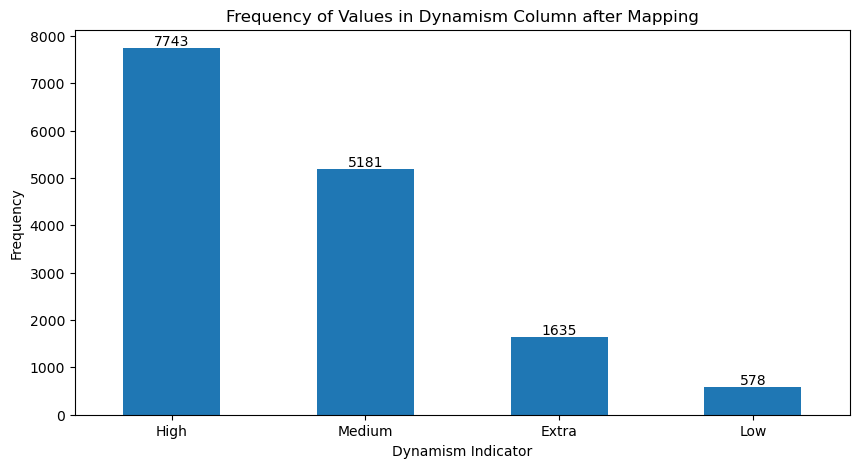

In [26]:
# Verify the mapping
print(song_pop_data['Dynamism'].value_counts())

# Calculate the frequency of each value in the 'Dynamism' column after mapping
Dynamism_frequency_mapped = song_pop_data['Dynamism'].value_counts()

# Plot the frequency with a bar graph
fig = Dynamism_frequency_mapped.sort_values(ascending=False).plot.bar(figsize=(10, 5))

# Add labels and title
fig.set_ylabel('Frequency')
fig.set_xlabel('Dynamism Indicator')
fig.set_title('Frequency of Values in Dynamism Column after Mapping')

# Add text labels on the bars
for p in fig.patches:
    fig.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points')

# Display the graph
plt.xticks(rotation=0)
plt.show()

### Dynamism Ralationship with other Variables

#### Dynamism Relationship with Energy

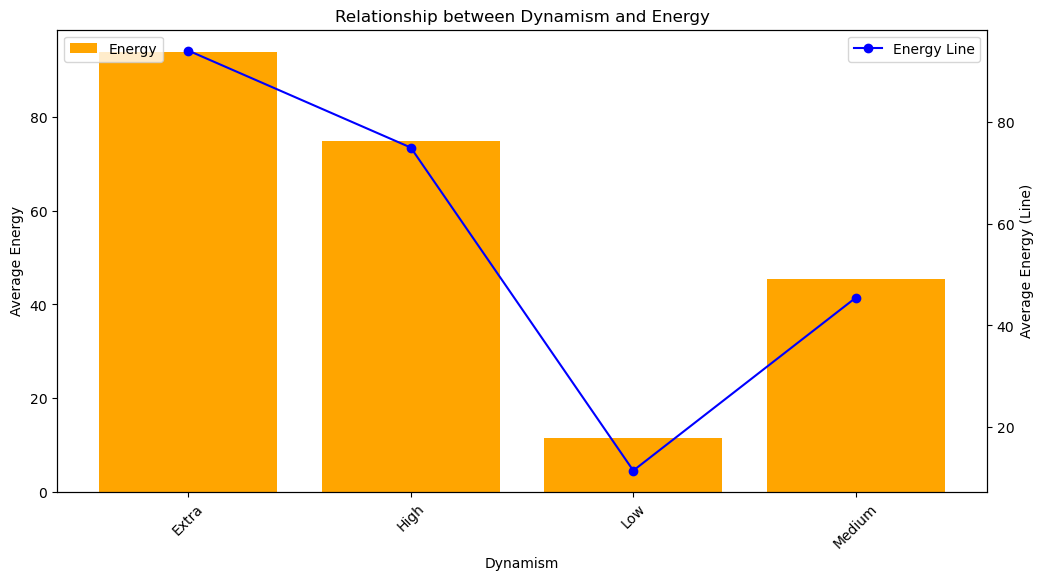

In [27]:
# Grouping the data by 'Dynamism' and calculating the mean Energy
grouped_data_dynamism_energy = song_pop_data.groupby('Dynamism')['Energy'].mean().reset_index()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(grouped_data_dynamism_energy['Dynamism'], grouped_data_dynamism_energy['Energy'], color='orange', label='Energy')
ax1.set_xlabel('Dynamism')
ax1.set_ylabel('Average Energy')
ax1.set_title('Relationship between Dynamism and Energy')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Create the line chart
ax2 = ax1.twinx()
line = ax2.plot(grouped_data_dynamism_energy['Dynamism'], grouped_data_dynamism_energy['Energy'], color='blue', marker='o', label='Energy Line')
ax2.set_ylabel('Average Energy (Line)')

# Add legends with adjusted positions
bars_legend = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
line_legend = ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

In [28]:
# Verify the data aggregation
print(grouped_data_dynamism_energy)

  Dynamism     Energy
0    Extra  94.032232
1     High  74.952486
2      Low  11.420394
3   Medium  45.419185


By examining the relationship between Dynamism and Energy, we can gain insights into how these characteristics interact and influence each other. For example:

- **Extra Dynamism**: Songs with "Extra" dynamism have the highest average energy levels, indicating that these songs are highly intense and active.
- **High Dynamism**: The energy levels for songs with "High" dynamism are also quite elevated, but slightly lower than those with "Extra" dynamism.
- **Medium Dynamism**: Energy levels are moderate for "Medium" dynamism, suggesting a balanced intensity.
- **Low Dynamism**: Songs with "Low" dynamism have the lowest average energy, indicating these songs are the least intense and active.

#### Dynamism Relationship with Song Popularity

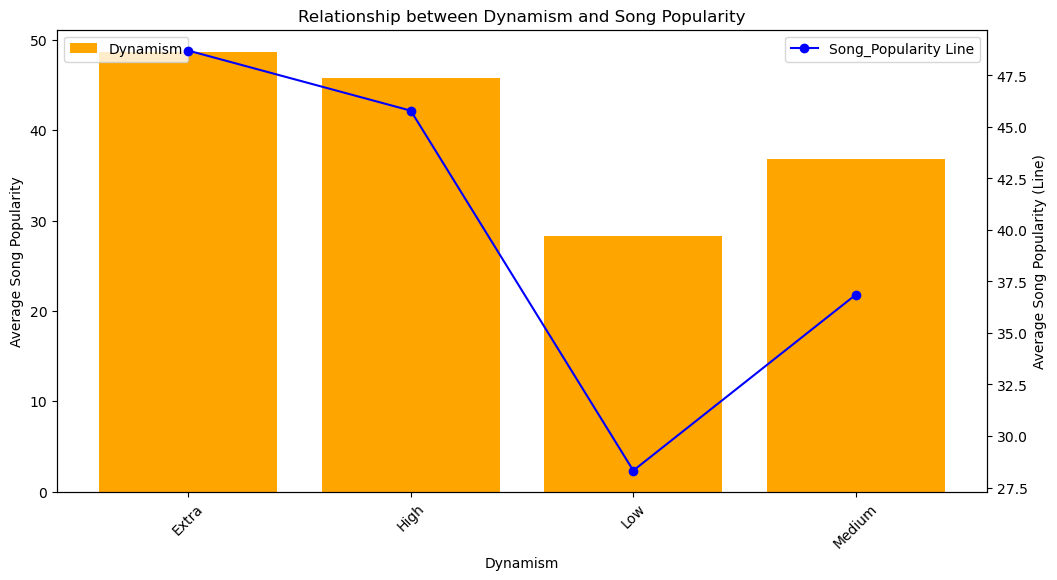

In [29]:
# Grouping the data by 'Dynamism' and calculating the mean Song_Popularity
grouped_data_dynamism = song_pop_data.groupby('Dynamism')['Song_Popularity'].mean().reset_index()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(grouped_data_dynamism['Dynamism'], grouped_data_dynamism['Song_Popularity'], color='orange', label='Dynamism')
ax1.set_xlabel('Dynamism')
ax1.set_ylabel('Average Song Popularity')
ax1.set_title('Relationship between Dynamism and Song Popularity')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Create the line chart
ax2 = ax1.twinx()
line = ax2.plot(grouped_data_dynamism['Dynamism'], grouped_data_dynamism['Song_Popularity'], color='blue', marker='o', label='Song_Popularity Line')
ax2.set_ylabel('Average Song Popularity (Line)')

# Add legends
bars_legend = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
line_legend = ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

By examining the relationship between **Dynamism** and **Song Popularity**, we can gain insights into how the variability in a song's structure and intensity might influence its popularity among listeners. For example:

- **Extra Dynamism**: Songs with "Extra" dynamism are among the most popular, showing that high dynamism can be associated with higher popularity.
- **High Dynamism**: Similarly, songs with "High" dynamism also enjoy high popularity.
- **Medium Dynamism**: These songs have moderate popularity, slightly lower than "Extra" and "High" but still significant.
- **Low Dynamism**: Songs with "Low" dynamism are the least popular, indicating a potential preference for more dynamic and active songs among listeners.

In [30]:
# Verify the data aggregation
print(grouped_data_dynamism)

  Dynamism  Song_Popularity
0    Extra        48.697755
1     High        45.783112
2      Low        28.324152
3   Medium        36.854930


So far looks the same as the initial one. I'll check against the actual data to see if each datatype matches.

In [31]:
# Seems conversion was done, lets check the datatypes again and compare it against the initial.
song_pop_data.dtypes

Code                 object
Song_Name            object
Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness            float64
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism             object
Decibel             float64
Loudness             object
Song_Popularity     float64
Indicator           float64
dtype: object

### 3.3 Liveness Discrepancy <a id="3.3"></a>
[Back to Content](#Table-of-Content)

In [32]:
song_pop_data.head()

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3  122.766400           0   
2       0.72963    46.3          0.447000    0  157.502500           1   
3       0.44649    97.0          0.003550    0  121.440400           1   
4       0.44253    76.6          0.000000   10  123.876900           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     High   -6.407     Roar   
2       118.80  123.881          0.324   Medium   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574     High   -5.065    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

After careful checking, I found out that Liveness seems to show a discrepancy. It shows a floating point number, but when checking 'song_pop_data.dtypes' it shows as an object instead.

In [33]:
# I will now solve the discrepancy.
# Convert the Liveness column to numeric, handling errors. This ensure that even if an error occurs, it will be converted to
# NaN instead.
song_pop_data['Liveness'] = pd.to_numeric(song_pop_data['Liveness'], errors='coerce')

In [34]:
# Check if the conversion was successful
print("Data types after conversion:")
song_pop_data.dtypes

Data types after conversion:


Code                 object
Song_Name            object
Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness            float64
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism             object
Decibel             float64
Loudness             object
Song_Popularity     float64
Indicator           float64
dtype: object

In [35]:
# Check if during conversion, is there any NaN?
print("\nNumber of NaNs in 'Liveness' column after conversion:")
print(song_pop_data['Liveness'].isnull().sum())


Number of NaNs in 'Liveness' column after conversion:
1


### 3.4 Diagnostic Plot <a id="3.4"></a>
[Back to Content](#Table-of-Content)

In [36]:
num_cols = [n for n in song_pop_data.columns if song_pop_data[n].dtypes!='O']
song_pop_data[num_cols].head()

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
0            262333      0.005410       0.49104    68.2          0.000029   
1            216933      0.010094       0.53658    85.3          0.000000   
2            231733      0.008007       0.72963    46.3          0.447000   
3            216933      0.025872       0.44649    97.0          0.003550   
4            223826      0.000935       0.44253    76.6          0.000000   

   Key    Liveness  Audio_mode  Speechiness    Tempo  Audio_valence  Decibel  \
0    8  112.126921           1        44.10  167.060          0.474   -4.095   
1    3  122.766400           0          NaN  105.256          0.370   -6.407   
2    0  157.502500           1       118.80  123.881          0.324   -7.828   
3    0  121.440400           1       160.50  122.444          0.198   -4.938   
4   10  123.876900           1        46.95  172.011          0.574   -5.065   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

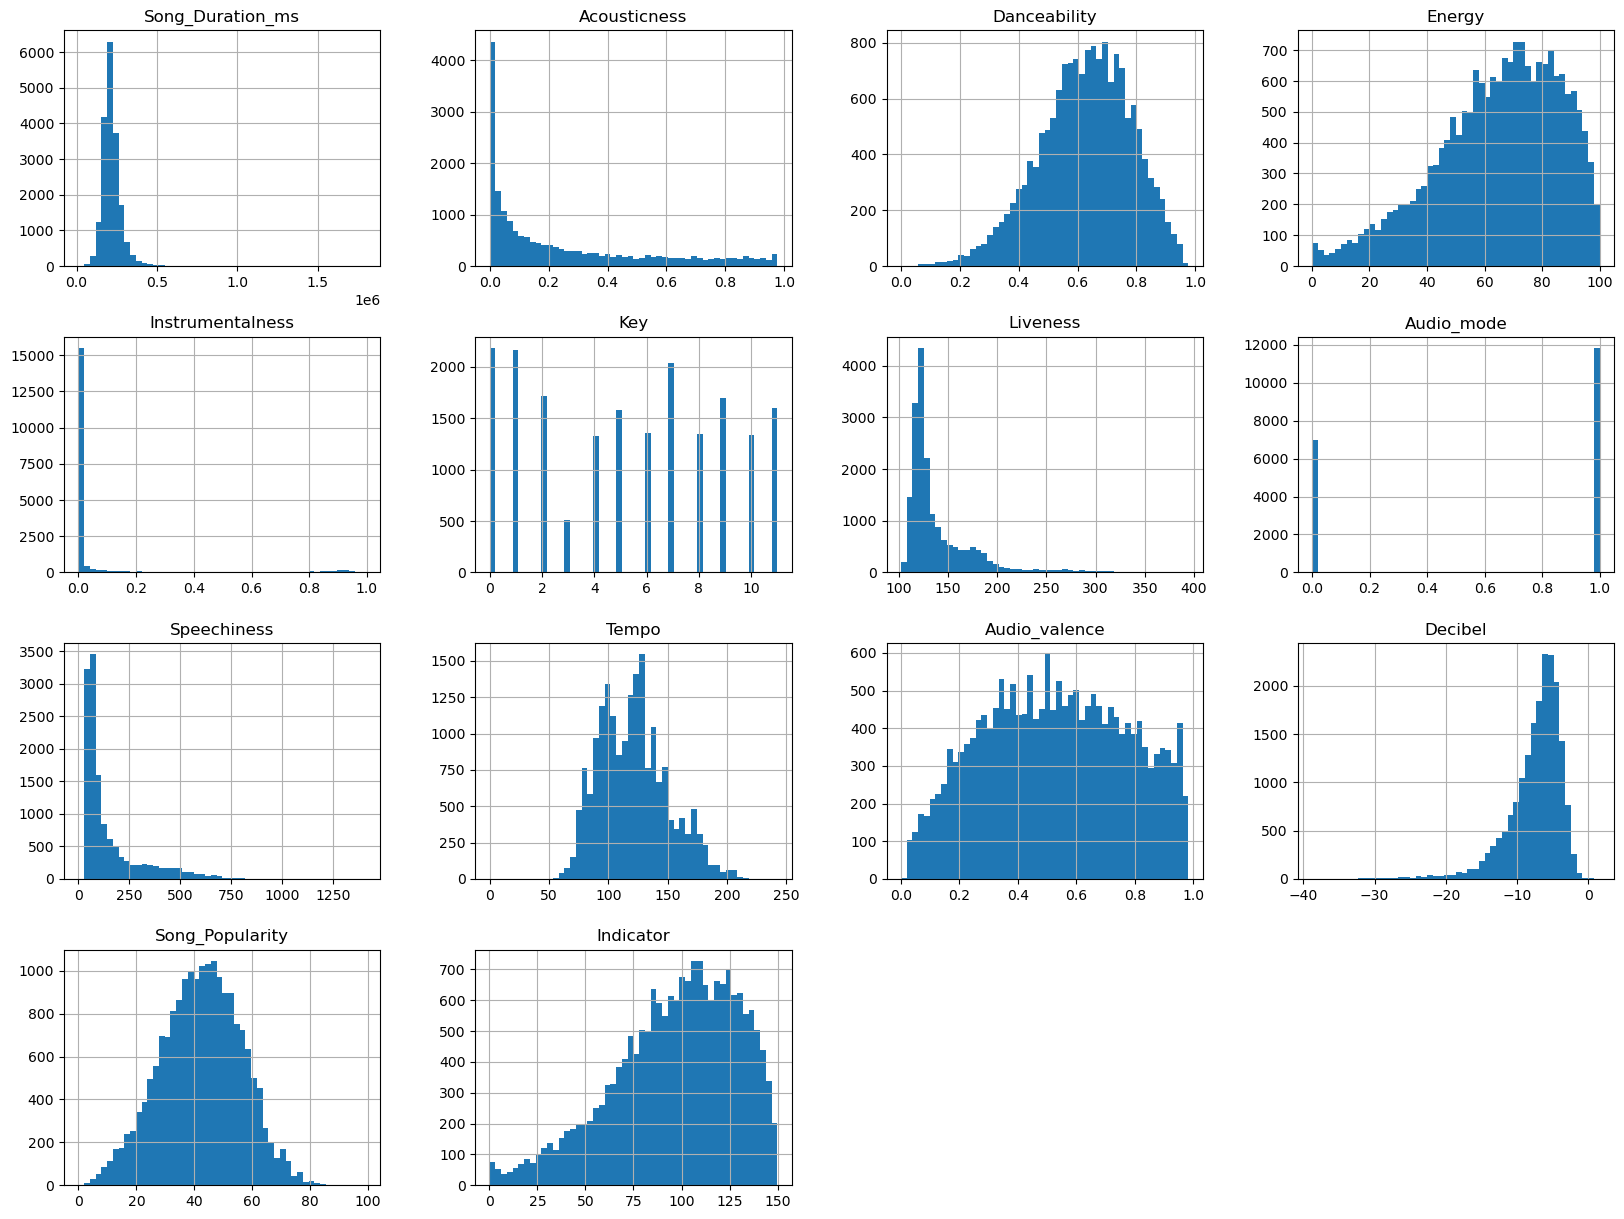

In [37]:
# plot the histogram to the num variables
song_pop_data[num_cols].hist(bins=50, figsize=(20,15))
plt.show()

I'll be transforming Spechiness, Song_Duration_ms, instrument, decibel, song_popularity

### 3.5 Transformation of Variables <a id="3.5"></a>
[Back to Content](#Table-of-Content)

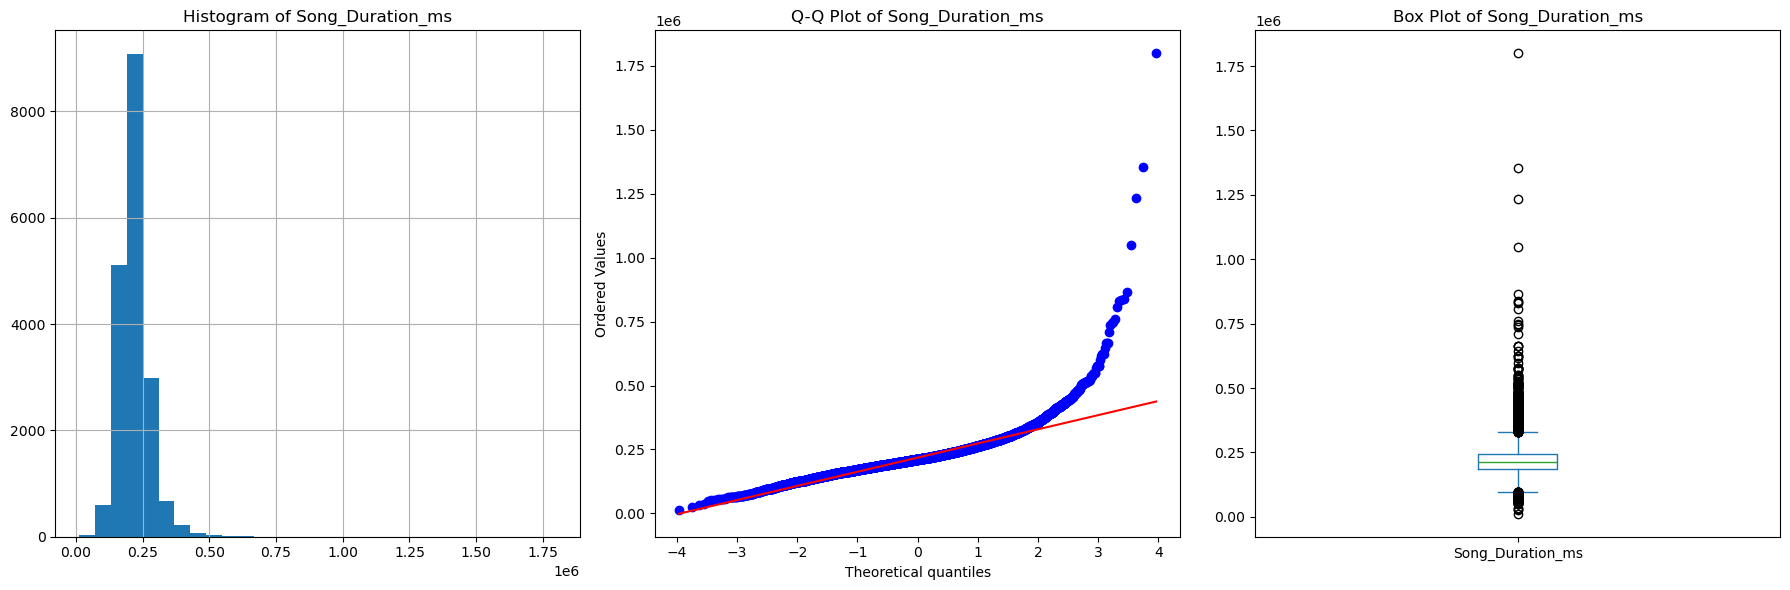

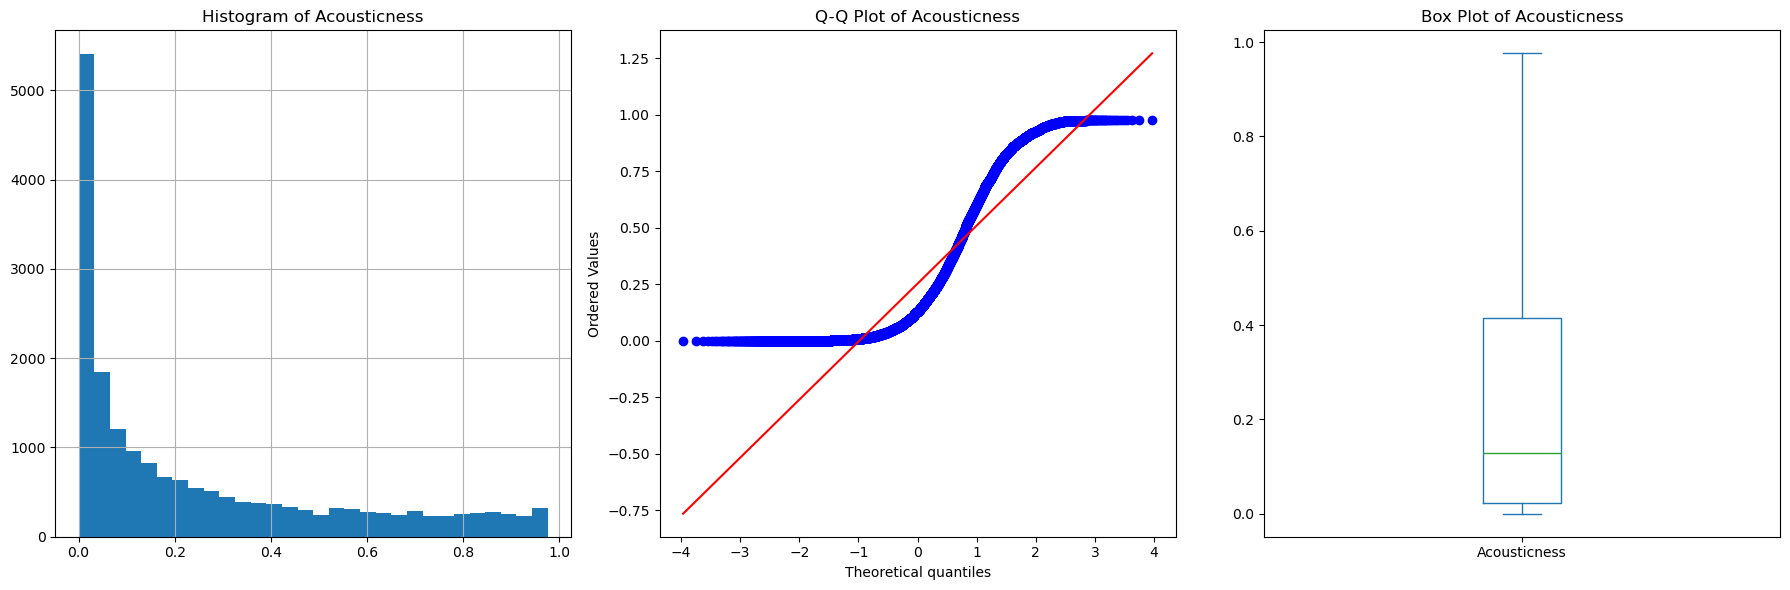

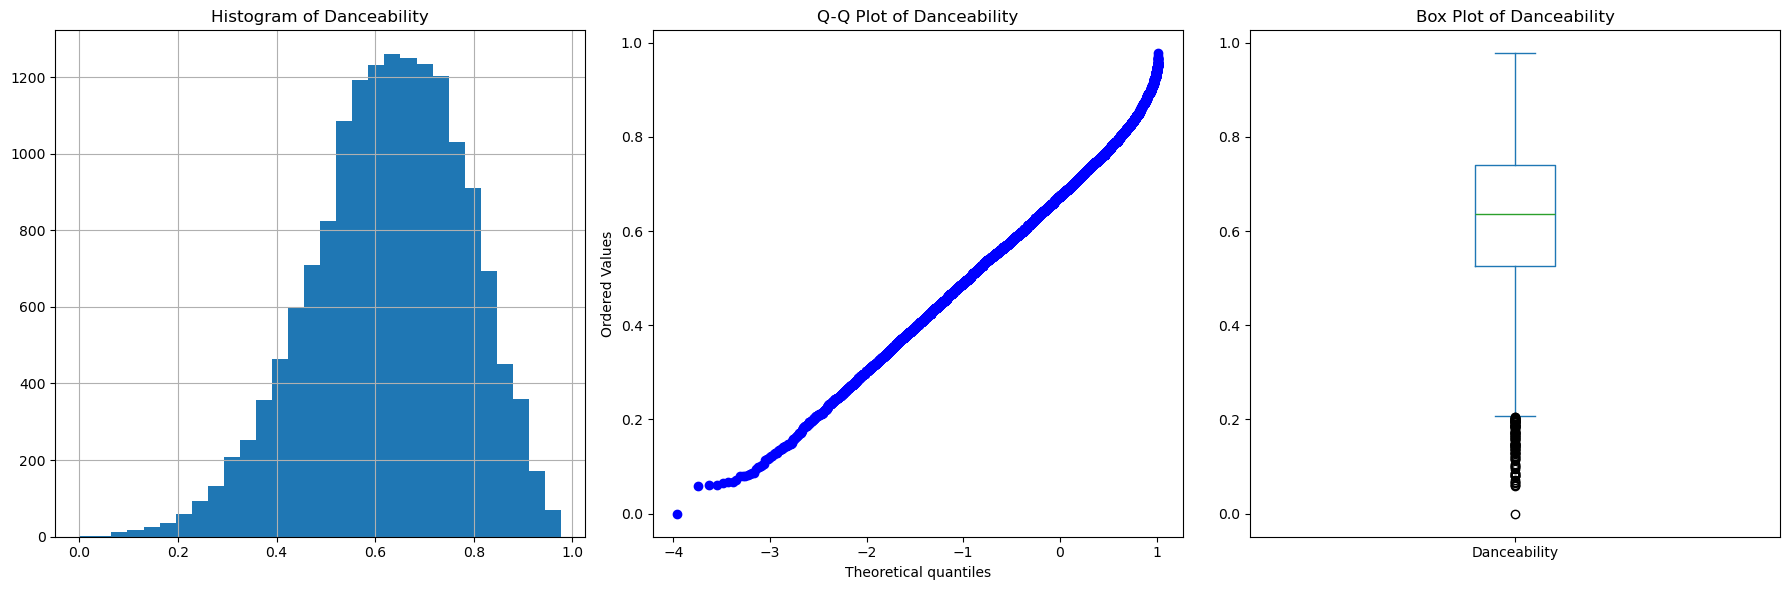

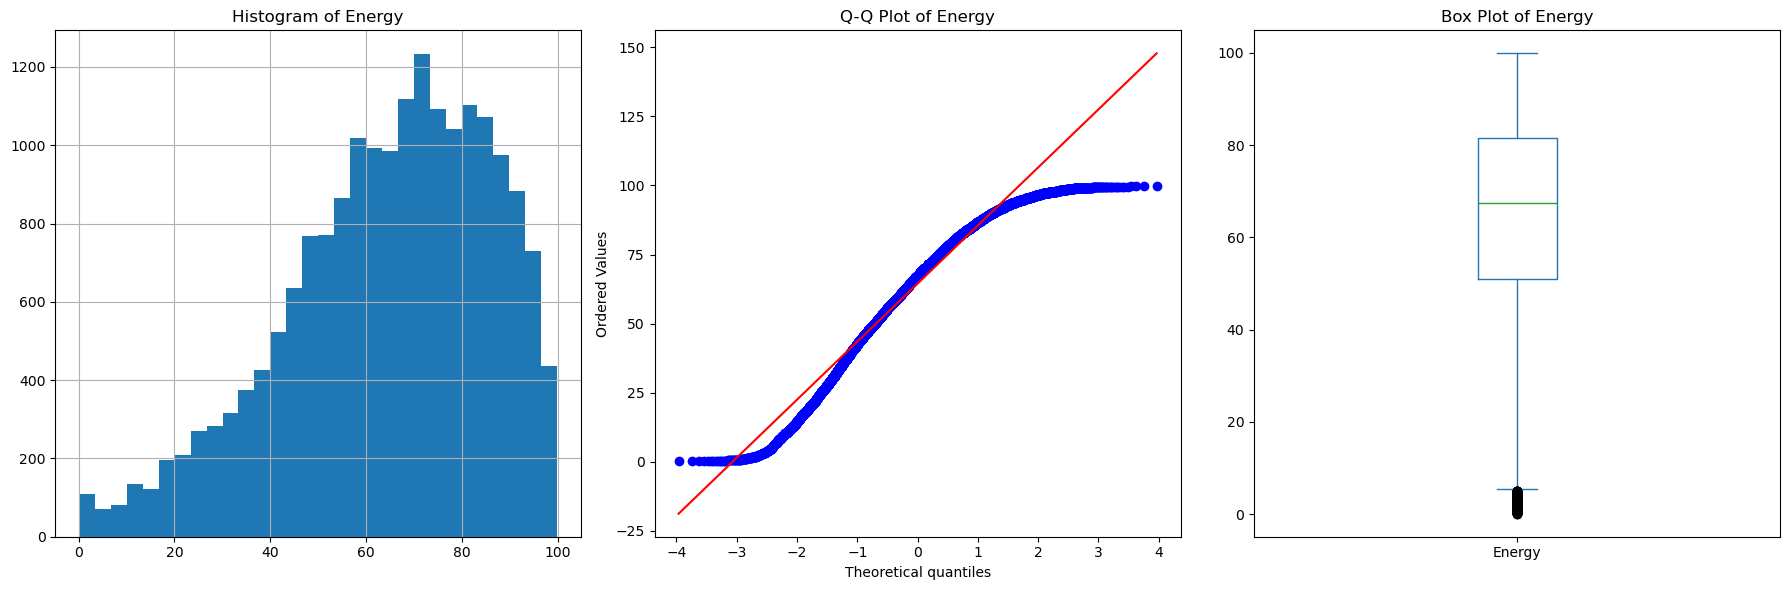

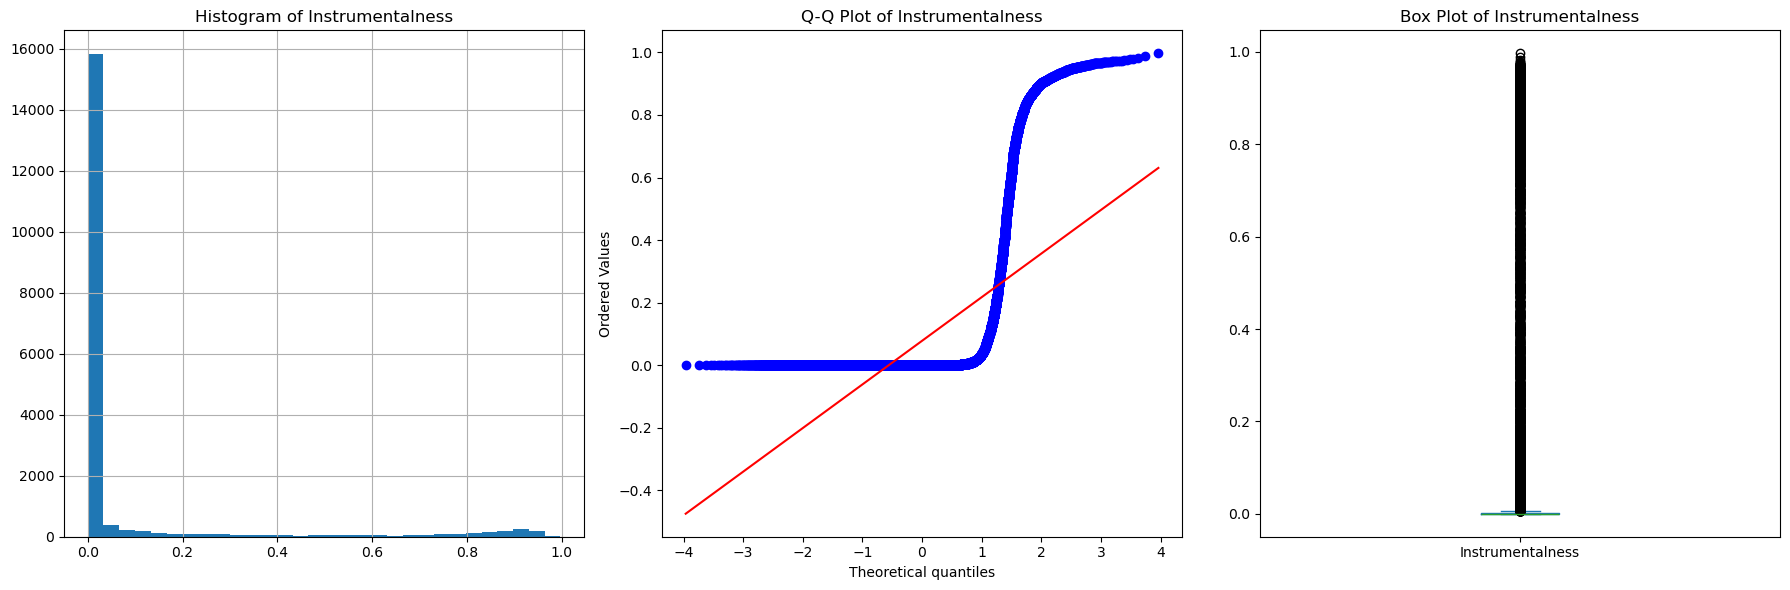

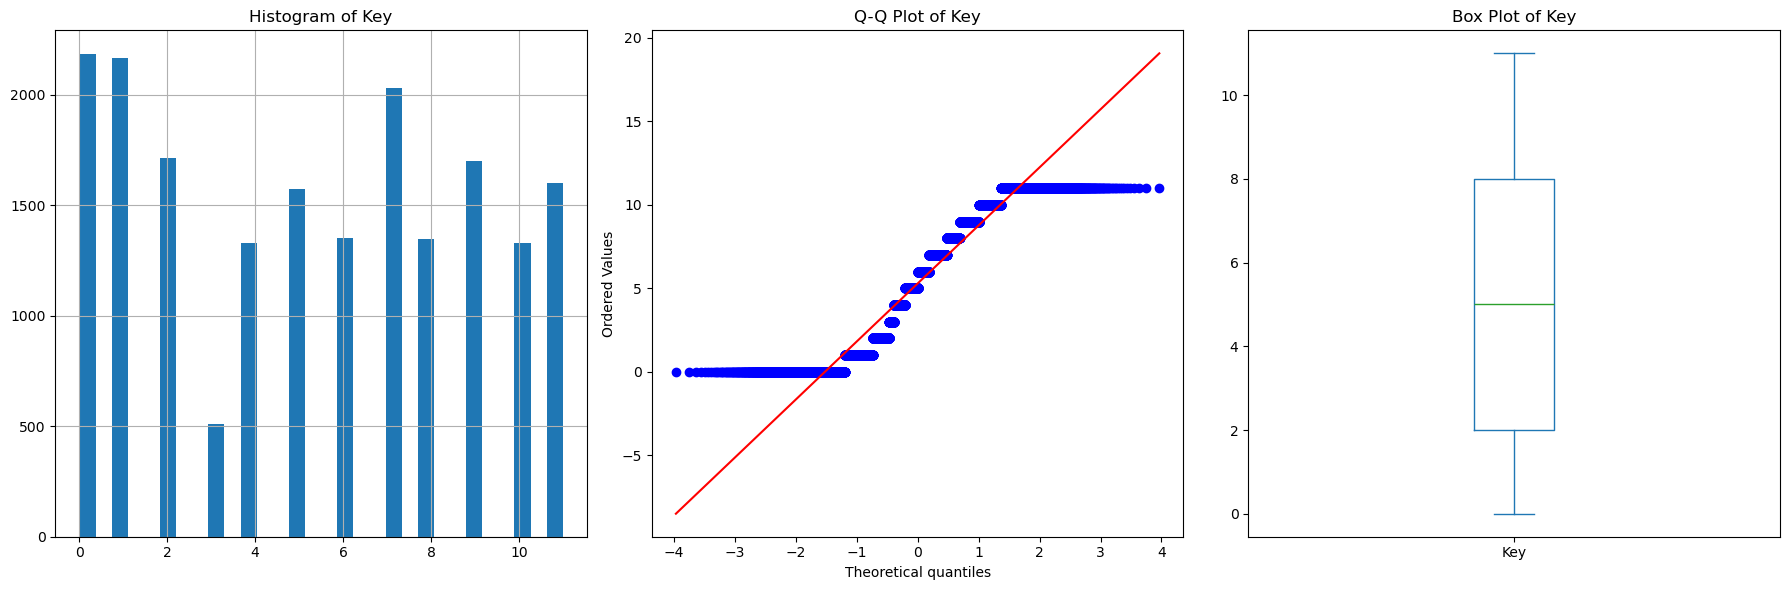

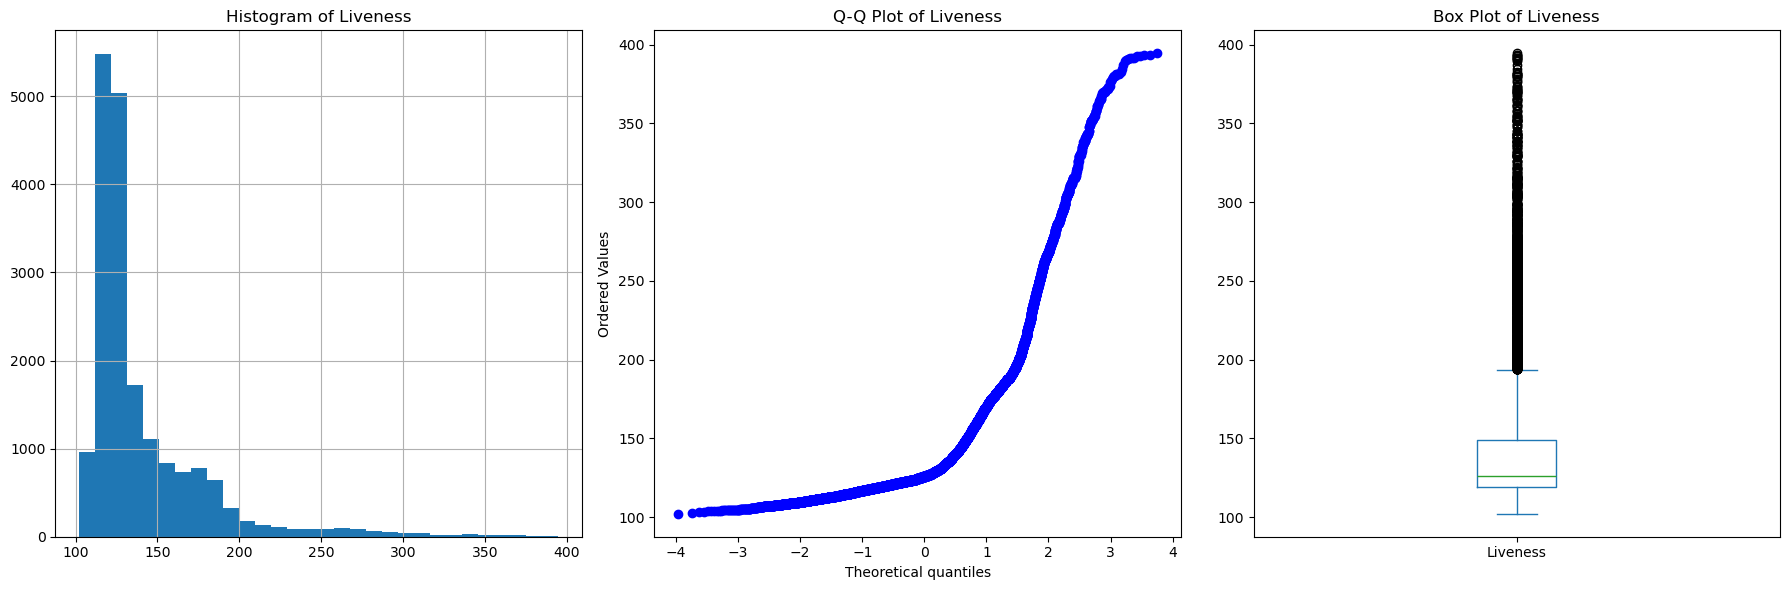

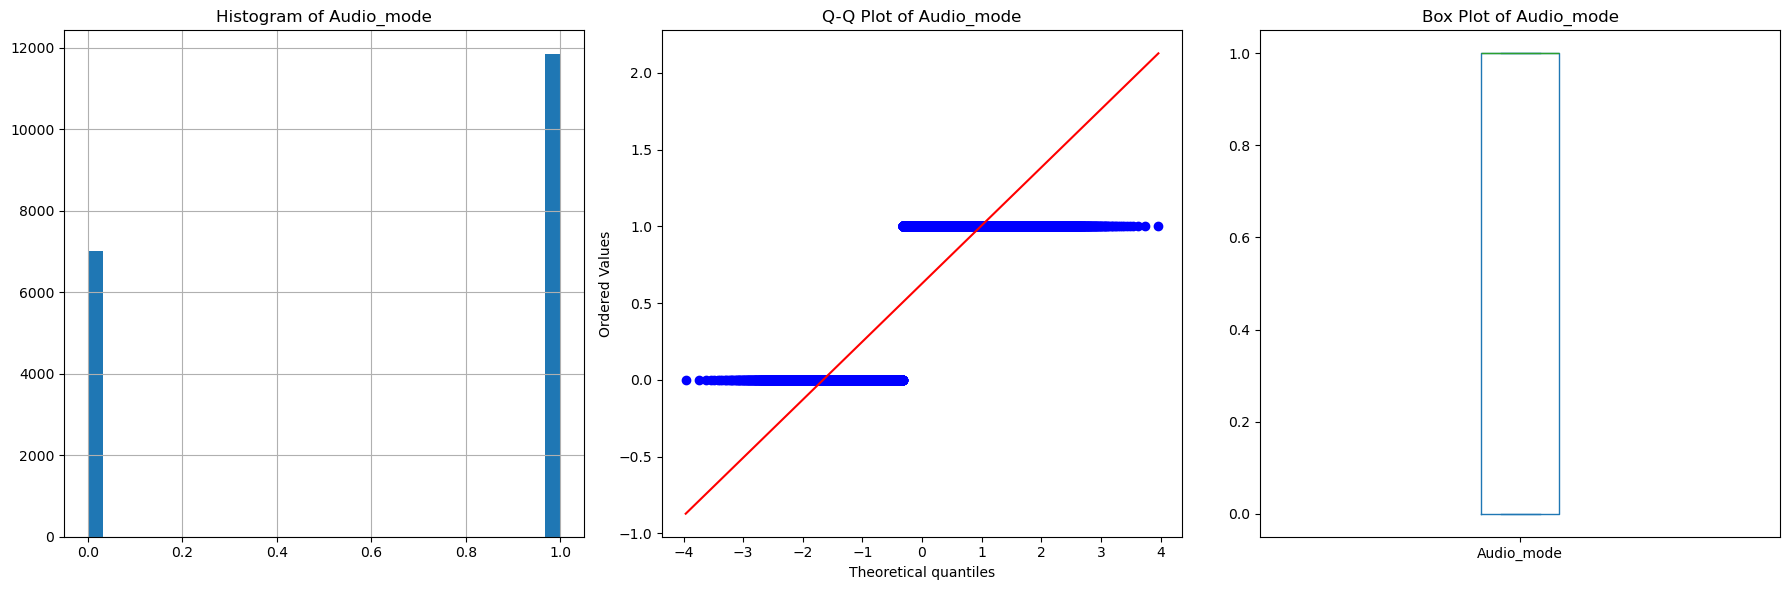

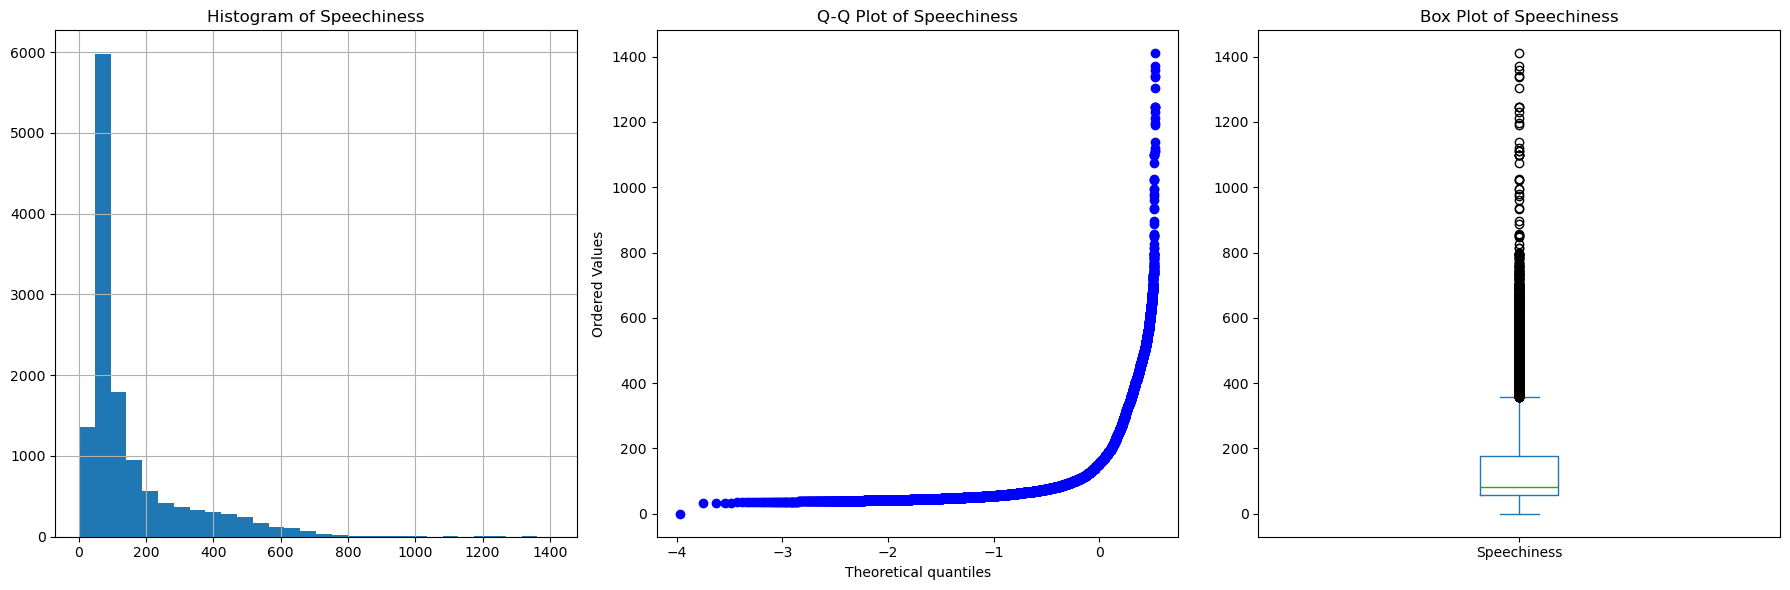

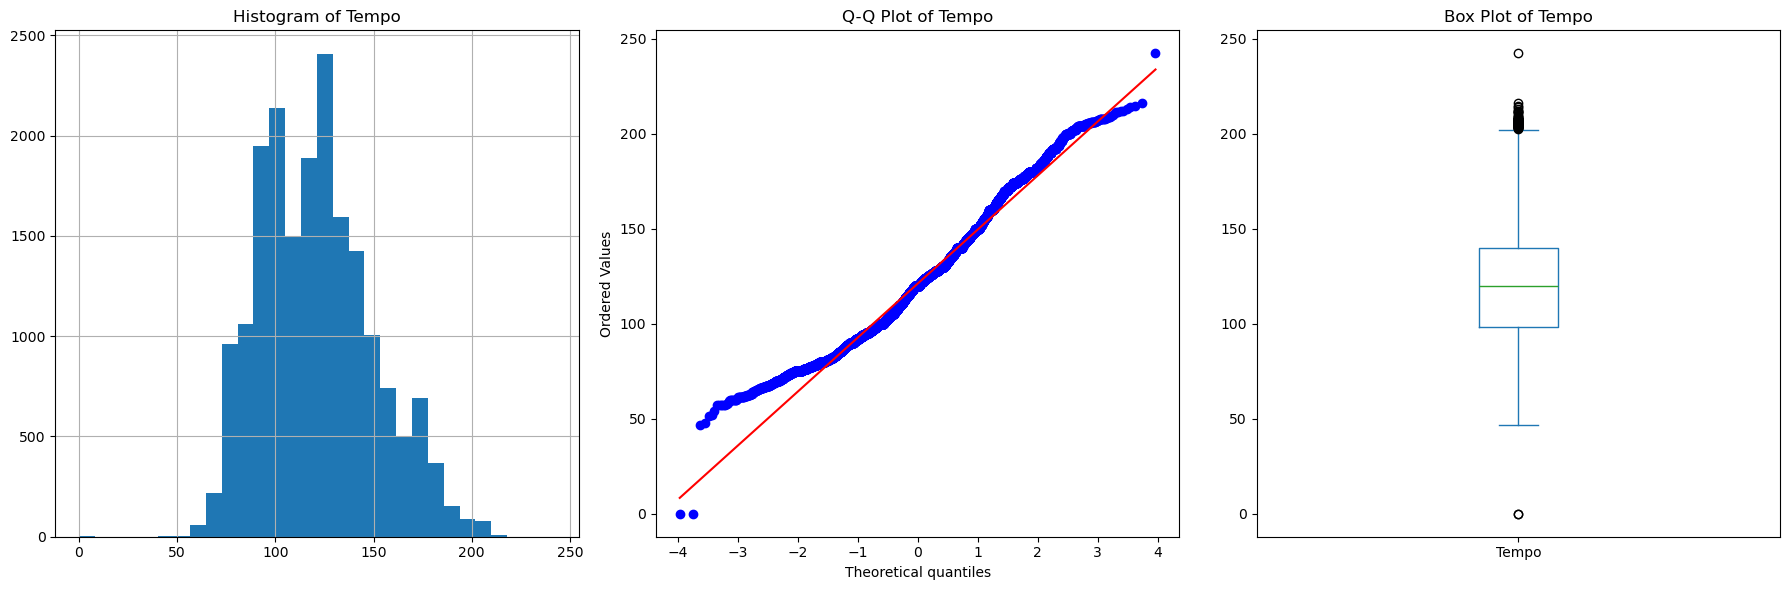

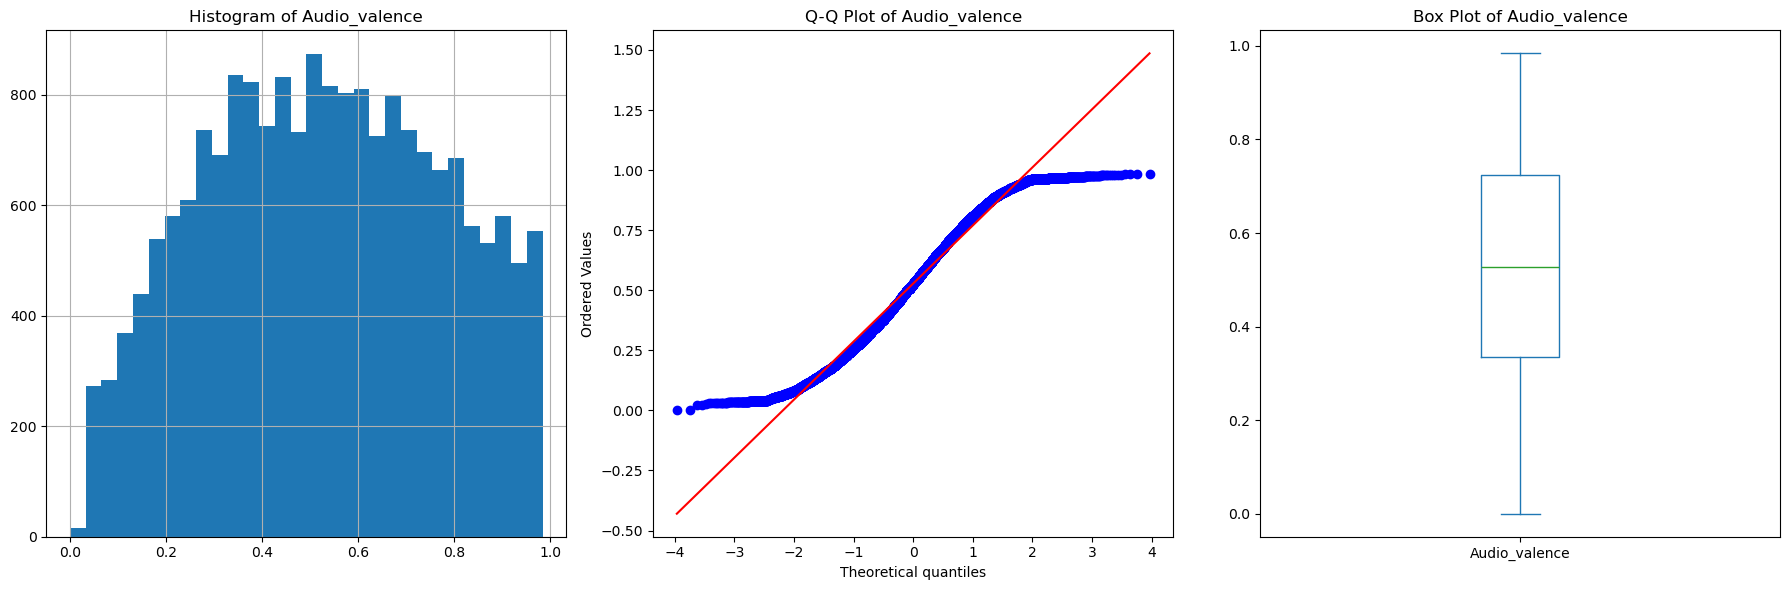

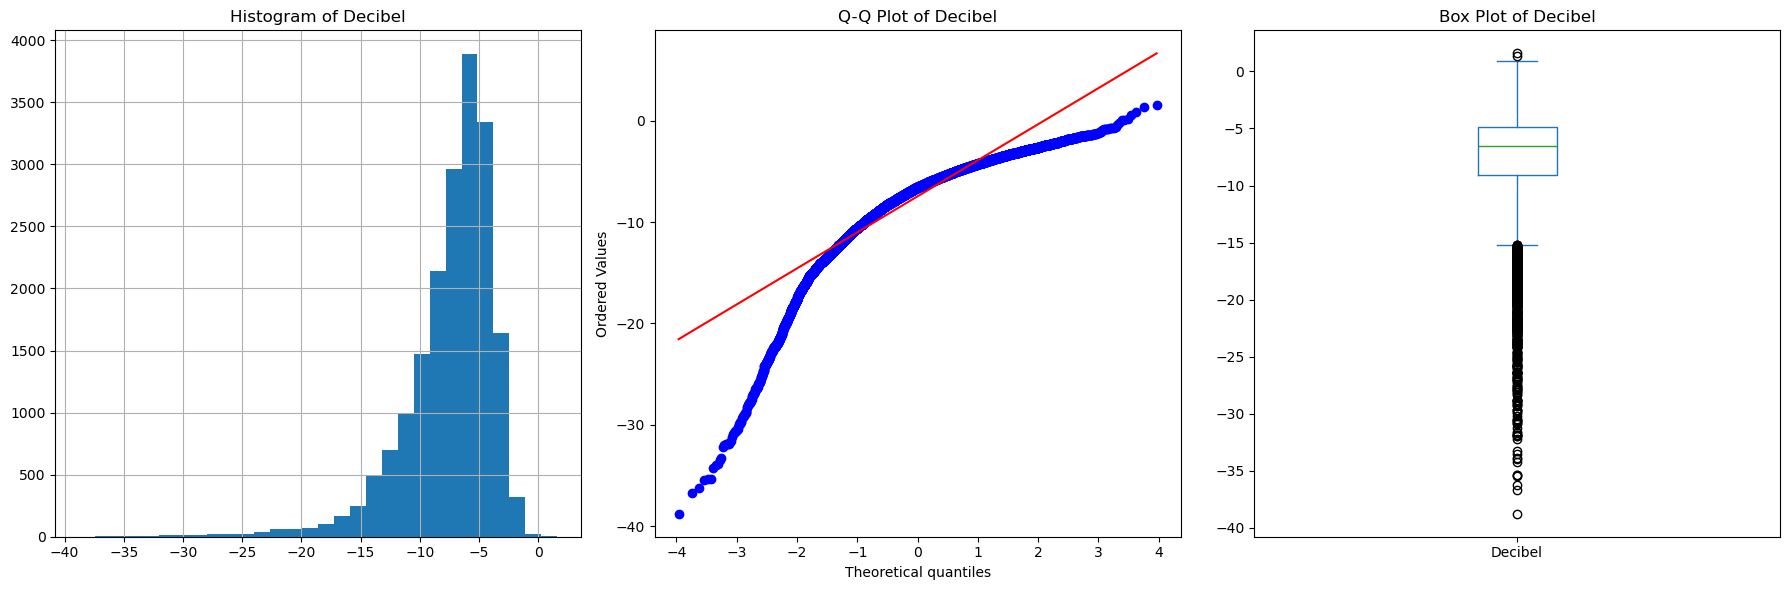

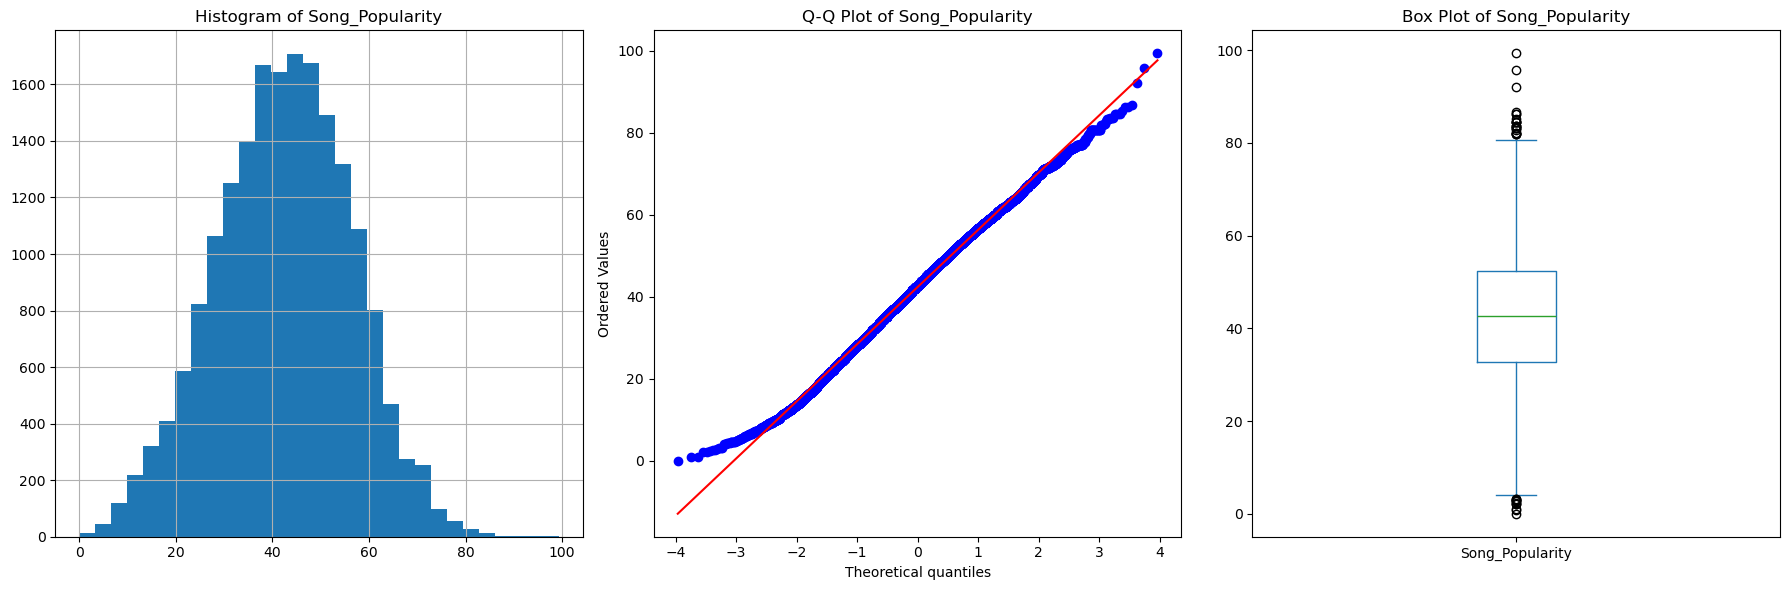

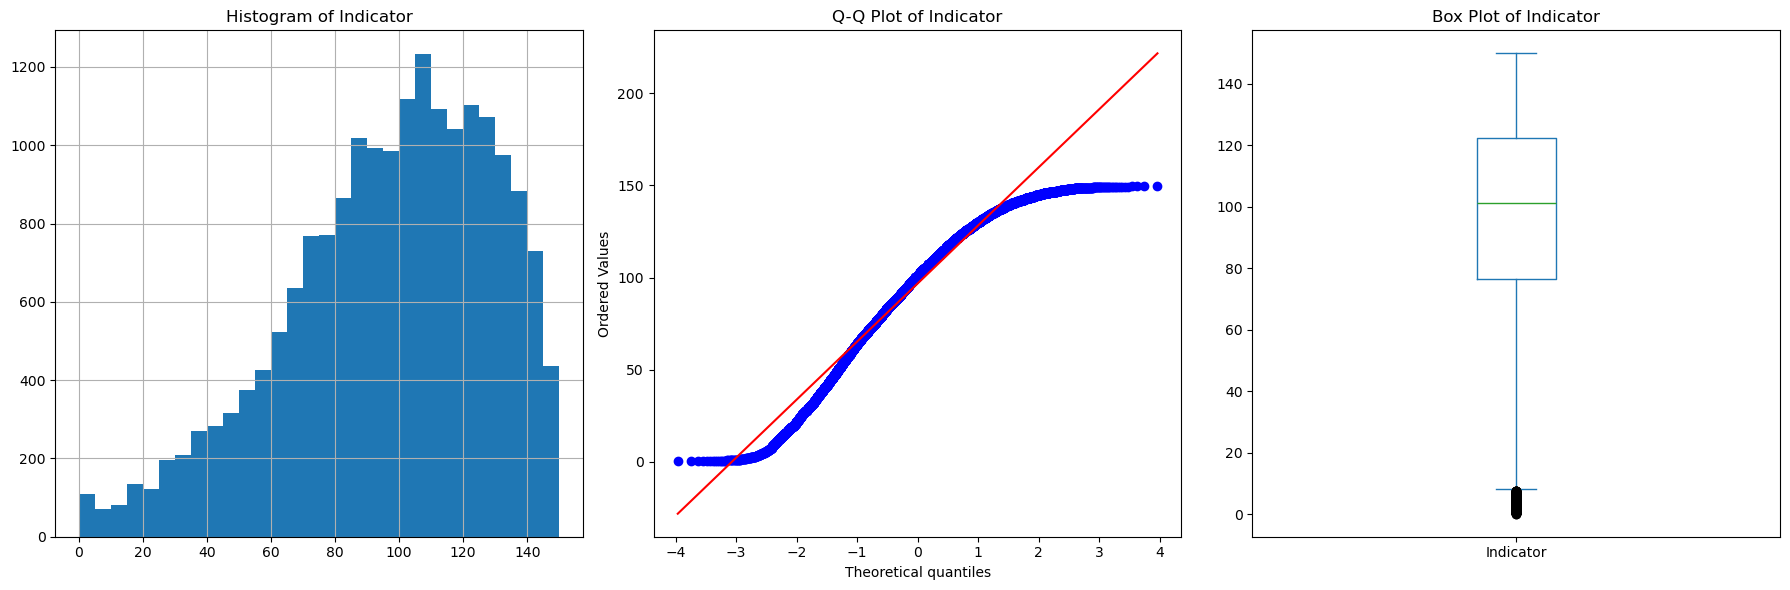

In [38]:
# Plot histogram and Q-Q plots for numerical variables
# to have a look at the variable distribution

# Define the diagnostic plot function
def diagnostic_plots(df, variable):
    plt.figure(figsize=(18, 6))
    
    # Histogram
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30)
    plt.title(f'Histogram of {variable}')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {variable}')

    # Box plot
    plt.subplot(1, 3, 3)
    df[variable].plot.box()
    plt.title(f'Box Plot of {variable}')

    plt.tight_layout()
    plt.show()
    
    
for variable in song_pop_data[num_cols].columns:
    diagnostic_plots(song_pop_data, variable)

#### Song Duration (ms)
- **Histogram**: The distribution of song duration is right-skewed, indicating that most songs are shorter in duration with a few very long songs.
- **Q-Q Plot**: The Q-Q plot shows a significant deviation from the normal distribution, especially in the upper quantiles, confirming the right skewness observed in the histogram.
- **Box Plot**: The box plot reveals a number of outliers on the higher end of the duration spectrum, further supporting the right-skewed distribution and the presence of long-duration songs.

#### Acousticness
- **Histogram**: The distribution of acousticness is heavily right-skewed, with most songs having low acousticness values.
- **Q-Q Plot**: The Q-Q plot indicates a strong deviation from normality, with the data points deviating significantly from the straight line, particularly in the higher quantiles.
- **Box Plot**: The box plot shows a few outliers at higher acousticness values, but the majority of the data is concentrated at the lower end.

#### Danceability
- **Histogram**: The danceability distribution appears to be approximately normally distributed with a slight right skew.
- **Q-Q Plot**: The Q-Q plot shows that the distribution is relatively close to normal, with minor deviations at the tails.
- **Box Plot**: The box plot indicates a few outliers at the lower end, but the interquartile range suggests that most values are evenly spread around the median.

#### Energy
- **Histogram**: The distribution of energy is approximately normally distributed with a slight right skew. Most songs have an energy level between 40 and 80.
- **Q-Q Plot**: The Q-Q plot indicates that the energy variable is fairly close to normal, with minor deviations at the lower and upper quantiles.
- **Box Plot**: The box plot shows a few outliers at the lower end, but the majority of the data falls within a relatively narrow interquartile range, indicating a concentrated distribution of energy values around the median.

#### Instrumentalness
- **Histogram**: The distribution of instrumentalness is heavily right-skewed, with most songs having very low instrumentalness values.
- **Q-Q Plot**: The Q-Q plot shows a significant deviation from normality, particularly at the higher quantiles, indicating that the majority of songs are not instrumental.
- **Box Plot**: The box plot reveals a large number of outliers at the higher end of the instrumentalness scale, confirming the right-skewed distribution observed in the histogram.

#### Key
- **Histogram**: The distribution of key values appears to be relatively uniform, with no single key dominating the dataset.
- **Q-Q Plot**: The Q-Q plot for the key variable shows a step-like pattern, indicating that the key values are discrete and not normally distributed.
- **Box Plot**: The box plot shows a balanced distribution of key values with no significant outliers, reflecting the uniformity observed in the histogram.

#### Liveness
- **Histogram**: The distribution of liveness is heavily right-skewed, indicating that most songs have low liveness values.
- **Q-Q Plot**: The Q-Q plot shows a significant deviation from normality, particularly at the higher quantiles, confirming the right skewness observed in the histogram.
- **Box Plot**: The box plot reveals a large number of outliers at the higher end, supporting the heavily right-skewed distribution.

#### Audio Mode
- **Histogram**: The distribution of audio mode is binary, with values concentrated at 0 and 1, indicating two distinct modes.
- **Q-Q Plot**: The Q-Q plot shows two distinct clusters, corresponding to the binary nature of the audio mode.
- **Box Plot**: The box plot reflects the binary distribution, with no interquartile range and values strictly at 0 or 1.

#### Speechiness
- **Histogram**: The distribution of speechiness is right-skewed, with most songs having low speechiness values.
- **Q-Q Plot**: The Q-Q plot shows a significant deviation from normality, particularly at the higher quantiles, confirming the right skewness observed in the histogram.
- **Box Plot**: The box plot reveals a large number of outliers at the higher end, supporting the heavily right-skewed distribution.

#### Tempo
- **Histogram**: The distribution of tempo is approximately normal with a slight right skew. Most songs have a tempo between 80 and 160 BPM.
- **Q-Q Plot**: The Q-Q plot indicates that the tempo variable is fairly close to normal, with minor deviations at the tails.
- **Box Plot**: The box plot shows a few outliers at the lower and upper ends, but the majority of the data falls within a relatively narrow interquartile range.

#### Audio Valence
- **Histogram**: The distribution of audio valence appears to be approximately normal with a slight right skew.
- **Q-Q Plot**: The Q-Q plot shows that the distribution is relatively close to normal, with minor deviations at the tails.
- **Box Plot**: The box plot indicates a balanced distribution of audio valence values around the median.

#### Decibel
- **Histogram**: The distribution of decibel values is right-skewed, indicating that most songs have lower decibel values.
- **Q-Q Plot**: The Q-Q plot shows a significant deviation from normality, particularly at the higher quantiles, confirming the right skewness observed in the histogram.
- **Box Plot**: The box plot reveals a large number of outliers at the higher end, supporting the heavily right-skewed distribution.

#### Song Popularity
- **Histogram**: The distribution of song popularity appears to be approximately normal, with most songs having popularity scores between 20 and 80.
- **Q-Q Plot**: The Q-Q plot shows that the distribution is relatively close to normal, with minor deviations at the tails.
- **Box Plot**: The box plot indicates a few outliers at the lower and upper ends, but the majority of the data falls within a relatively narrow interquartile range.

#### Indicator
- **Histogram**: The distribution of the indicator variable appears to be right-skewed, with most values concentrated between 60 and 140.
- **Q-Q Plot**: The Q-Q plot shows a significant deviation from normality, particularly at the lower and higher quantiles.
- **Box Plot**: The box plot reveals a number of outliers at both ends, indicating a wider spread of values and confirming the right-skewed distribution observed in the histogram.

Now I will be doing trimming to remove the outliers. Based on the observations seen from the boxplot, the variables that I will be trimming are "Speechiness", "Song_Duration_ms", "Decibel", "Song_Popularity", "Energy".

### 3.6 Remove Outliers for Multiple Variables <a id="3.6"></a>
[Back to Content](#Table-of-Content)

#### Handling Null Values in Trimming and Winsorization

When dealing with outliers in a dataset using **trimming** and **Winsorization**, these are some of the things I need to consider.

##### Trimming and Null Values
- **Trimming** removes a specific percentage of the highest and lowest values from your data.
- Null values are typically ignored during the trimming process, which means only non-null numeric values are considered.
- This allows trimming to be applied directly to datasets containing null values without requiring any special handling of these missing entries.

##### Winsorization and Null Values
- **Winsorization** modifies extreme values by capping them at certain percentiles (e.g., the 5th and 95th).
- Calculating these percentiles requires non-null numeric values because percentile calculations depend on having actual numbers.
- If null values are present, they must be handled (filled in or removed) before applying Winsorization, as they can interfere with the accurate determination of percentile cutoffs.

So I will check for these 5 variables, which one has null values and which one does not.

In [39]:
song_pop_data['Speechiness'].isnull().sum()

5651

In [40]:
song_pop_data['Song_Duration_ms'].isnull().sum()

0

In [41]:
song_pop_data['Decibel'].isnull().sum()

0

In [42]:
song_pop_data['Song_Popularity'].isnull().sum()

0

In [43]:
song_pop_data['Energy'].isnull().sum()

0

As observed on top, only 'Speechiness' has null values while the other 4 does not. Hence I will be trimming Speechiness and winsorising the other 4 variables.

### 3.7 Trimming Method <a id="3.7"></a>
[Back to Content](#Table-of-Content)

<Axes: ylabel='Speechiness'>

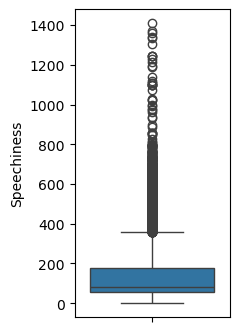

In [44]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=song_pop_data['Speechiness'])

In [45]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [46]:
# find limits for RM

Speechiness_upper_limit, Speechiness_lower_limit = find_boundaries(song_pop_data, 'Speechiness', 1.5)
Speechiness_upper_limit, Speechiness_lower_limit

(357.45, -123.74999999999999)

In [47]:
# let's flag the outliers in the data set

outliers_Speechiness = np.where(song_pop_data['Speechiness'] > Speechiness_upper_limit, True,
                       np.where(song_pop_data['Speechiness'] < Speechiness_lower_limit, True, False))

In [48]:
# let's trim the dataset by removing only RM outliers

song_pop_data_trimmed = song_pop_data.loc[~outliers_Speechiness]

song_pop_data.shape, song_pop_data_trimmed.shape

((18835, 18), (17301, 18))

<Axes: ylabel='Speechiness'>

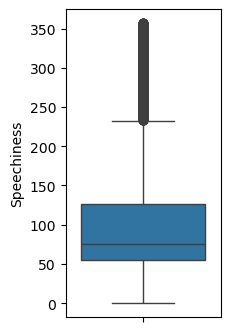

In [49]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=song_pop_data_trimmed['Speechiness'])

After using the trimming method, the outliers for each variable has reduced. However, there are still outliers present. So I will be using winsorization method to transfrom and remove outliers. 

### 3.8 Winsorization Method <a id="3.8"></a>
[Back to Content](#Table-of-Content)

In [50]:
# Drop rows with missing values for values that is being trimmed.

# Define the variables to be trimmed
variables_to_trim_noNull = ['Song_Duration_ms', 'Decibel', 'Song_Popularity', 'Energy']

# Apply Winsorization
winsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold =0.05,
                        variables=['Song_Duration_ms', 'Decibel', 'Song_Popularity', 'Energy'])

winsorizer.fit(song_pop_data_trimmed)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['Song_Duration_ms', 'Decibel', 'Song_Popularity',
                      'Energy'])

In [51]:
song_pop_data_trimmed = winsorizer.transform(song_pop_data_trimmed)

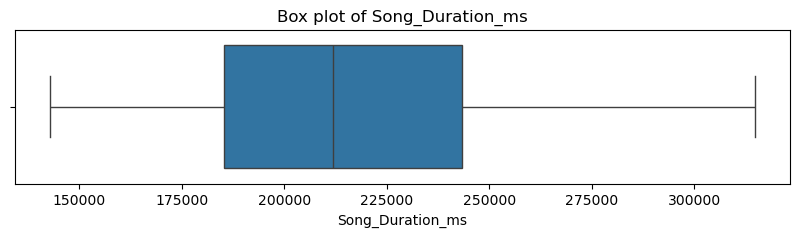

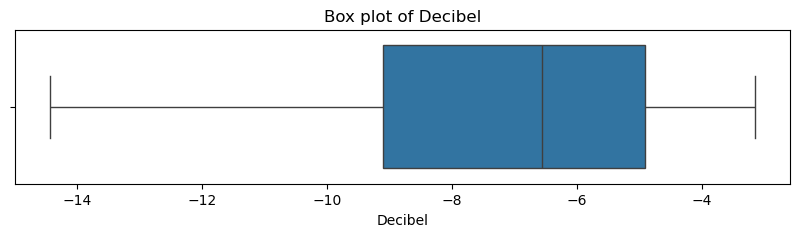

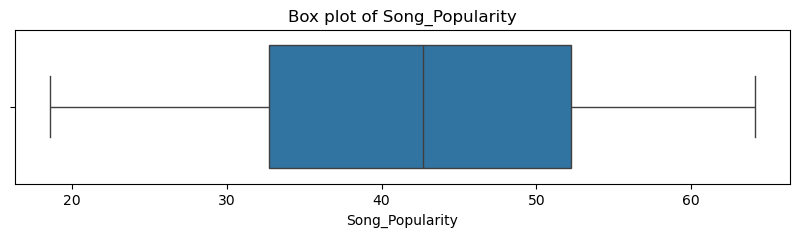

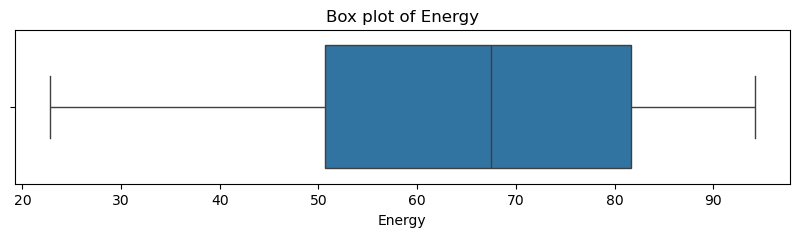

In [52]:
# Plot again to see if it is better after capping
for variable in variables_to_trim_noNull:
    plt.figure(figsize=(10, 2))  # Adjusted figure size for horizontal plot
    sns.boxplot(x=song_pop_data_trimmed[variable])
    plt.title(f'Box plot of {variable}')
    plt.show()

In [53]:
# Apply Transformations (Does not work)
# Define the PowerTransformer for the selected variables
#transformer = PowerTransformer(variables=variables_to_trim, exp=0.5)

# Fit transformer to data
#transformer.fit(song_pop_data_trimmed)

In [54]:
# Transform the indicated variables in the dataset
#song_pop_data_transformed = transformer.transform(song_pop_data_trimmed)

In [55]:
# Plot again to see if it is better after transformation
#for variable in variables_to_trim:
#    plt.figure(figsize=(10, 2))  # Adjusted figure size for horizontal plot
#    sns.boxplot(x=song_pop_data_transformed[variable])
#    plt.title(f'Box plot of {variable}')
#    plt.show()

In [56]:
# Define the diagnostic plot function
def diagnostic_plots(df, variable):
    plt.figure(figsize=(18, 6))
    
    # Histogram
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30)
    plt.title(f'Histogram of {variable}')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {variable}')

    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[variable])
    plt.title(f'Box Plot of {variable}')

    plt.tight_layout()
    plt.show()

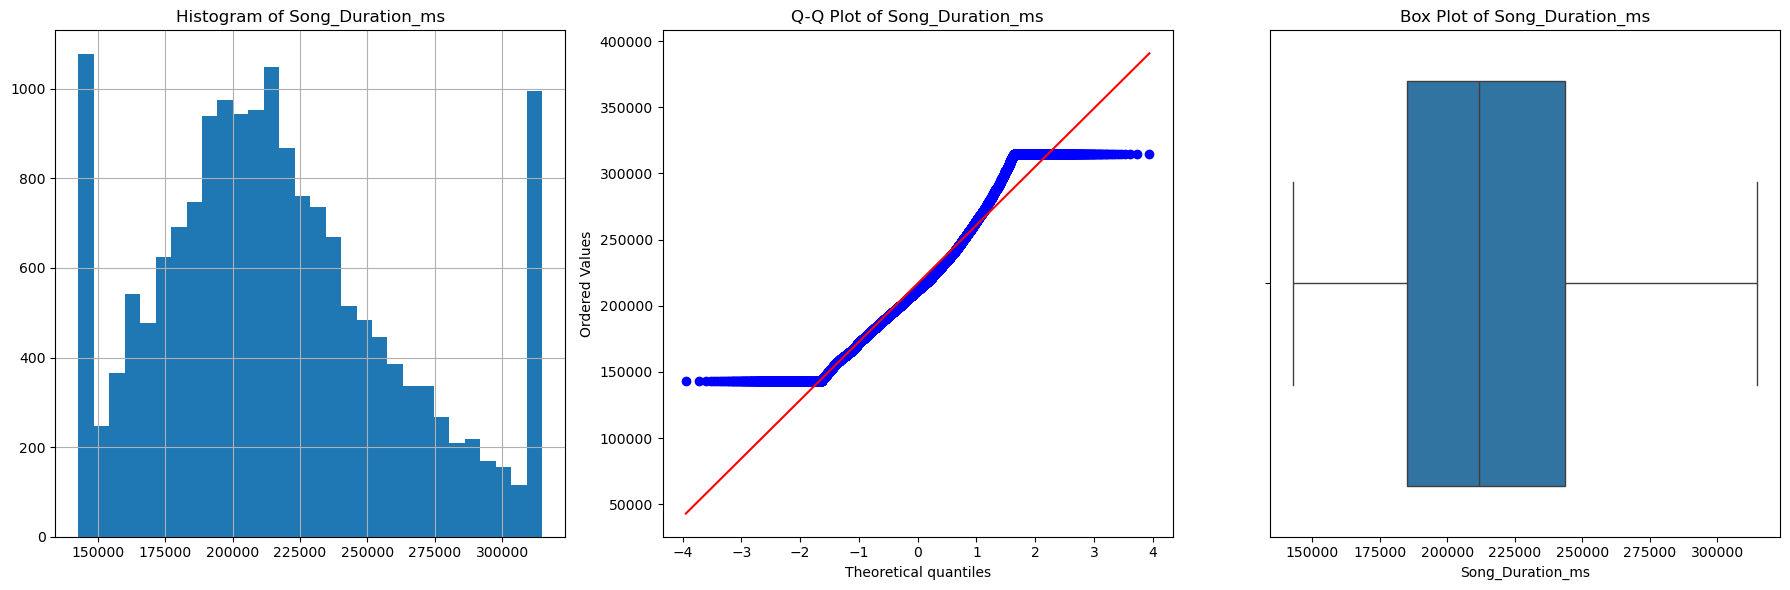

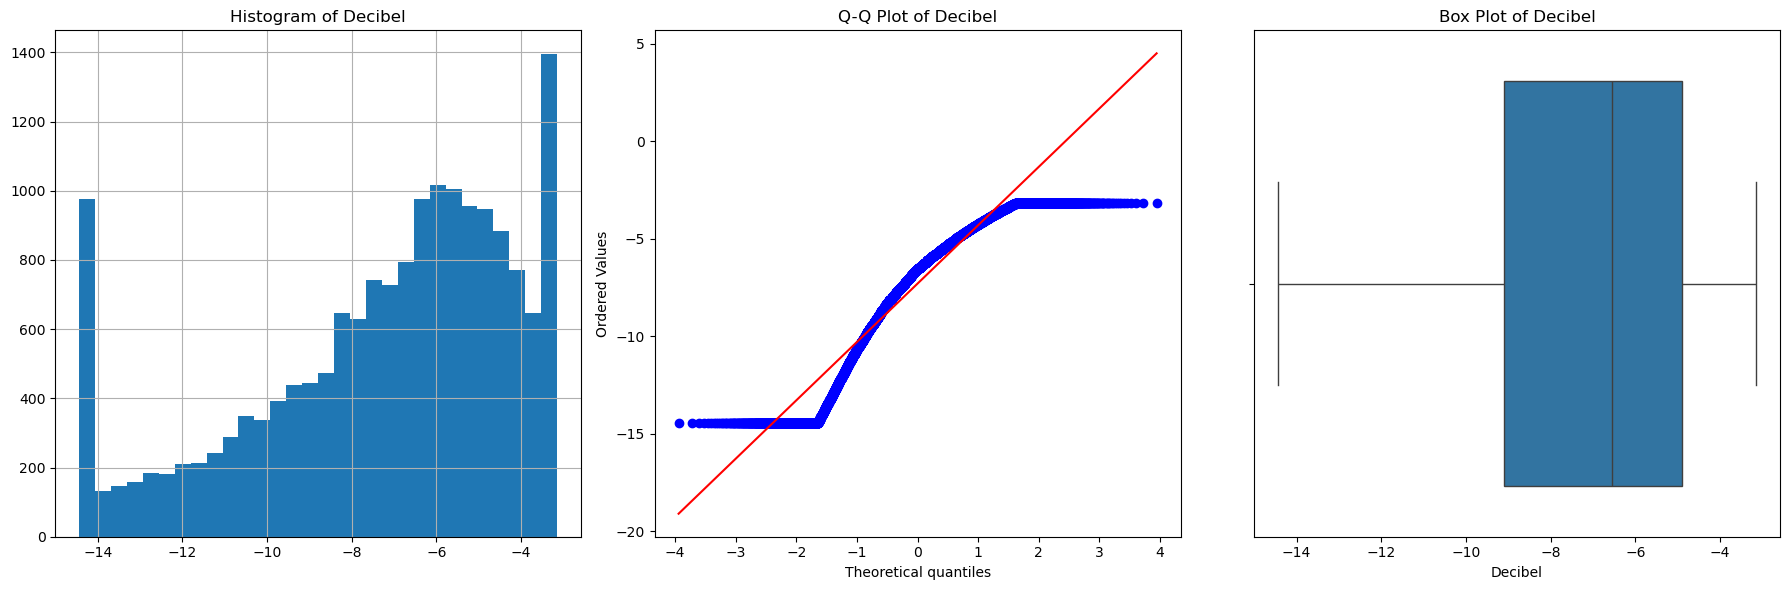

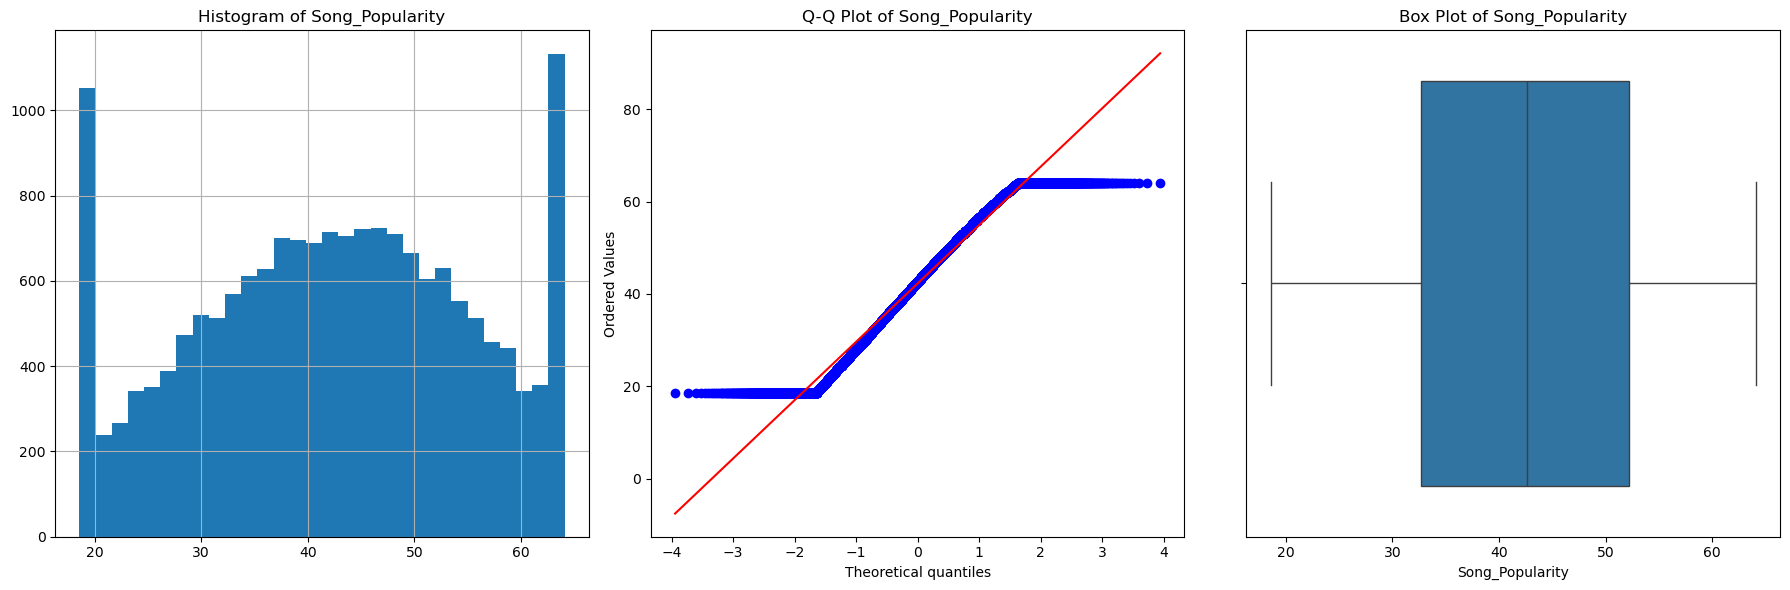

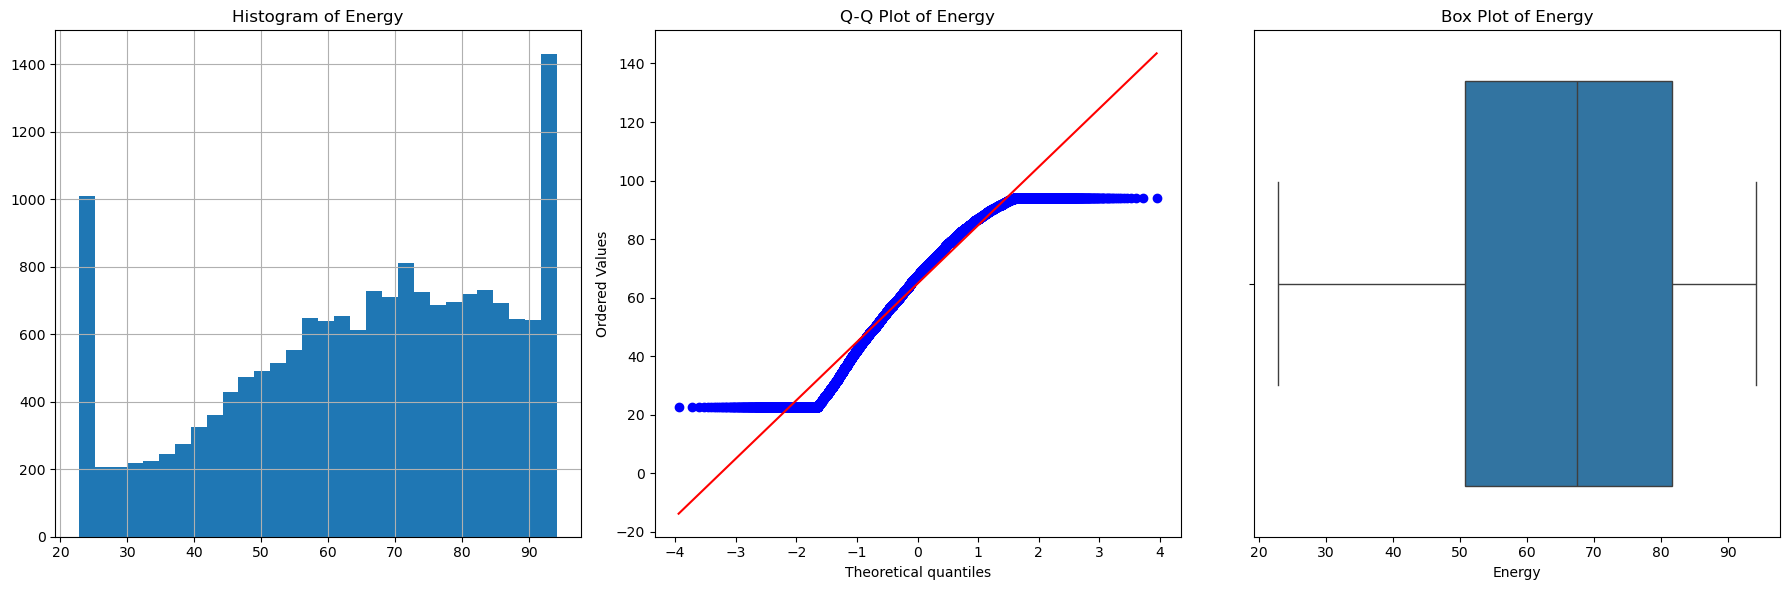

In [57]:
# Plot again to see if it is better after transformation
for variable in variables_to_trim_noNull:
    diagnostic_plots(song_pop_data_trimmed, variable)

### 3.9 Drop Null Values in Liveness Column <a id="3.9"></a>
[Back to Content](#Table-of-Content)

In [58]:
# Quantify the total number of missing values
missing_data = song_pop_data_trimmed.isnull().sum()

# Quantify the mean of missing values
missing_data_mean = song_pop_data_trimmed.isnull().mean()
missing_data_mean_percent = missing_data_mean * 100

# Now I will combine them side by side for easy viewing.
missing_data_summary = pd.DataFrame({'Missing Values': missing_data,'Mean Percentage': missing_data_mean_percent})

# To sort by 'Missing Values' in ascending order (default):
missing_data_summary = missing_data_summary.sort_values(by='Missing Values')

print(missing_data_summary)

                  Missing Values  Mean Percentage
Code                           0         0.000000
Decibel                        0         0.000000
Audio_valence                  0         0.000000
Tempo                          0         0.000000
Audio_mode                     0         0.000000
Song_Popularity                0         0.000000
Key                            0         0.000000
Indicator                      0         0.000000
Energy                         0         0.000000
Acousticness                   0         0.000000
Song_Duration_ms               0         0.000000
Song_Name                      0         0.000000
Instrumentalness               0         0.000000
Liveness                       1         0.005780
Loudness                    1748        10.103462
Danceability                2672        15.444194
Dynamism                    3389        19.588463
Speechiness                 5651        32.662852


In [59]:
# Drop Null for Liveness
song_pop_data_trimmed=song_pop_data_trimmed.dropna()

In [60]:
# Check if dropping is successful.
print("\nNumber of NaNs in 'Liveness' column after conversion:")
print(song_pop_data_trimmed['Liveness'].isnull().sum())


Number of NaNs in 'Liveness' column after conversion:
0


## Step 4: Train and Test Split <a id="4.0"></a>
[Back to Content](#Table-of-Content)

In [61]:
# Separate the data into training (70%) and testing sets (30%)
# Target Variable is "Song_Popularity"
X_train, X_test, y_train, y_test = train_test_split(
    song_pop_data_trimmed.drop('Song_Popularity', axis=1), song_pop_data_trimmed['Song_Popularity'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((4987, 17), (2138, 17))

In [62]:
y_train.shape, y_test.shape

((4987,), (2138,))

## Step 5: Missing Value Imputation <a id="5.0"></a>
[Back to Content](#Table-of-Content)

In [63]:
# Find categorical variables 
train_cat_cols = [c for c in X_train.columns if song_pop_data[c].dtypes=='O']
X_train[train_cat_cols].isnull().mean().sort_values()

Code         0.0
Song_Name    0.0
Dynamism     0.0
Loudness     0.0
dtype: float64

In [64]:
# find numerical variables
train_num_cols = [c for c in X_train.columns if song_pop_data[c].dtypes!='object']
X_train[train_num_cols].isnull().mean().sort_values()

Song_Duration_ms    0.0
Acousticness        0.0
Danceability        0.0
Energy              0.0
Instrumentalness    0.0
Key                 0.0
Liveness            0.0
Audio_mode          0.0
Speechiness         0.0
Tempo               0.0
Audio_valence       0.0
Decibel             0.0
Indicator           0.0
dtype: float64

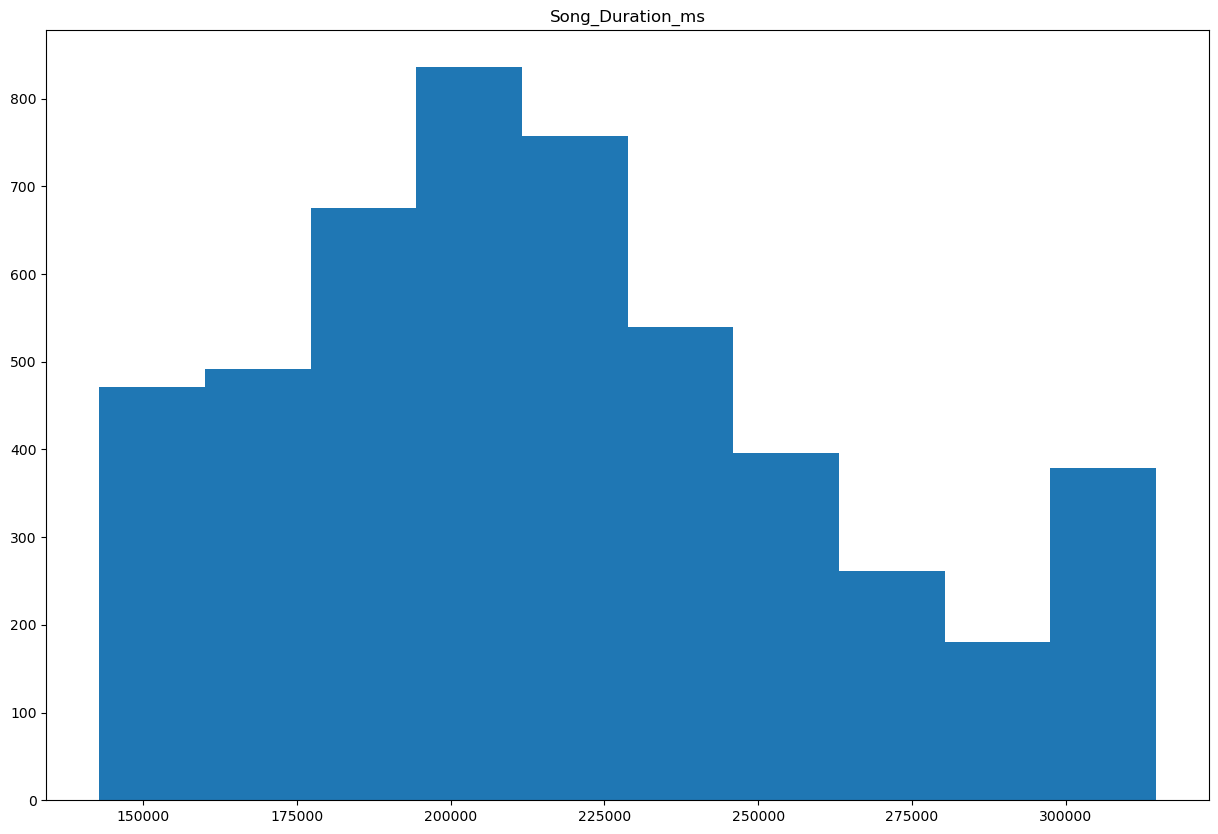

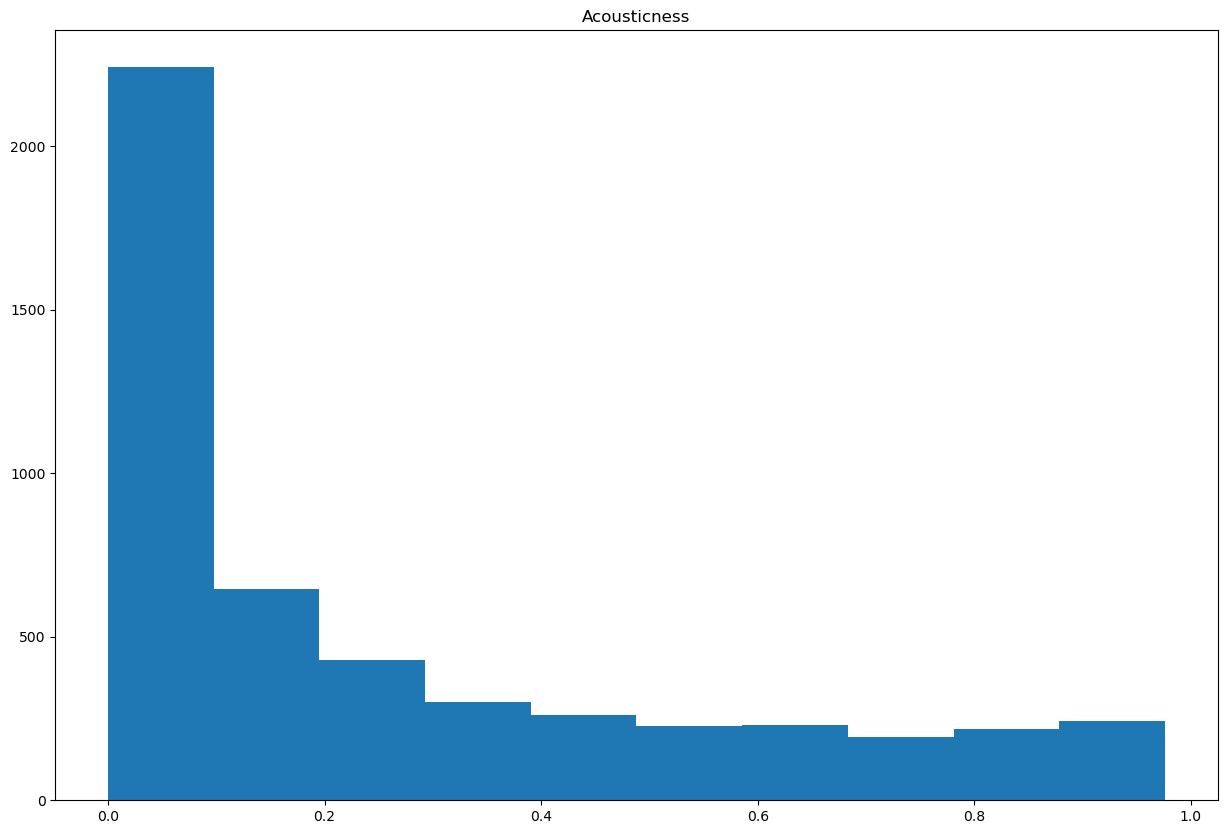

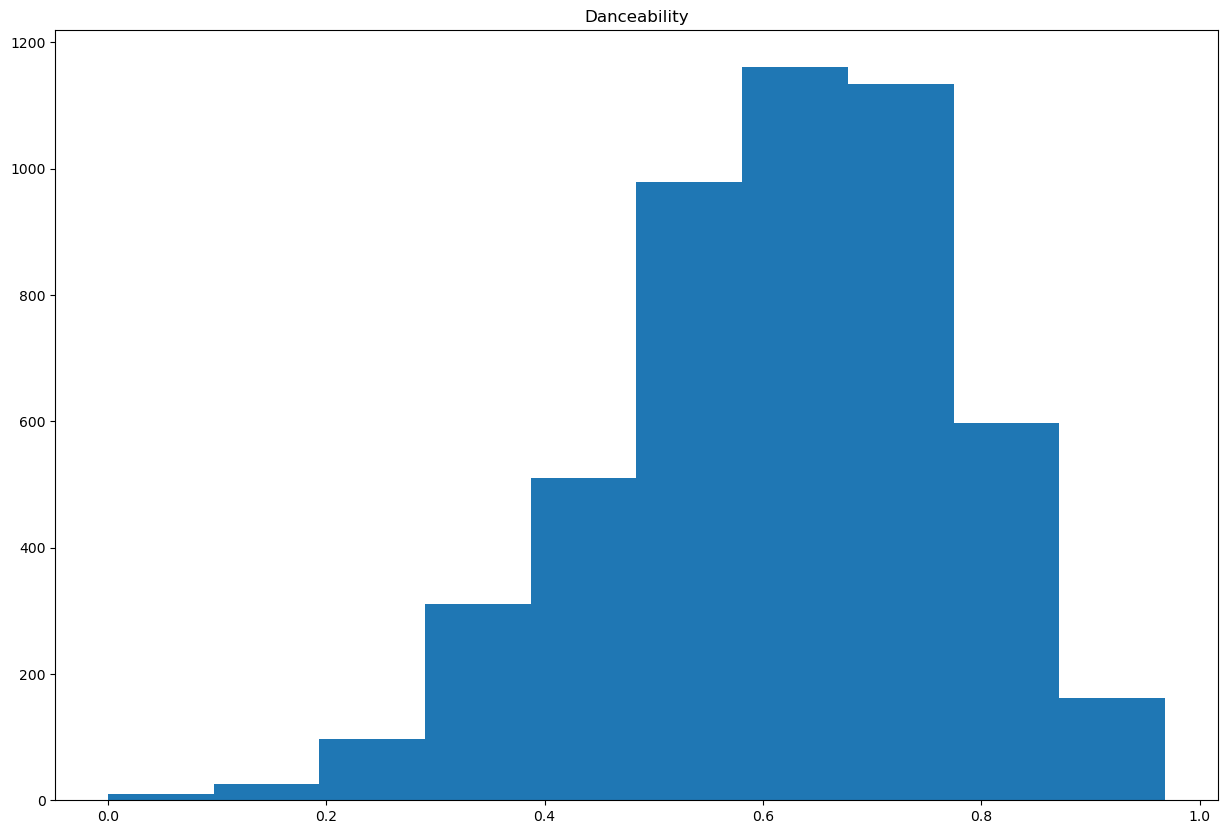

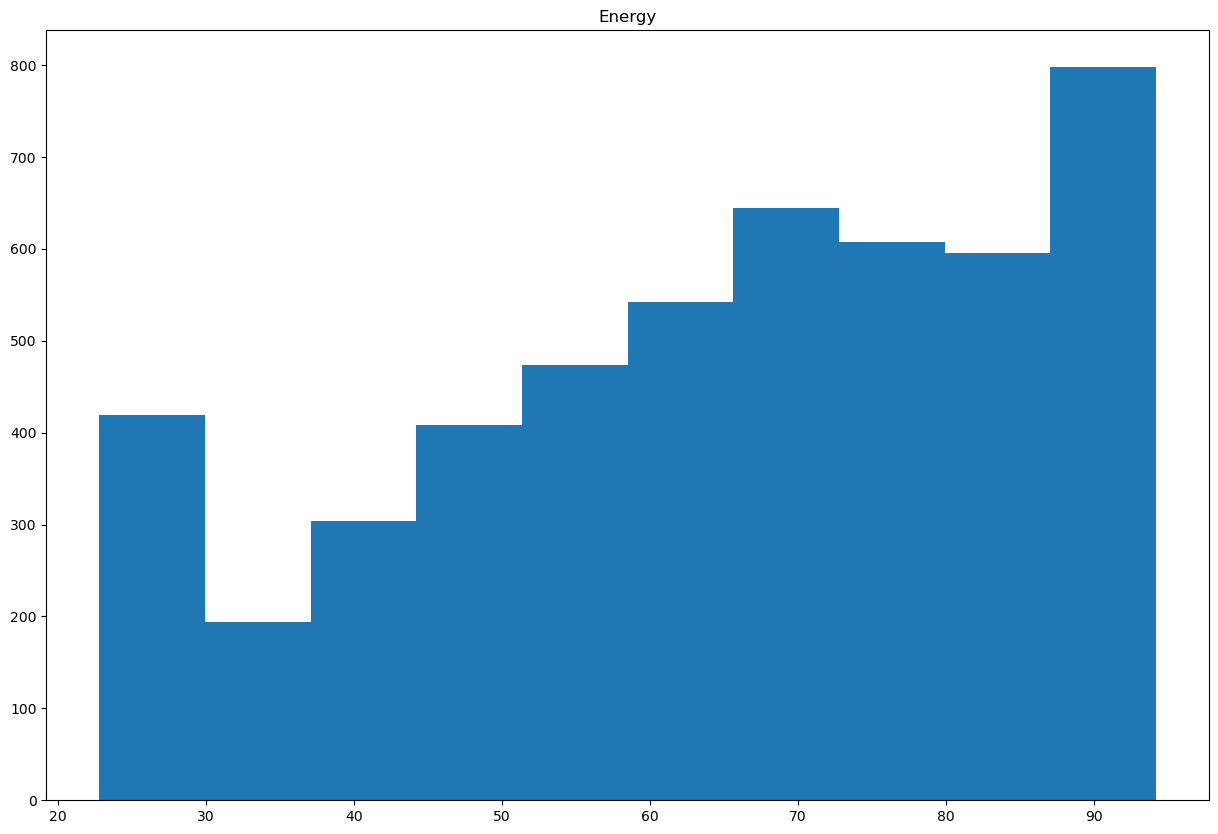

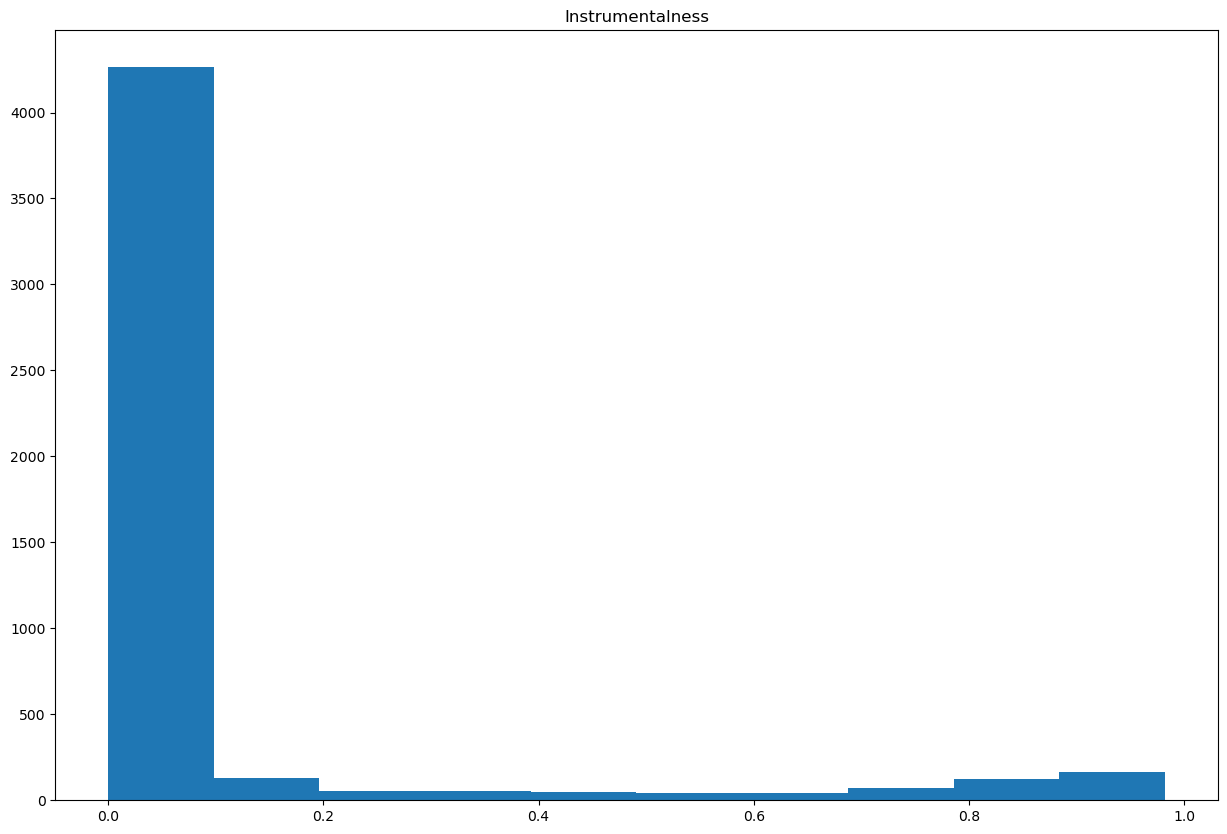

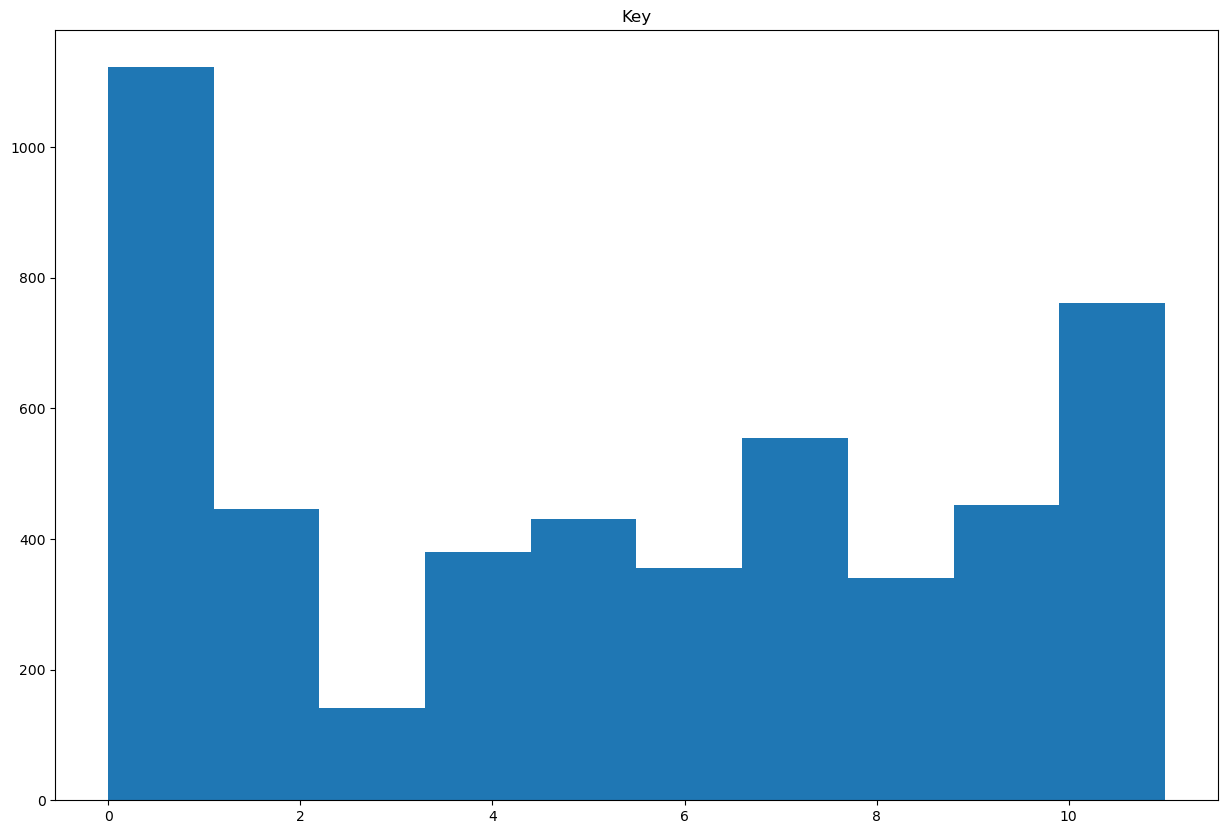

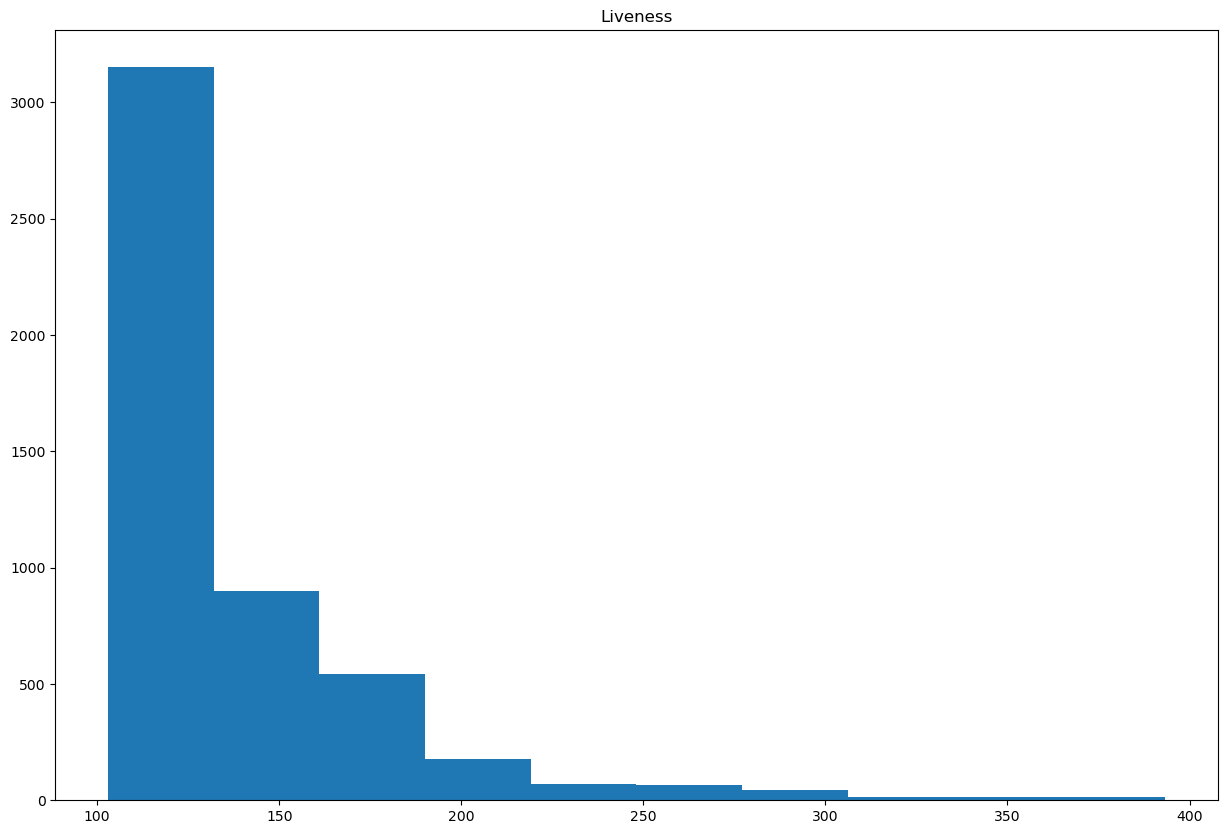

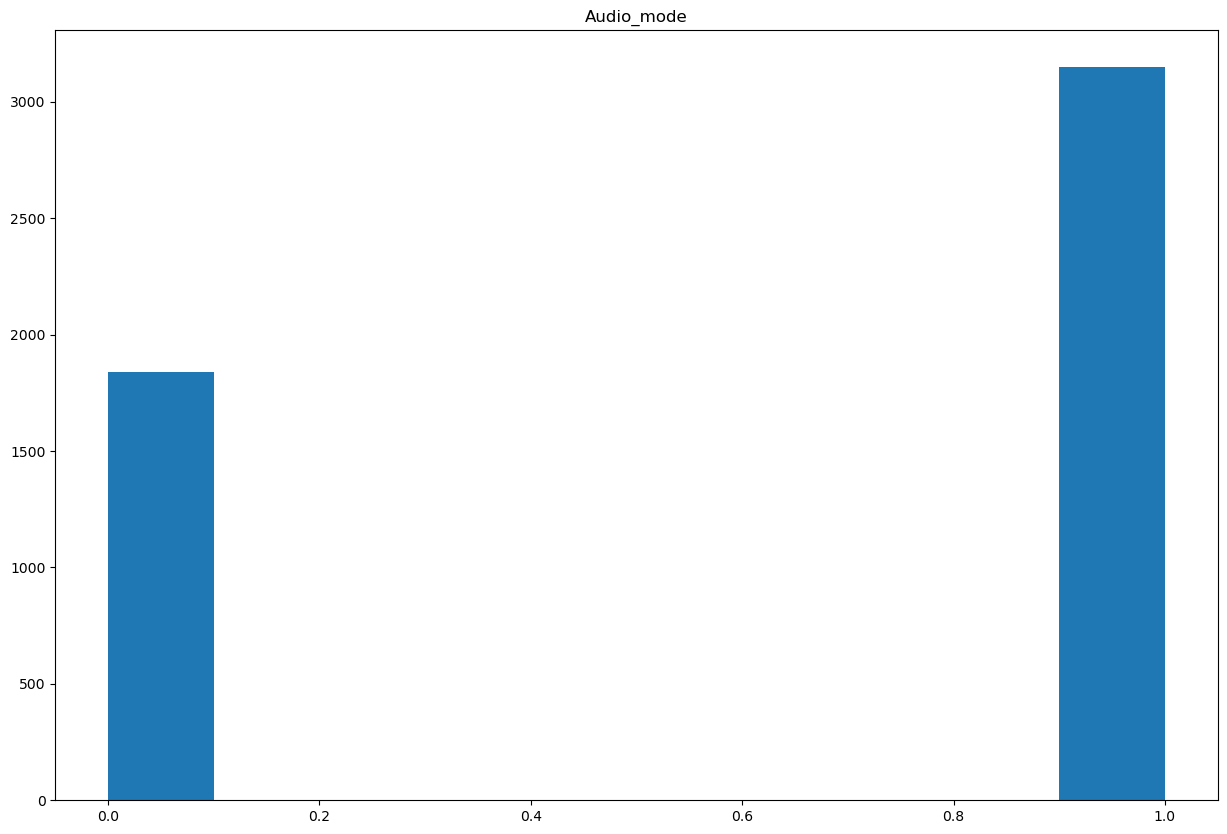

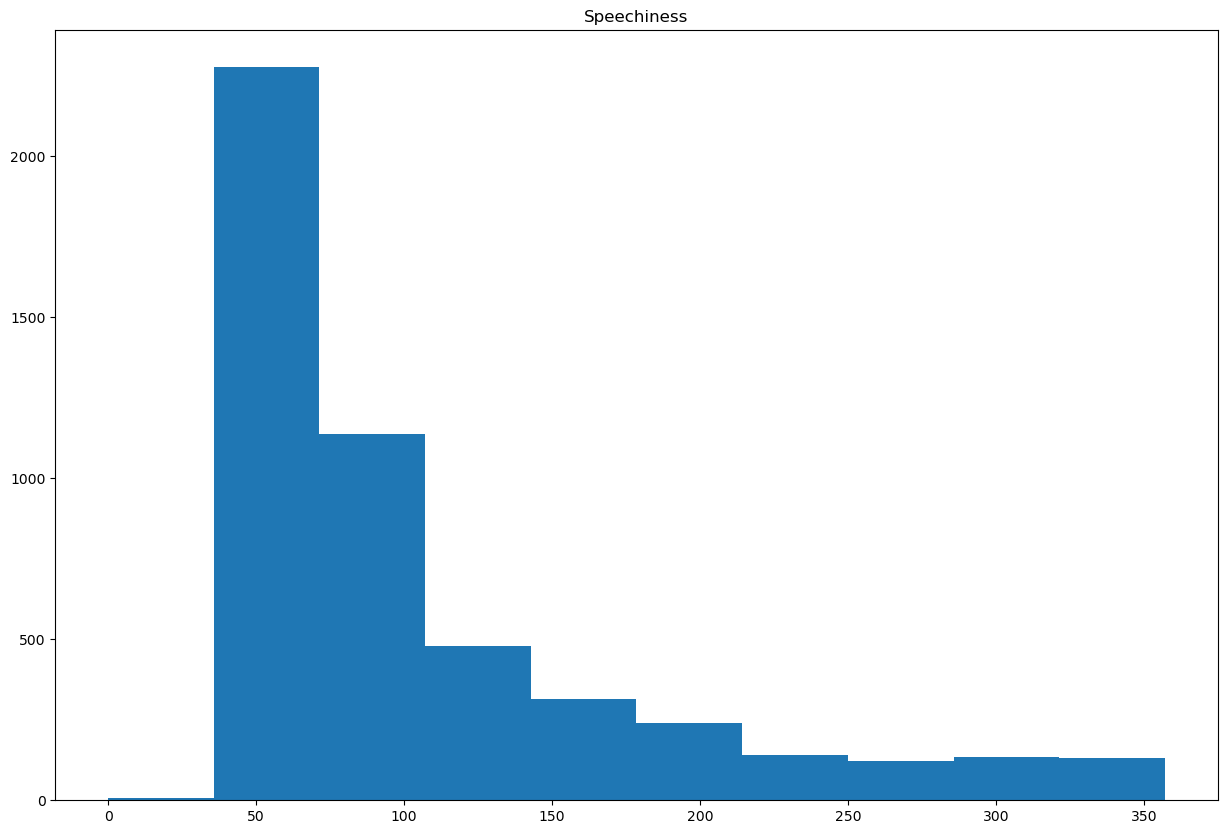

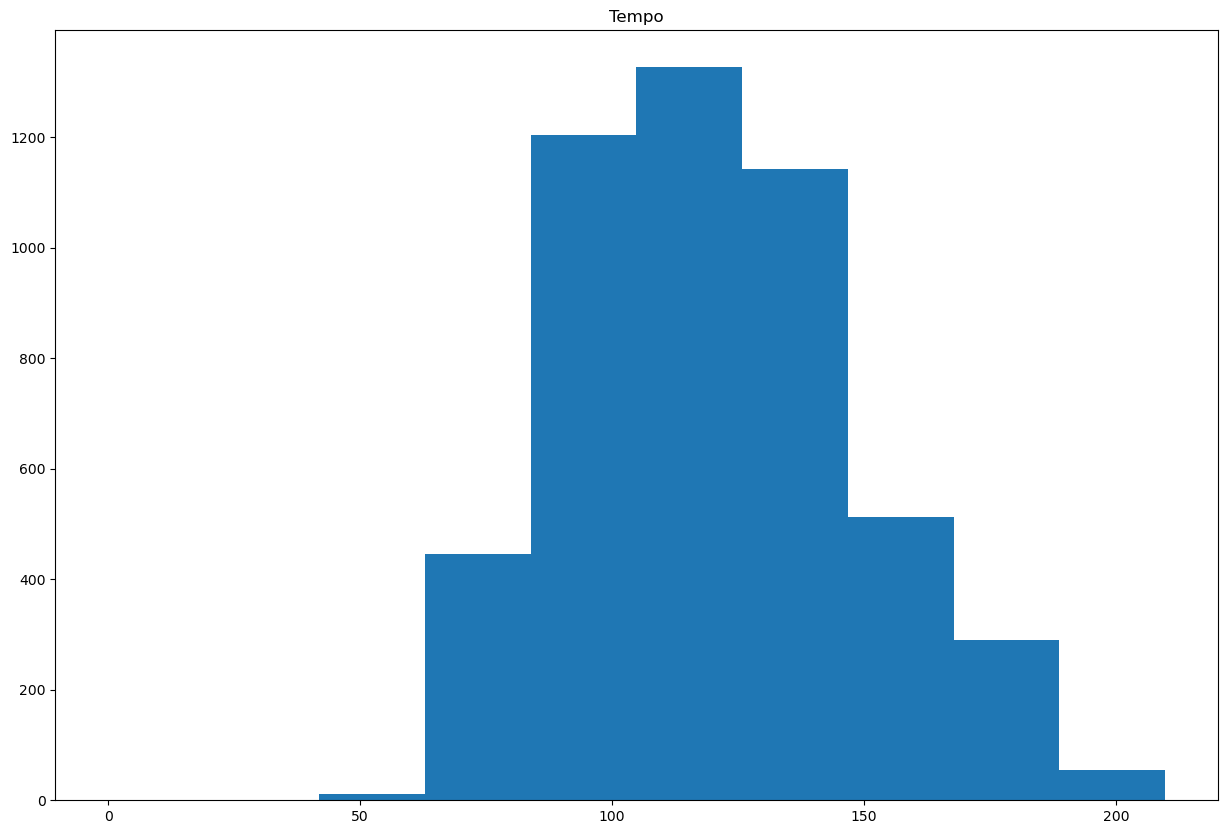

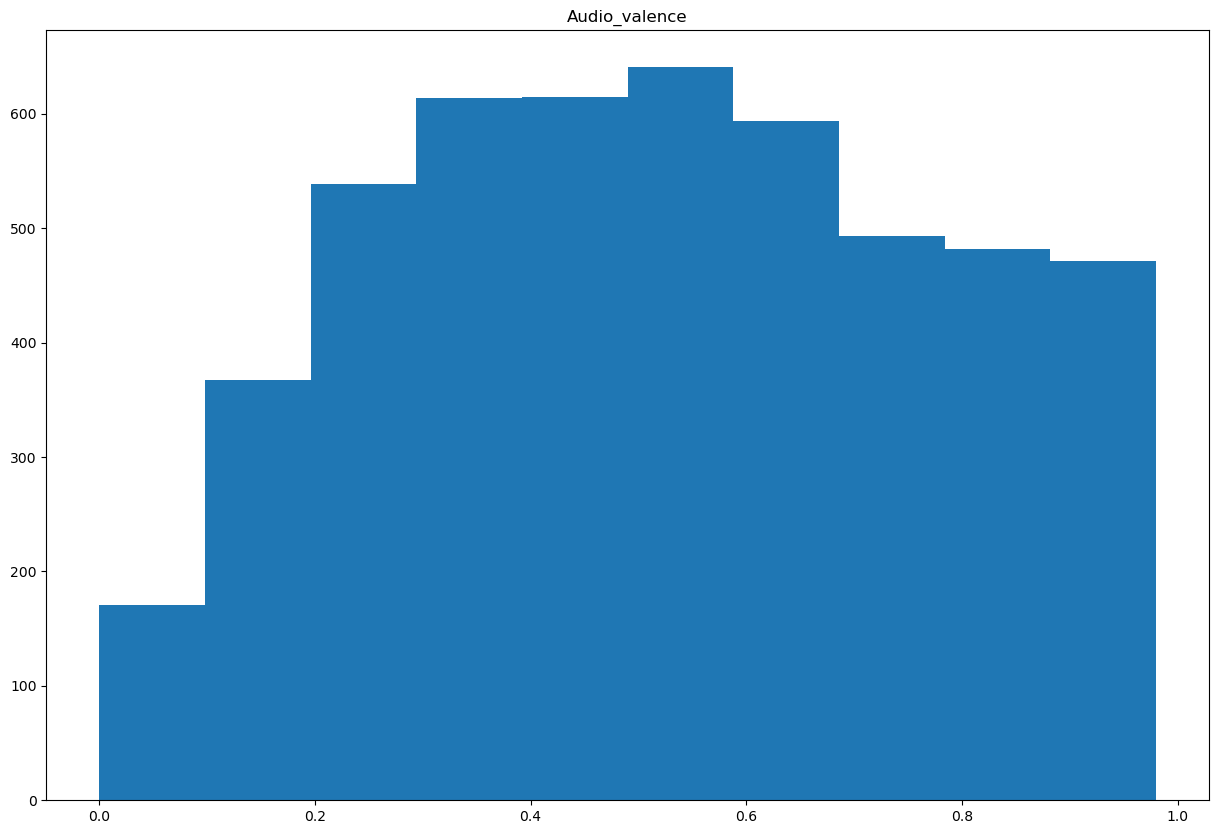

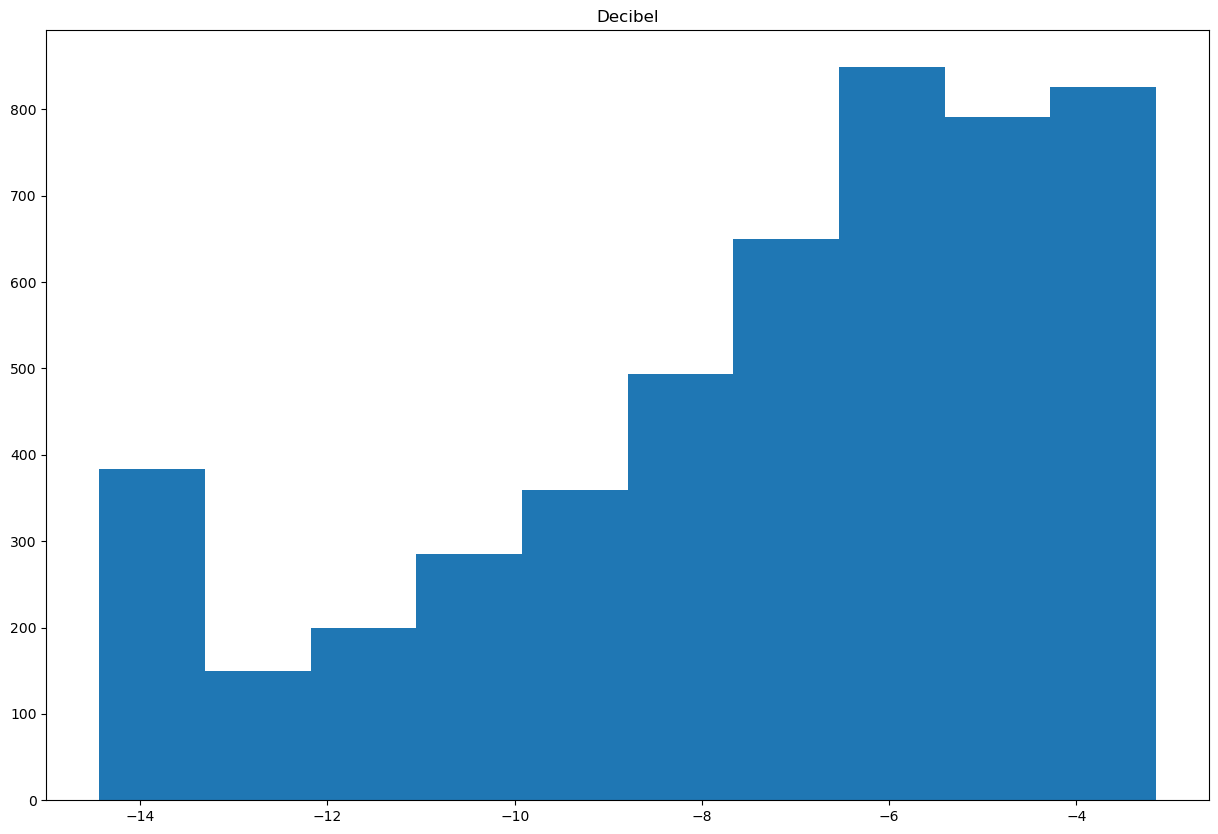

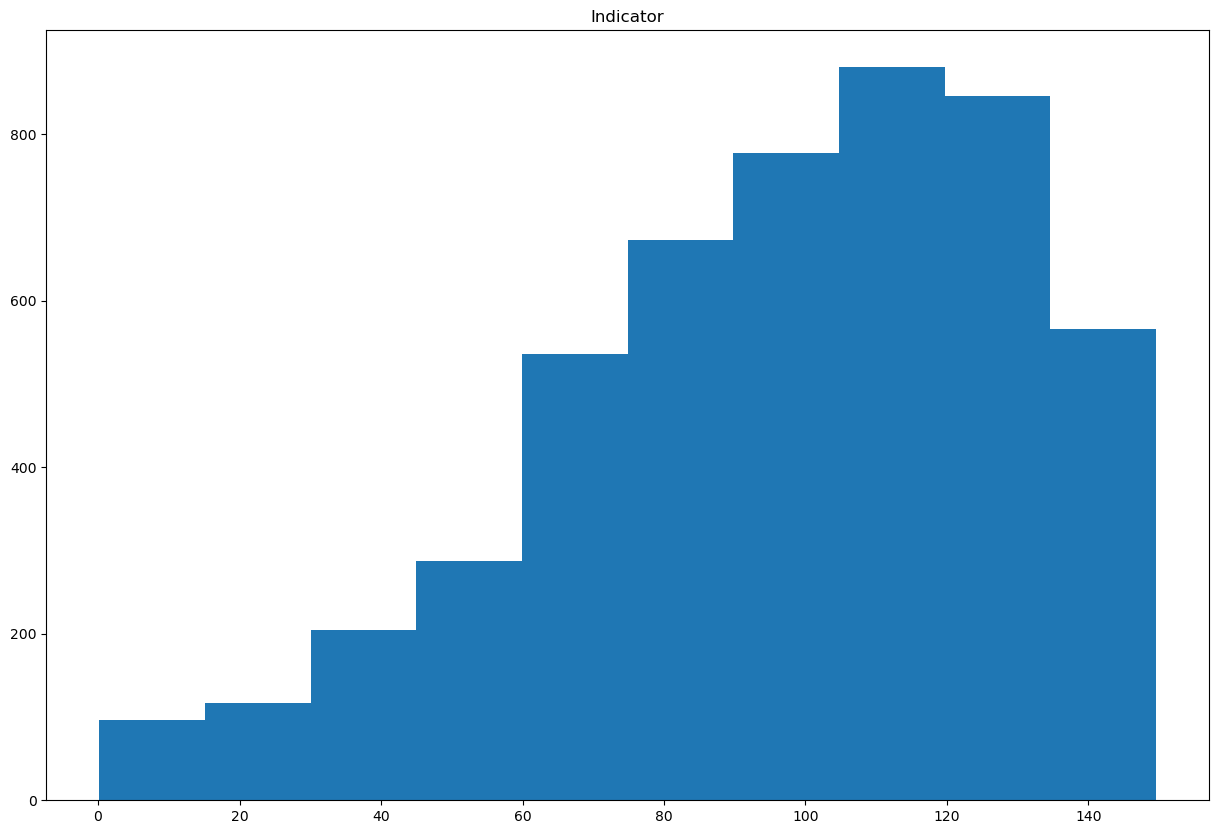

In [65]:
#Plot Histogram
for col in train_num_cols:
    X_train[col].hist(grid=False)
    plt.title(col)
    plt.show()

In [66]:
# Find the percentage of missing data within those variables

X_train.isnull().mean().sort_values(ascending=True)

Code                0.0
Decibel             0.0
Dynamism            0.0
Audio_valence       0.0
Tempo               0.0
Speechiness         0.0
Audio_mode          0.0
Loudness            0.0
Liveness            0.0
Instrumentalness    0.0
Energy              0.0
Danceability        0.0
Acousticness        0.0
Song_Duration_ms    0.0
Song_Name           0.0
Key                 0.0
Indicator           0.0
dtype: float64

### 5.1 Using Imputation Pipeline <a id="5.1"></a>
[Back to Content](#Table-of-Content)

In [67]:
# Make a list with numerical variables (arbitrary & median) and categorical variables (frequent). 
# Identify columns with missing values
# Numerical variables lists
features_num_arbitrary = ['Danceability', 'Speechiness']  # High missing data, less sensitive to arbitrary

# Categorical variables lists
features_cat_frequent = ['Dynamism', 'Loudness']  # Lower missing values, can use the most frequent category

In [68]:
# Assembling an imputation pipeline with scikit-learn
pipe = Pipeline(steps=[
    ('imp_num_arbitrary', mdi.ArbitraryNumberImputer(variables = features_num_arbitrary)),
    #('imp_num_median', mdi.MeanMedianImputer(imputation_method = 'median', variables=features_num_median)),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_frequent, imputation_method='frequent')),
])

In [69]:
# now we fit the preprocessor
pipe.fit(X_train)

Pipeline(steps=[('imp_num_arbitrary',
                 ArbitraryNumberImputer(variables=['Danceability',
                                                   'Speechiness'])),
                ('imp_cat_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Dynamism', 'Loudness']))])

In [70]:
# and now we impute the data
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [71]:
X_train.isnull().sum()

Code                0
Song_Name           0
Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [72]:
X_test.isnull().sum()

Code                0
Song_Name           0
Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [73]:
X_test.isnull().sum()

Code                0
Song_Name           0
Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [74]:
X_train

Code                            Song_Name  Song_Duration_ms  \
12421   HI8           Too Much (feat. Timbaland)            185790   
2954   MI13                              No Rain            217106   
5264   MI17  You Never Even Called Me By My Name            314226   
18719   HI9                                 3:15            167018   
13090  MI13                        Por Donde Vas            207013   
...     ...                                  ...               ...   
12911   EI7       Runaway (feat. Jacoby Shaddix)            226082   
8331    HI8                   When We Were Young            198613   
4132   LI22             Doria - Island Songs VII            202546   
6524    HI8                  Burn the House Down            212373   
6830   HI11                                  ABC            177426   

       Acousticness  Danceability  Energy  Instrumentalness  Key    Liveness  \
12421      0.004253       0.44154    63.5          0.000642    0  125.888400   
2954       0.606620       0.38511    47.6          0.000051    9  157.502500   
5264       0.149940       0.59796    45.9          0.000000    0  162.562500   
18719      0.377300       0.64449    65.4          0.000000    1  139.476100   
13090      0.703640       0.64449    51.5          0.000003    5  120.297024   
...             ...           ...     ...               ...  ...         ...   
12911      0.000099       0.47322    94.2          0.000002    6  103.754596   
8331       0.068012       0.55341    75.4          0.000071    5  127.464100   
4132       0.972160       0.20592    22.8          0.934000    3  128.142400   
6524       0.035672       0.44946    66.0          0.000000    0  139.476100   
6830       0.441980       0.70290    81.5          0.000469    8  120.450625   

       Audio_mode  Speechiness    Tempo  Audio_valence Dynamism  Decibel  \
12421           1        79.95   89.856          0.301     High   -4.476   
2954            1        47.40  148.117          0.566   Medium   -9.342   
5264            1        48.15  105.908          0.505   Medium  -13.190   
18719           1        69.90  141.975          0.539     High   -5.481   
13090           1        72.30   88.948          0.570   Medium   -9.857   
...           ...          ...      ...            ...      ...      ...   
12911           1       258.00  130.028          0.215    Extra   -3.252   
8331            1        38.85  104.995          0.592     High   -4.877   
4132            1        50.55  170.241          0.126      Low  -14.439   
6524            1       252.00  184.353          0.568     High   -4.357   
6830            1        65.70   93.603          0.955     High   -7.765   

      Loudness  Indicator  
12421    Blare      95.25  
2954     Clang      71.40  
5264    Babble      68.85  
18719    Blare      98.10  
13090    Clang      77.25  
...        ...        ...  
12911     Boom     146.55  
8331     Blare     113.10  
4132      Buzz      20.10  
6524     Blare      99.00  
6830      Roar     122.25  

[4987 rows x 17 columns]

In [75]:
X_test

Code                                    Song_Name  Song_Duration_ms  \
2897   MI17  Pocket Calculator - 2009 Remastered Version            296800   
15401  MI14                                       Azucar            314676   
18035   EI7                                      No Good            234240   
8609    HI9                            Low (feat T-Pain)            231400   
16840  EI10                                    The Stage            314676   
...     ...                                          ...               ...   
1333   HI10                         Guajira Guantanamera            312120   
17306  HI11   No Particular Place To Go - Single Version            161773   
14275  HI10                                     Flavours            219428   
10039   MI9                            Cómo Los Vaqueros            198582   
16804  MI11                                      Praying            230269   

       Acousticness  Danceability  Energy  Instrumentalness  Key    Liveness  \
2897       0.615440       0.84843    45.9          0.726000    8  121.881600   
15401      0.174440       0.48609    52.4          0.199000    9  128.368900   
18035      0.022932       0.37422    92.5          0.000620    9  139.240000   
8609       0.090944       0.90882    60.9          0.000000   10  129.732100   
16840      0.000356       0.44946    94.2          0.323000    9  122.766400   
...             ...           ...     ...               ...  ...         ...   
1333       0.450800       0.75537    60.2          0.000002    9  123.654400   
17306      0.422380       0.59796    81.6          0.000555    7  135.722500   
14275      0.030086       0.83853    83.4          0.000011   11  112.869376   
10039      0.484120       0.83457    44.7          0.000001    5  118.548544   
16804      0.470400       0.55935    38.1          0.000000   10  122.988100   

       Audio_mode  Speechiness    Tempo  Audio_valence Dynamism  Decibel  \
2897            1        77.70  135.863          0.964   Medium  -13.375   
15401           0        81.90  101.944          0.469   Medium  -10.833   
18035           1       277.50  108.525          0.584    Extra   -3.781   
8609            0       118.65  128.008          0.304     High   -5.640   
16840           0       146.25  134.945          0.215    Extra   -6.925   
...           ...          ...      ...            ...      ...      ...   
1333            1        46.50  127.477          0.668     High   -6.263   
17306           1        68.40  128.896          0.976     High   -7.150   
14275           1       134.70  140.054          0.673     High   -6.352   
10039           1        43.95  100.144          0.823   Medium   -5.266   
16804           1        45.30   73.483          0.325   Medium   -7.204   

      Loudness  Indicator  
2897    Babble      68.85  
15401   Rumble      78.60  
18035     Boom     138.75  
8609     Blare      91.35  
16840     Roar     141.75  
...        ...        ...  
1333      Roar      90.30  
17306     Roar     122.40  
14275     Roar     125.10  
10039    Blare      67.05  
16804     Roar      57.15  

[2138 rows x 17 columns]

In [76]:
y_test.isnull().mean()

0.0

In [77]:
y_train.isnull().mean()

0.0

## Step 6: Categorical Data Encoding <a id="6.0"></a>
[Back to Content](#Table-of-Content)

In [78]:
X_train.head()

Code                            Song_Name  Song_Duration_ms  \
12421   HI8           Too Much (feat. Timbaland)            185790   
2954   MI13                              No Rain            217106   
5264   MI17  You Never Even Called Me By My Name            314226   
18719   HI9                                 3:15            167018   
13090  MI13                        Por Donde Vas            207013   

       Acousticness  Danceability  Energy  Instrumentalness  Key    Liveness  \
12421      0.004253       0.44154    63.5          0.000642    0  125.888400   
2954       0.606620       0.38511    47.6          0.000051    9  157.502500   
5264       0.149940       0.59796    45.9          0.000000    0  162.562500   
18719      0.377300       0.64449    65.4          0.000000    1  139.476100   
13090      0.703640       0.64449    51.5          0.000003    5  120.297024   

       Audio_mode  Speechiness    Tempo  Audio_valence Dynamism  Decibel  \
12421           1        79.95   89.856          0.301     High   -4.476   
2954            1        47.40  148.117          0.566   Medium   -9.342   
5264            1        48.15  105.908          0.505   Medium  -13.190   
18719           1        69.90  141.975          0.539     High   -5.481   
13090           1        72.30   88.948          0.570   Medium   -9.857   

      Loudness  Indicator  
12421    Blare      95.25  
2954     Clang      71.40  
5264    Babble      68.85  
18719    Blare      98.10  
13090    Clang      77.25

In [79]:
# Drop the variables
X_train = X_train.drop(columns=['Song_Name', 'Code'])
X_train.head()

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
12421            185790      0.004253       0.44154    63.5          0.000642   
2954             217106      0.606620       0.38511    47.6          0.000051   
5264             314226      0.149940       0.59796    45.9          0.000000   
18719            167018      0.377300       0.64449    65.4          0.000000   
13090            207013      0.703640       0.64449    51.5          0.000003   

       Key    Liveness  Audio_mode  Speechiness    Tempo  Audio_valence  \
12421    0  125.888400           1        79.95   89.856          0.301   
2954     9  157.502500           1        47.40  148.117          0.566   
5264     0  162.562500           1        48.15  105.908          0.505   
18719    1  139.476100           1        69.90  141.975          0.539   
13090    5  120.297024           1        72.30   88.948          0.570   

      Dynamism  Decibel Loudness  Indicator  
12421     High   -4.476    Blare      95.25  
2954    Medium   -9.342    Clang      71.40  
5264    Medium  -13.190   Babble      68.85  
18719     High   -5.481    Blare      98.10  
13090   Medium   -9.857    Clang      77.25

In [80]:
# Drop the variables
X_test = X_test.drop(columns=['Song_Name', 'Code'])
X_test.head()

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
2897             296800      0.615440       0.84843    45.9           0.72600   
15401            314676      0.174440       0.48609    52.4           0.19900   
18035            234240      0.022932       0.37422    92.5           0.00062   
8609             231400      0.090944       0.90882    60.9           0.00000   
16840            314676      0.000356       0.44946    94.2           0.32300   

       Key  Liveness  Audio_mode  Speechiness    Tempo  Audio_valence  \
2897     8  121.8816           1        77.70  135.863          0.964   
15401    9  128.3689           0        81.90  101.944          0.469   
18035    9  139.2400           1       277.50  108.525          0.584   
8609    10  129.7321           0       118.65  128.008          0.304   
16840    9  122.7664           0       146.25  134.945          0.215   

      Dynamism  Decibel Loudness  Indicator  
2897    Medium  -13.375   Babble      68.85  
15401   Medium  -10.833   Rumble      78.60  
18035    Extra   -3.781     Boom     138.75  
8609      High   -5.640    Blare      91.35  
16840    Extra   -6.925     Roar     141.75

### 6.1 Ordinal Encoding <a id="6.1"></a>
[Back to Content](#Table-of-Content)

In [81]:
# Encode X_train & X_test using ordinal / label encoding
# Using Feature Engine
# Create the ordinal encoder specifying the variables to encode
ordinal_enc = OrdinalEncoder(
    #encoding_method='arbitrary',
    variables=["Dynamism", "Loudness"]
)

In [82]:
# Combine training and test sets for consistent encoding
X_train_combine = pd.concat([X_train,X_test],ignore_index=True)
y_train_combine = pd.concat([y_train,y_test],ignore_index=True)

In [83]:
X_train_combine[['Dynamism','Loudness']].isnull().mean()

Dynamism    0.0
Loudness    0.0
dtype: float64

In [84]:
X_train_combine.dtypes

Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness            float64
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism             object
Decibel             float64
Loudness             object
Indicator           float64
dtype: object

In [85]:
y_train_combine.dtypes

dtype('float64')

In [86]:
# Check the shapes of X_train_combine and y_train_combine before fitting
print("Shape of X_train_combine:", X_train_combine.shape)
print("Shape of y_train_combine:", y_train_combine.shape)

Shape of X_train_combine: (7125, 15)
Shape of y_train_combine: (7125,)


In [87]:
ordinal_enc.fit(X_train_combine, y_train_combine)

OrdinalEncoder(variables=['Dynamism', 'Loudness'])

In [88]:
# let's inspect which variables the encoder will encode

ordinal_enc.variables

['Dynamism', 'Loudness']

In [89]:
# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

{'Dynamism': {'Low': 0, 'Medium': 1, 'High': 2, 'Extra': 3},
 'Loudness': {'Murmur': 0,
  'Mutter': 1,
  'Drone': 2,
  'Chatter': 3,
  'Rustle': 4,
  'Hum': 5,
  'Mumble': 6,
  'Buzz': 7,
  'Babble': 8,
  'Whisper': 9,
  'Rumble': 10,
  'Clang': 11,
  'Roar': 12,
  'Blare': 13,
  'Boom': 14,
  'Blast': 15,
  'Ear-splitting': 16,
  'Deafening': 17}}

In [90]:
# transform combined data
X_combined_enc = ordinal_enc.transform(X_train_combine)

In [91]:
# split the encoded data back into training and testing data sets
X_train_v1 = X_combined_enc.iloc[:len(X_train)]
X_test_v1 = X_combined_enc.iloc[len(X_train):]

In [92]:
# let's explore the result

X_train_v1.head()

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
0            185790      0.004253       0.44154    63.5          0.000642   
1            217106      0.606620       0.38511    47.6          0.000051   
2            314226      0.149940       0.59796    45.9          0.000000   
3            167018      0.377300       0.64449    65.4          0.000000   
4            207013      0.703640       0.64449    51.5          0.000003   

   Key    Liveness  Audio_mode  Speechiness    Tempo  Audio_valence  Dynamism  \
0    0  125.888400           1        79.95   89.856          0.301         2   
1    9  157.502500           1        47.40  148.117          0.566         1   
2    0  162.562500           1        48.15  105.908          0.505         1   
3    1  139.476100           1        69.90  141.975          0.539         2   
4    5  120.297024           1        72.30   88.948          0.570         1   

   Decibel  Loudness  Indicator  
0   -4.476        13      95.25  
1   -9.342        11      71.40  
2  -13.190         8      68.85  
3   -5.481        13      98.10  
4   -9.857        11      77.25

In [93]:
X_train_v1.dtypes

Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness            float64
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism              int64
Decibel             float64
Loudness              int64
Indicator           float64
dtype: object

In [94]:
X_test_v1.head()

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
4987            296800      0.615440       0.84843    45.9           0.72600   
4988            314676      0.174440       0.48609    52.4           0.19900   
4989            234240      0.022932       0.37422    92.5           0.00062   
4990            231400      0.090944       0.90882    60.9           0.00000   
4991            314676      0.000356       0.44946    94.2           0.32300   

      Key  Liveness  Audio_mode  Speechiness    Tempo  Audio_valence  \
4987    8  121.8816           1        77.70  135.863          0.964   
4988    9  128.3689           0        81.90  101.944          0.469   
4989    9  139.2400           1       277.50  108.525          0.584   
4990   10  129.7321           0       118.65  128.008          0.304   
4991    9  122.7664           0       146.25  134.945          0.215   

      Dynamism  Decibel  Loudness  Indicator  
4987         1  -13.375         8      68.85  
4988         1  -10.833        10      78.60  
4989         3   -3.781        14     138.75  
4990         2   -5.640        13      91.35  
4991         3   -6.925        12     141.75

In [95]:
X_test_v1.dtypes

Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness            float64
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism              int64
Decibel             float64
Loudness              int64
Indicator           float64
dtype: object

In [96]:
# Encode X_train & X_test using One-Hot-Encoding (Did not work/Not in use)
#Using Feature engine
#ohe_enc = OneHotEncoder(
#    top_categories=None,
#    drop_last=True)

In [97]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

#ohe_enc.fit(X_train) 

In [98]:
#X_train_ohe = ohe_enc.transform(X_train)
#X_test_ohe = ohe_enc.transform(X_test)

In [99]:
#X_train_ohe.head()

In [100]:
#X_test_ohe.head()

In [101]:
# let's create an encoder (Did not work/Not in use)

#count_enc = CountFrequencyEncoder(
#    encoding_method='count', 
#    variables=None)

In [102]:
# fit the encoder to the train set
#count_enc.fit(X_train)

In [103]:
# the encoder stores the variables it will encode

#count_enc.variables

In [104]:
# in the encoder dict contains the counts or frequencies
# per category per variable

#count_enc.encoder_dict_

In [105]:
# let's transform train and test sets

#X_train_enc = count_enc.transform(X_train)
#X_test_enc = count_enc.transform(X_test)

In [106]:
# let's inspect the result

#X_train_enc.head()

In [107]:
#X_test_enc.head()

In [108]:
#X_train_enc.isnull().sum()

In [109]:
#X_test_enc.isnull().sum()

In [110]:
#X_test_enc.dtypes

In [111]:
#X_test_enc['Code']=X_test_enc['Code'].astype(object)
#X_test_enc['Song_Name']=X_test_enc['Song_Name'].astype(object)

In [112]:
# to impute missing data with feature-engine
#from feature_engine.imputation import MeanMedianImputer
# let's create a median imputer

#median_imputer = MeanMedianImputer(imputation_method='median',
                                   #variables=['Code','Song_Name','Loudness'])

#median_imputer.fit(X_train_enc)

In [113]:
# let's inspect the dictionary with the mappings for each variable
# median_imputer.imputer_dict_

In [114]:
# X_train_enc[['Code','Song_Name']].isnull().mean()

In [115]:
# transform the data
#X_train_enc = median_imputer.transform(X_train_enc)
#X_test_enc = median_imputer.transform(X_test_enc)

In [116]:
#X_train_enc.isnull().sum()

In [117]:
#X_test_enc.isnull().sum()

### 6.2 Yeo-Johnson Transformation <a id="6.2"></a>
[Back to Content](#Table-of-Content)

#### Usefulness of the Yeo-Johnson Transformation

#### Enhances Model Performance
- **Normalization**: YJT helps in adjusting data distributions to be more Gaussian-like, which is crucial for the optimal performance of many algorithms.
- **Variance Stabilization**: It stabilizes variance across the data, which is particularly beneficial for models that assume constant variance.

#### Increases Versatility
- **Handling Negative Values**: Unlike some transformations that are limited to positive data, YJT can be applied to data with both positive and negative values, making it more versatile.

#### Improves Parameter Estimation
- **Reliability**: By reducing skewness and stabilizing variance, YJT can lead to more reliable parameter estimates, which is essential for models like linear regression.

#### Aids in Data Interpretation
- **Statistical Methods**: The transformation makes it easier to apply and interpret classical statistical methods that assume normality, enhancing the clarity and effectiveness of analytical outcomes.

Yeo-Johnson transformation is needed for variables that are very skewed (either to the left or right). However, how do we know which variables to choose to do this transformation?

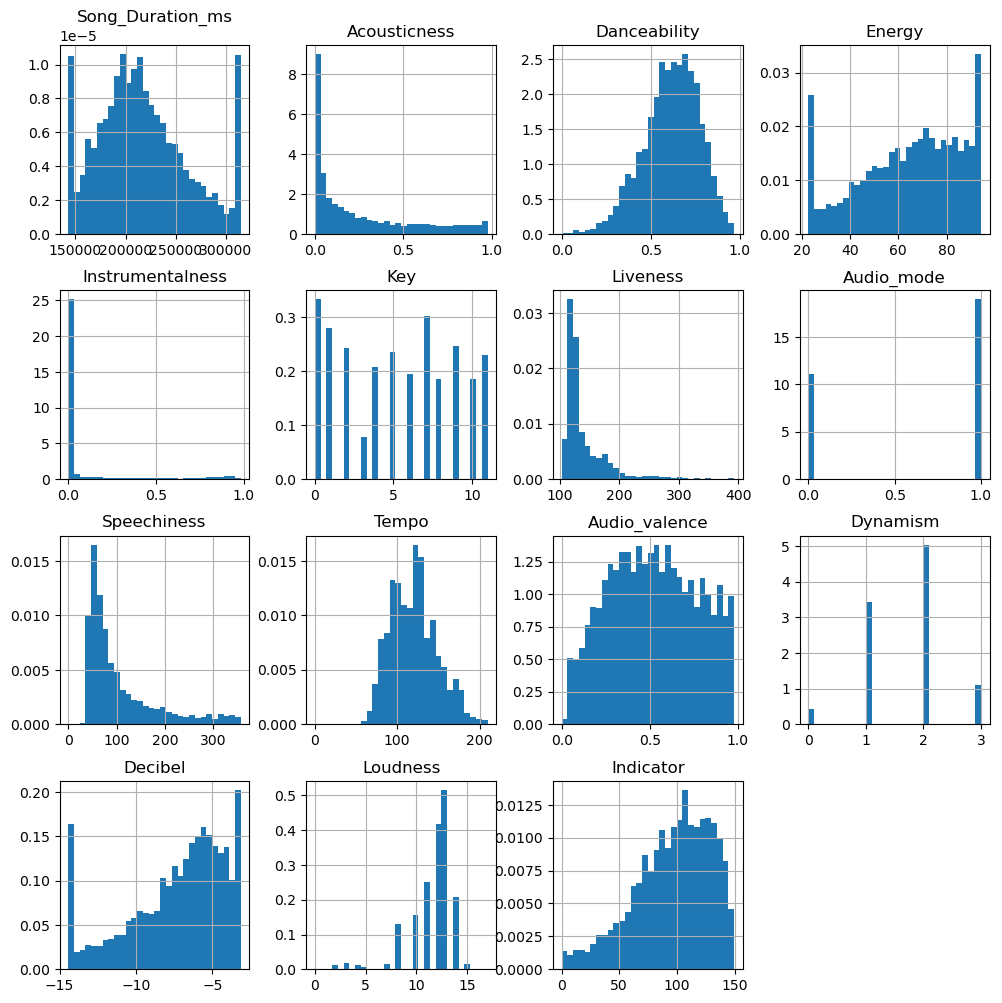

In [118]:
# visualize the variable distributions
X_train_v1.hist(bins=30, figsize=(12,12), density=True)
plt.show()

Based on the histograms, I'll be using the yjt for these 4 variables 'Acousticness', 'Liveness', 'Speechiness' and 'Tempo'.

In [119]:
# Apply Yeo-Johnson Transformation.
# Initialize the transformer
yjt = YeoJohnsonTransformer(variables= ['Acousticness', 'Liveness', 'Speechiness', 'Tempo'])

In [120]:
# fit transformer to the dataframe
yjt.fit(X_train_v1)

YeoJohnsonTransformer(variables=['Acousticness', 'Liveness', 'Speechiness',
                                 'Tempo'])

In [121]:
# transform indicated variables

X_train_v2 = yjt.transform(X_train_v1)

In [122]:
X_test_v2 = yjt.transform(X_test_v1)

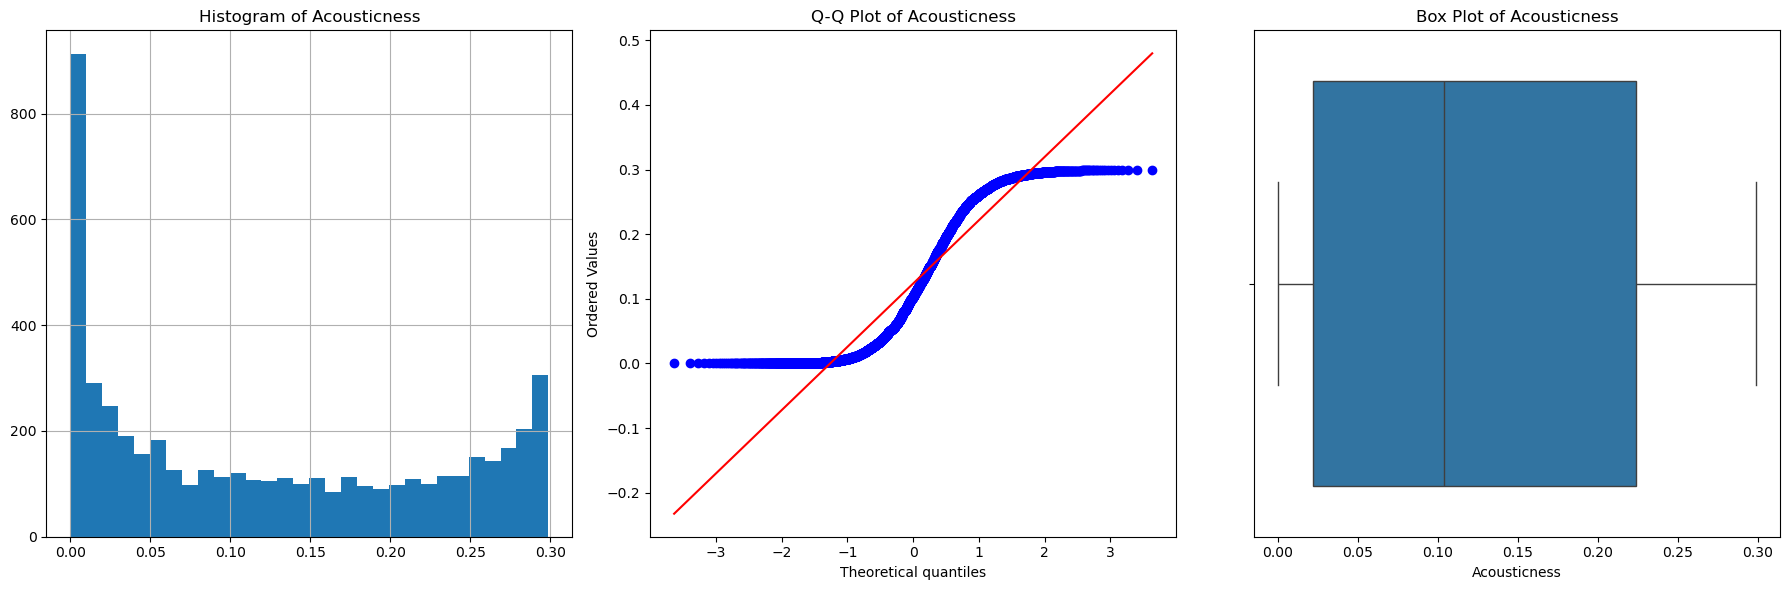

In [123]:
# make diagnostic plot of transformed variable
diagnostic_plots(X_train_v2, 'Acousticness')

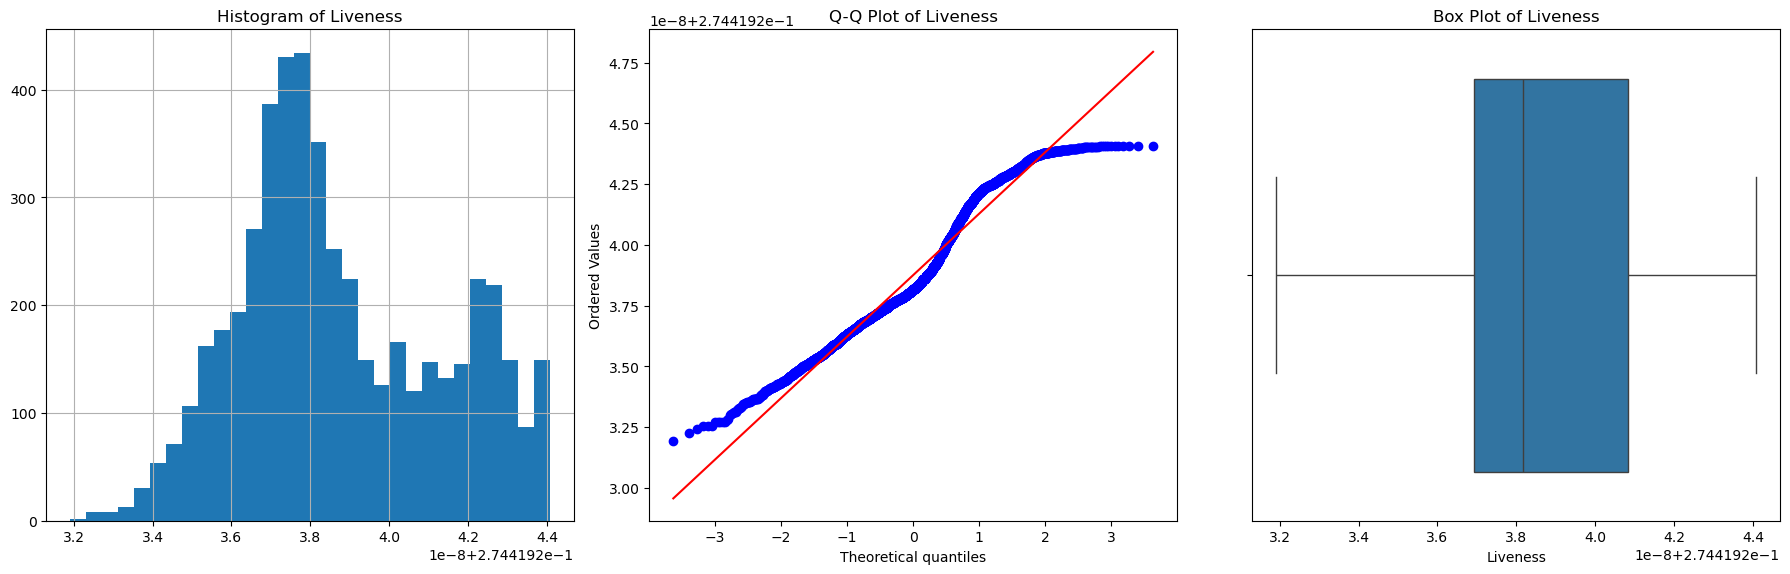

In [124]:
# make diagnostic plot of transformed variable
diagnostic_plots(X_train_v2, 'Liveness')

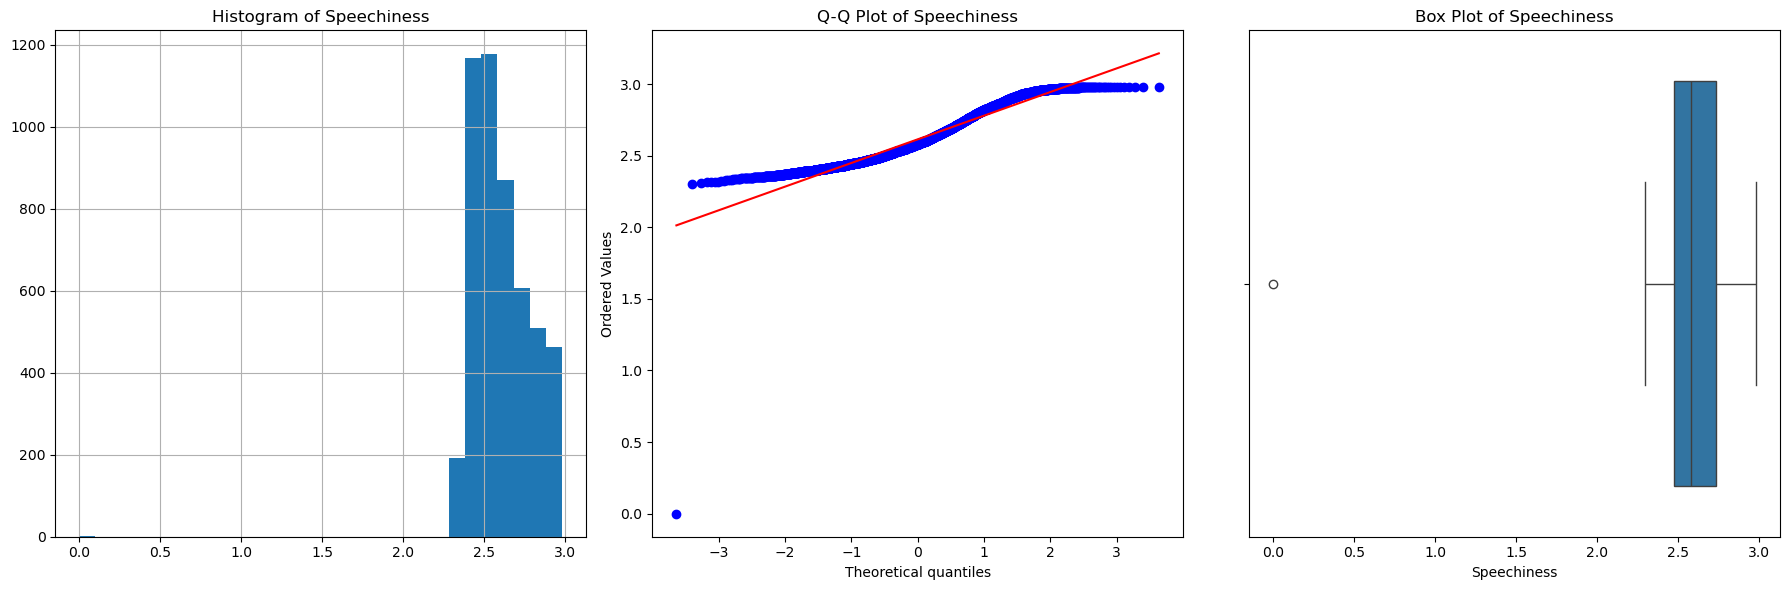

In [125]:
# make diagnostic plot of transformed variable
diagnostic_plots(X_train_v2, 'Speechiness')

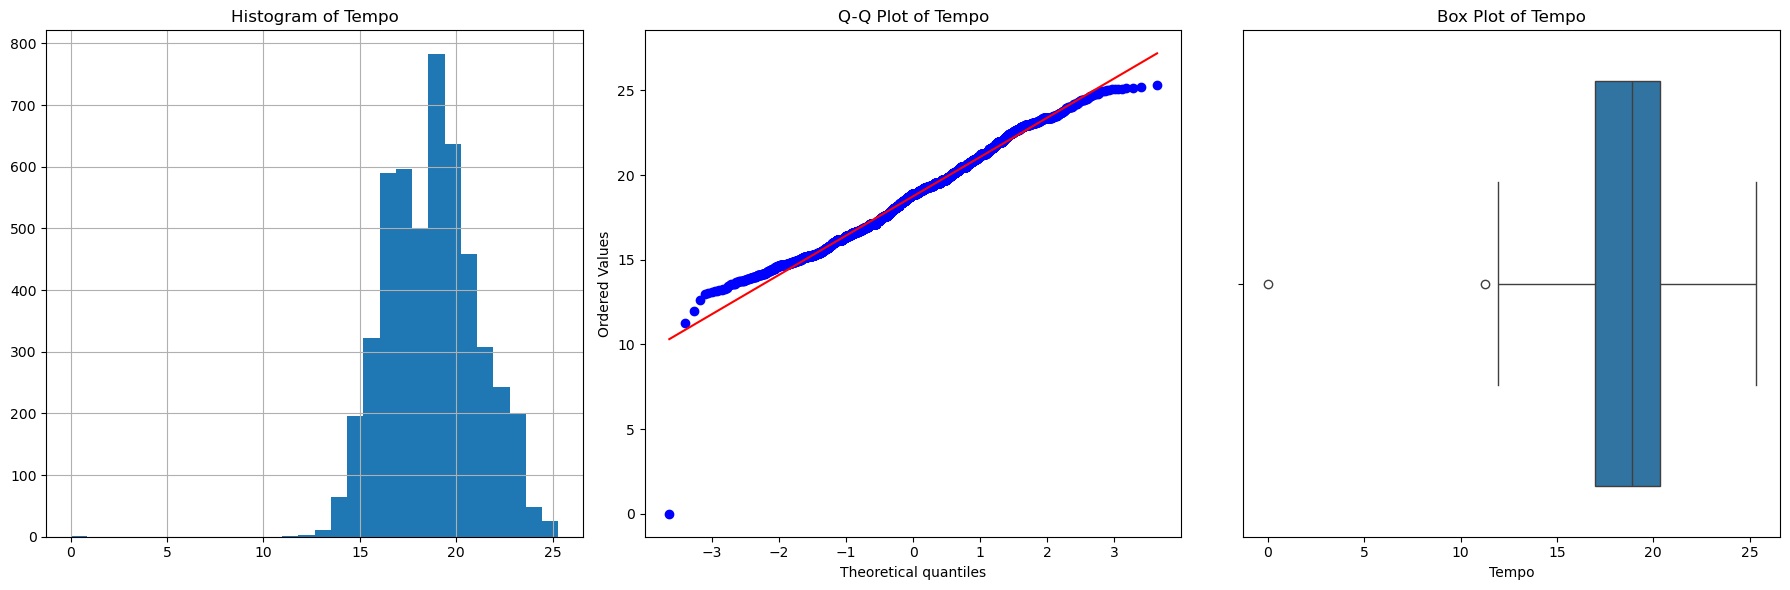

In [126]:
# make diagnostic plot of transformed variable
diagnostic_plots(X_train_v2, 'Tempo')

## Step 7: Variable Discretization /Binning <a id="7.0"></a>
[Back to Content](#Table-of-Content)

In [127]:
# plot the histogram to the num variables
#X_train_v2[train_num_cols].hist(bins=30, figsize=(12,12))
#plt.show()

### Equal-width discretization with Feature-engine

In [128]:
# with feature engine we can automate the process for many variables (Did not work/Not in use)
# in one line of code

#disc = EqualWidthDiscretiser(bins=10, variables = ['Acousticness', 'Liveness', 'Speechiness'])

#disc.fit(X_train_v2)

In [129]:
# the limits of the intervals are stored in the binner_dict_

#disc.binner_dict_

In [130]:
# transform train and test sets

#X_train_v2 = disc.transform(X_train_v2)
#X_test_v2 = disc.transform(X_test_v2)

In [131]:
# Acousticness
# calculate proportion of observations per interval
#X_train_v2 = X_train_v2.groupby(['Acousticness'])['Acousticness'].count() / len(X_train_v2)
#X_test_v2 = X_test_v2.groupby(['Acousticness'])['Acousticness'].count() / len(X_test_v2)

# concatenate aggregated views
#tmp = pd.concat([X_train_v2, X_test_v2], axis=1)
#tmp.columns = ['X_train_v2', 'X_test_v2']

# plot
#tmp.plot.bar()
#plt.xticks(rotation=0)
#plt.ylabel('Number of observations per bin')

### Equal-frequency discretization with Feature-engine

In [132]:
# with feature engine we can automate the process for many variables (Did not work/Not in use)
# in one line of code

#disc = EqualFrequencyDiscretiser(q=10, variables = ['Acousticness', 'Liveness', 'Speechiness'])

#disc.fit(X_train_v2)

In [133]:
# in the binner dict, we can see the limits of the intervals
# for each variable

#disc.binner_dict_

In [134]:
# transform train and test sets

#X_train_v2 = disc.transform(X_train_v2)
#X_test_v2 = disc.transform(X_test_v2)

In [135]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set


#X_train_v2 = X_train_v2.groupby(['Acousticness'])['Acousticness'].count() / len(X_train_v2)
#X_test_v2 = X_test_v2.groupby(['Acousticness'])['Acousticness'].count() / len(X_test_v2)

#tmp = pd.concat([X_train_v2, X_train_v2], axis=1)
#tmp.columns = ['X_train_v2', 'X_train_v2']
#tmp.plot.bar()
#plt.xticks(rotation=0)
#plt.ylabel('Number of observations per bin')

## Step 8: Feature Engineer <a id="8.0"></a>
[Back to Content](#Table-of-Content)

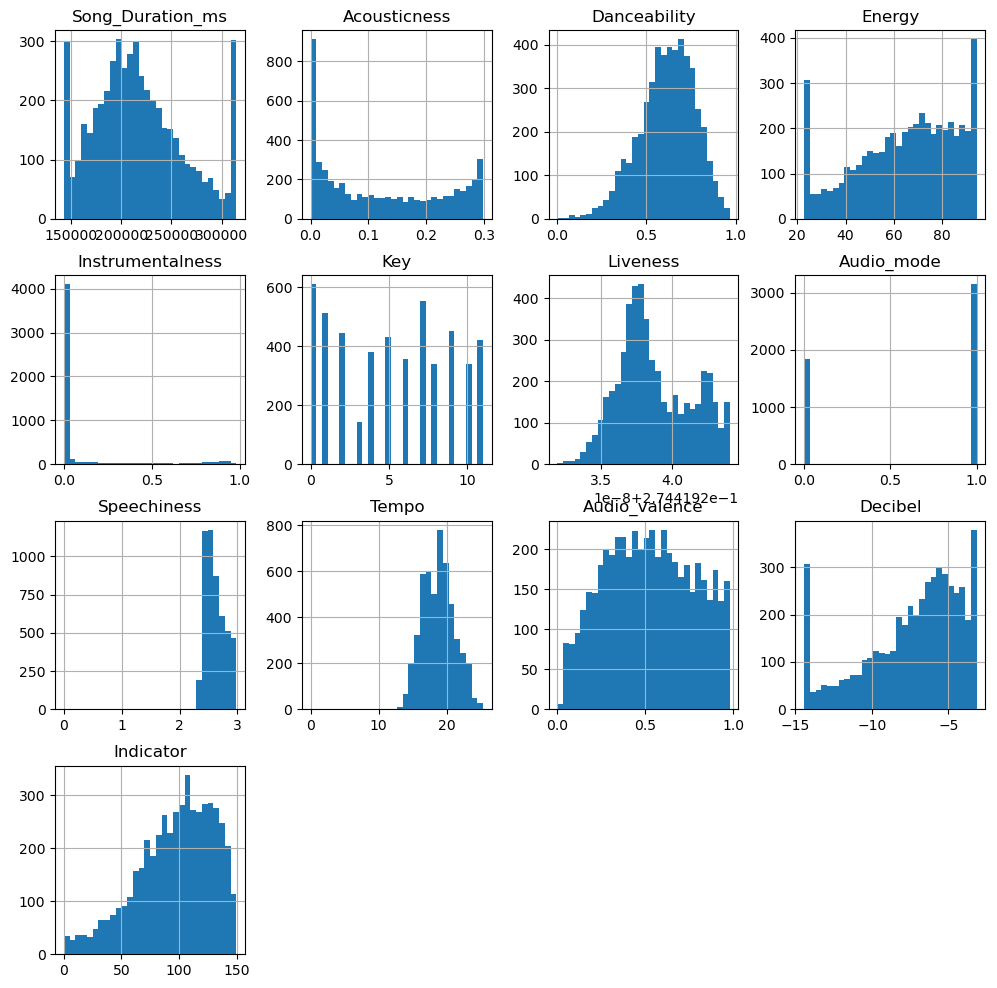

In [136]:
# plot the histogram to the num variables
X_train_v2[train_num_cols].hist(bins=30, figsize=(12,12))
plt.show()

### 8.1 Standardization <a id="8.1"></a>
[Back to Content](#Table-of-Content)

In [137]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set
scaler.fit(X_train_v2)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_v2)
X_test_scaled = scaler.transform(X_test_v2)

In [138]:
# the scaler stores the mean of the features, learned from train set
scaler.mean_

array([ 2.17305541e+05,  1.23682132e-01,  6.16272796e-01,  6.46335272e+01,
        8.78338515e-02,  5.28494085e+00,  2.74419239e-01,  6.31441749e-01,
        2.61363768e+00,  1.87510918e+01,  5.22624103e-01,  1.68237417e+00,
       -7.33193383e+00,  1.16428715e+01,  9.63116403e+01])

In [139]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set
scaler.scale_

array([4.52299589e+04, 1.03924516e-01, 1.55314505e-01, 2.05819489e+01,
       2.34588687e-01, 3.59812182e+00, 2.57397878e-09, 4.82413792e-01,
       1.71743962e-01, 2.33262611e+00, 2.48436530e-01, 7.22171809e-01,
       3.15308677e+00, 2.21163022e+00, 3.29254066e+01])

In [140]:
# let's transform the returned NumPy arrays to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_v2.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_v2.columns)

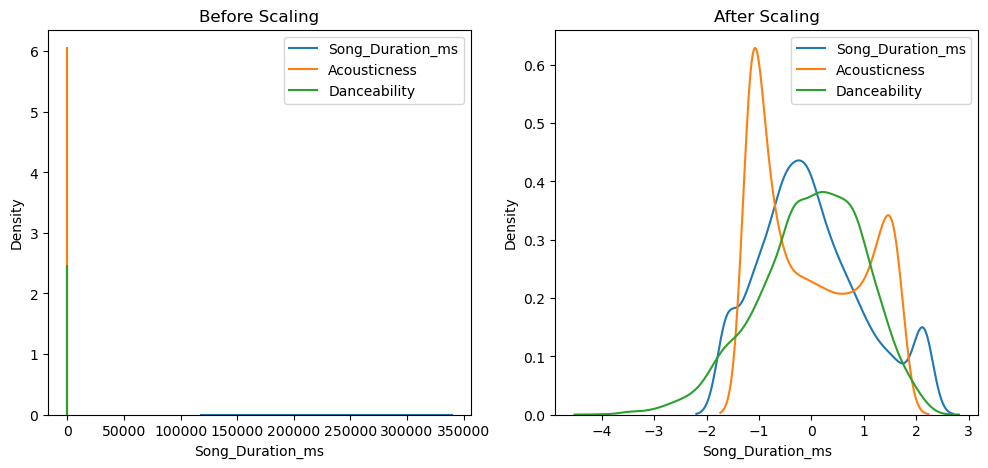

In [141]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_v2['Song_Duration_ms'], ax=ax1, label ='Song_Duration_ms')
sns.kdeplot(X_train_v2['Acousticness'], ax=ax1, label ='Acousticness')
sns.kdeplot(X_train_v2['Danceability'], ax=ax1, label ='Danceability')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Song_Duration_ms'], ax=ax2, label ='Song_Duration_ms')
sns.kdeplot(X_train_scaled['Acousticness'], ax=ax2, label ='Acousticness')
sns.kdeplot(X_train_scaled['Danceability'], ax=ax2, label ='Danceability')
ax2.legend()
plt.show()

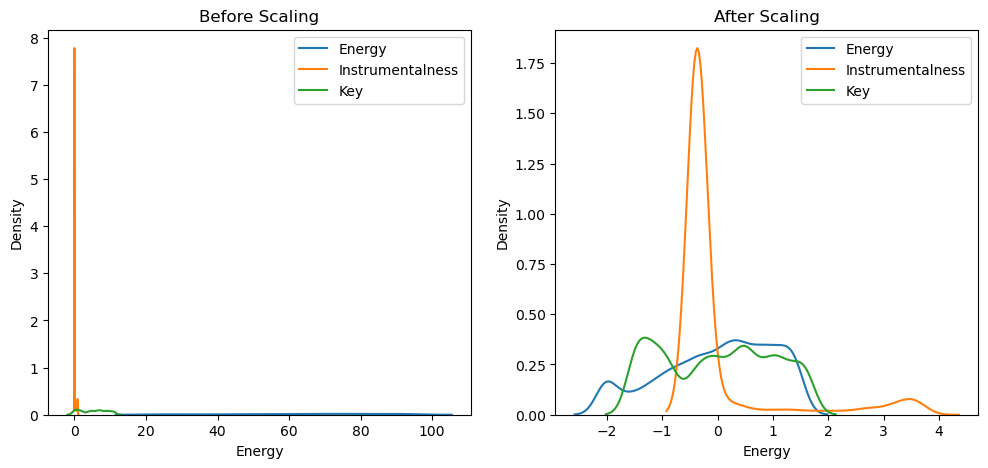

In [142]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_v2['Energy'], ax=ax1, label ='Energy')
sns.kdeplot(X_train_v2['Instrumentalness'], ax=ax1, label ='Instrumentalness')
sns.kdeplot(X_train_v2['Key'], ax=ax1, label ='Key')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Energy'], ax=ax2, label ='Energy')
sns.kdeplot(X_train_scaled['Instrumentalness'], ax=ax2, label ='Instrumentalness')
sns.kdeplot(X_train_scaled['Key'], ax=ax2, label ='Key')
ax2.legend()
plt.show()

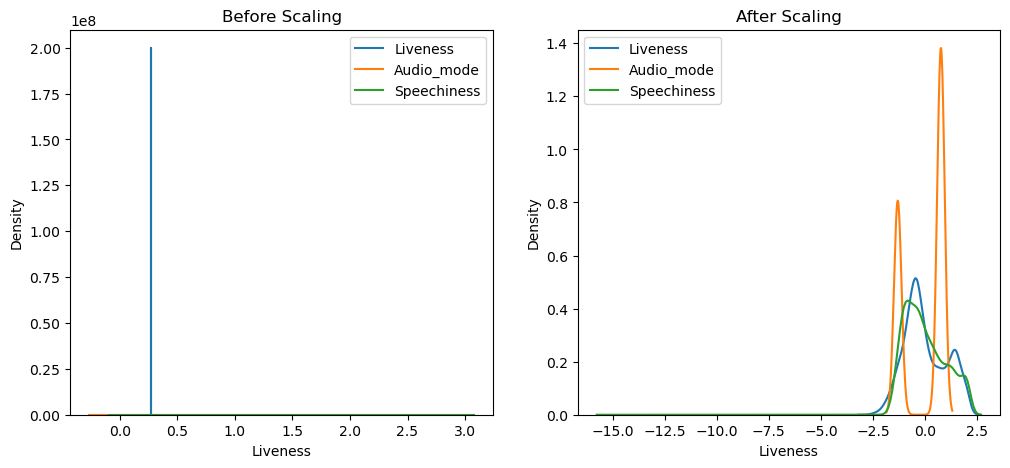

In [143]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_v2['Liveness'], ax=ax1, label ='Liveness')
sns.kdeplot(X_train_v2['Audio_mode'], ax=ax1, label ='Audio_mode')
sns.kdeplot(X_train_v2['Speechiness'], ax=ax1, label ='Speechiness')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Liveness'], ax=ax2, label ='Liveness')
sns.kdeplot(X_train_scaled['Audio_mode'], ax=ax2, label ='Audio_mode')
sns.kdeplot(X_train_scaled['Speechiness'], ax=ax2, label ='Speechiness')
ax2.legend()
plt.show()

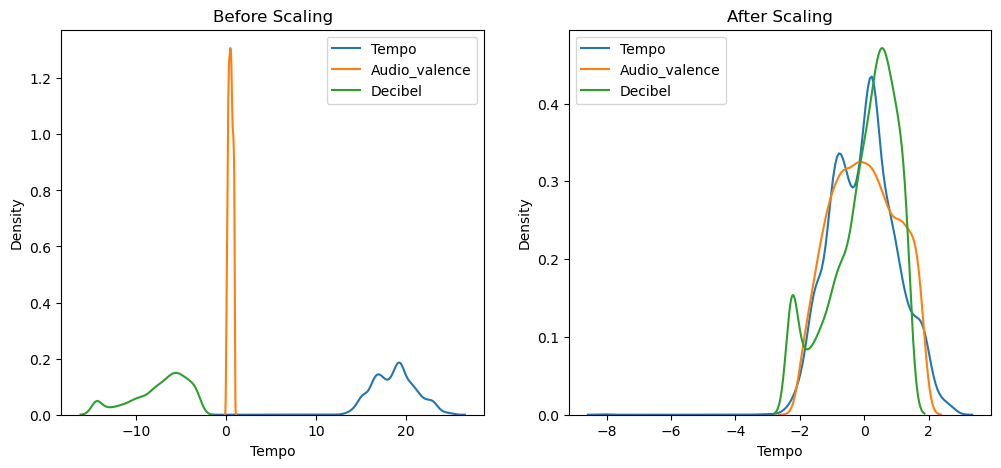

In [144]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_v2['Tempo'], ax=ax1, label ='Tempo')
sns.kdeplot(X_train_v2['Audio_valence'], ax=ax1, label ='Audio_valence')
sns.kdeplot(X_train_v2['Decibel'], ax=ax1, label ='Decibel')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Tempo'], ax=ax2, label ='Tempo')
sns.kdeplot(X_train_scaled['Audio_valence'], ax=ax2, label ='Audio_valence')
sns.kdeplot(X_train_scaled['Decibel'], ax=ax2, label ='Decibel')
ax2.legend()
plt.show()

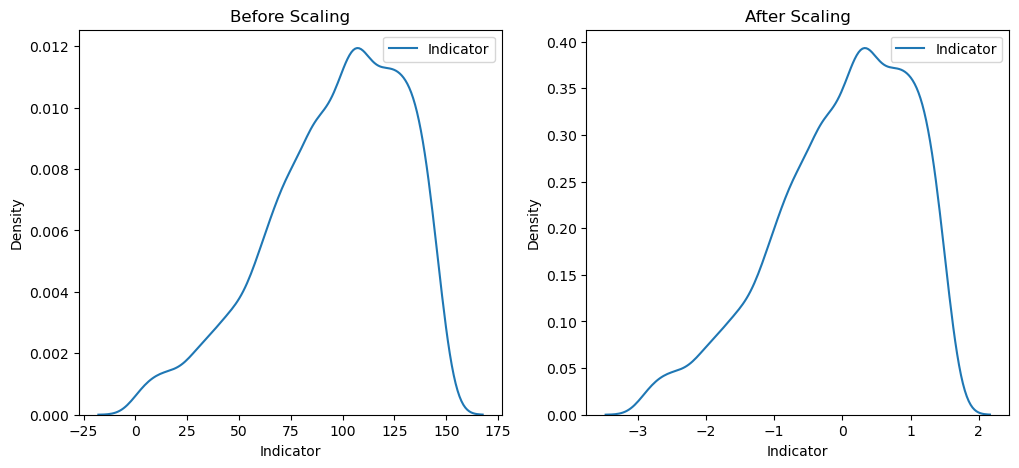

In [145]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_v2['Indicator'], ax=ax1, label ='Indicator')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Indicator'], ax=ax2, label ='Indicator')
ax2.legend()
plt.show()

## Step 9: Linear Regression Modelling <a id="9.0"></a>
[Back to Content](#Table-of-Content)

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [146]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model
#X_train_student_final_premodel_version = X_train_v2
#X_test_student_final_premodel_version = X_test_v2
X_train_student_final_premodel_version = X_train_scaled
X_test_student_final_premodel_version = X_test_scaled
y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

In [147]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [149]:
X_train_final.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [150]:
X_train_final.isnull().mean()

Song_Duration_ms    0.0
Acousticness        0.0
Danceability        0.0
Energy              0.0
Instrumentalness    0.0
Key                 0.0
Liveness            0.0
Audio_mode          0.0
Speechiness         0.0
Tempo               0.0
Audio_valence       0.0
Dynamism            0.0
Decibel             0.0
Loudness            0.0
Indicator           0.0
dtype: float64

### 9.1 Build Linear Regression Model <a id="9.1"></a>
[Back to Content](#Table-of-Content)

In [151]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 101.89413003829577 
 test_mse: 103.93180170819184
train_r-sq: 0.38586635168167316 
 test_r-sq: 0.3606776465912065


In [152]:
# Initial (Dropped Dynamism & Loudness)
# train_mse: 117.88635822886326
# test_mse: 119.57949554661678
# train_r-sq: 0.39301564160028757 
# test_r-sq: 0.38817755126835496

# Before Feature Engineer (Dropped Code & Song name)
# train_mse: 101.8941300405396 
# test_mse: 103.9318017525816
# train_r-sq: 0.3858663516681492 
# test_r-sq: 0.3606776463181488

# After Feature Engineer
# train_mse: 101.89413003829577 
# test_mse: 103.93180170819184
# train_r-sq: 0.38586635168167316 
# test_r-sq: 0.3606776465912065

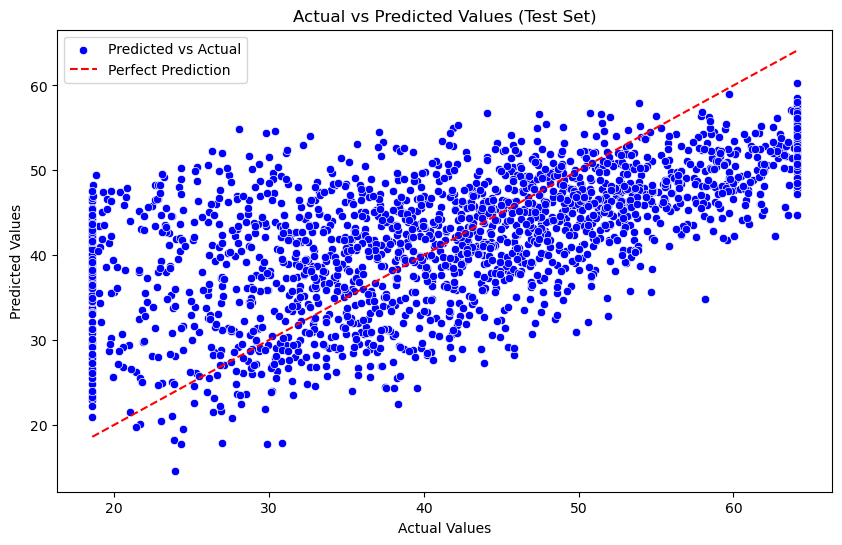

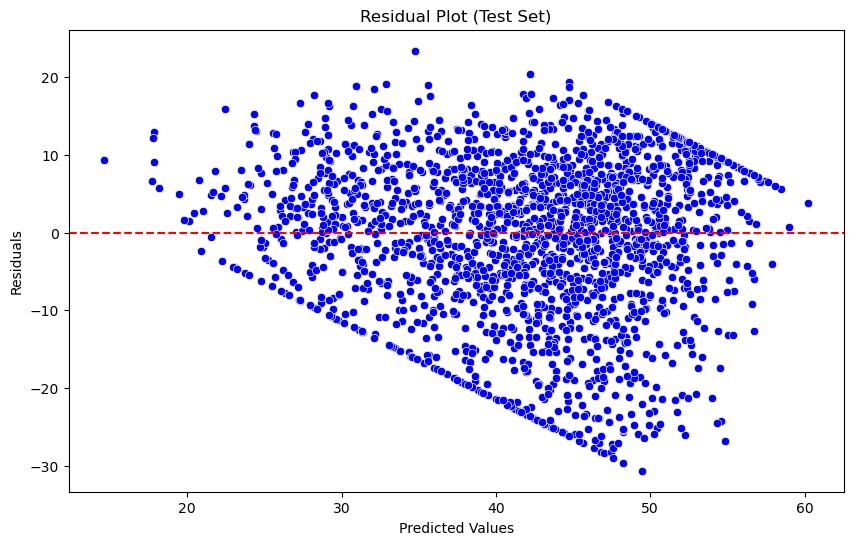

In [153]:
# Predicting the values
y_train_pred = model_linear_regression.predict(X_train_final)
y_test_pred = model_linear_regression.predict(X_test_final)

# Plot Actual vs. Predicted values for Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_final, y=y_test_pred, label='Predicted vs Actual', color='blue')
plt.plot([min(y_test_final), max(y_test_final)], [min(y_test_final), max(y_test_final)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()

# Calculate residuals
train_residuals = y_train_final - y_train_pred
test_residuals = y_test_final - y_test_pred

# Plot Residuals for Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=test_residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

The purpose of these plots is to show... 

Firstly, the actual vs predicted values plot. It is to provide a clear visual representation of the model's predictive performance. It demonstrates how well the model's predictions align with the actual outcomes and also the spread of points around the perfect prediction line, helping to assess the reliability of the model. A tighter clustering of points around the line would indicate a higher level of accuracy.

Secondly, the Residual Plot. It diagnoses the performance of the linear regression model by plotting the residuals (the differences between actual and predicted values) against the predicted values. This plot helps identify patterns in the prediction errors. Ideally, residuals should be randomly scattered around zero, indicating no systematic bias in the model.

### Analysis and Visualisation

I will be merging back X_train_final and y_train_final so that I can visulise how the transformed dataset compares with song_pop_data_trimmed.

In [154]:
# merge X_train and y_train back 
trained_song_pop_data = pd.concat([X_train_final, y_train_final], axis=1) 

In [155]:
trained_song_pop_data.head()

Song_Duration_ms  Acousticness  Danceability    Energy  Instrumentalness  \
0         -0.696785     -1.149524     -1.125026 -0.055074         -0.371680   
1         -0.004412      1.300730     -1.488353 -0.827595         -0.374199   
2          2.142838     -0.082930     -0.117908 -0.910192         -0.374416   
3         -1.111819      0.823627      0.181678  0.037240         -0.374416   
4         -0.227560      1.433613      0.181678 -0.638109         -0.374404   

        Key  Liveness  Audio_mode  Speechiness     Tempo  Audio_valence  \
0 -1.468805 -0.199522    0.763988    -0.092720 -1.103650      -0.892075   
1  1.032500  1.081188    0.763988    -1.095882  1.008463       0.174595   
2 -1.468805  1.192100    0.763988    -1.063869 -0.464938      -0.070940   
3 -1.190883  0.514699    0.763988    -0.338359  0.808909       0.065916   
4 -0.079192 -0.611046    0.763988    -0.275859 -1.141463       0.190696   

   Dynamism   Decibel  Loudness  Indicator  Song_Popularity  
0  0.439820  0.905758  0.613633  -0.032244            57.72  
1 -0.944892 -0.637492 -0.290678  -0.756608              NaN  
2 -0.944892 -1.857883 -1.647143  -0.834056              NaN  
3  0.439820  0.587023  0.613633   0.054315            52.89  
4 -0.944892 -0.800824 -0.290678  -0.578934            46.68

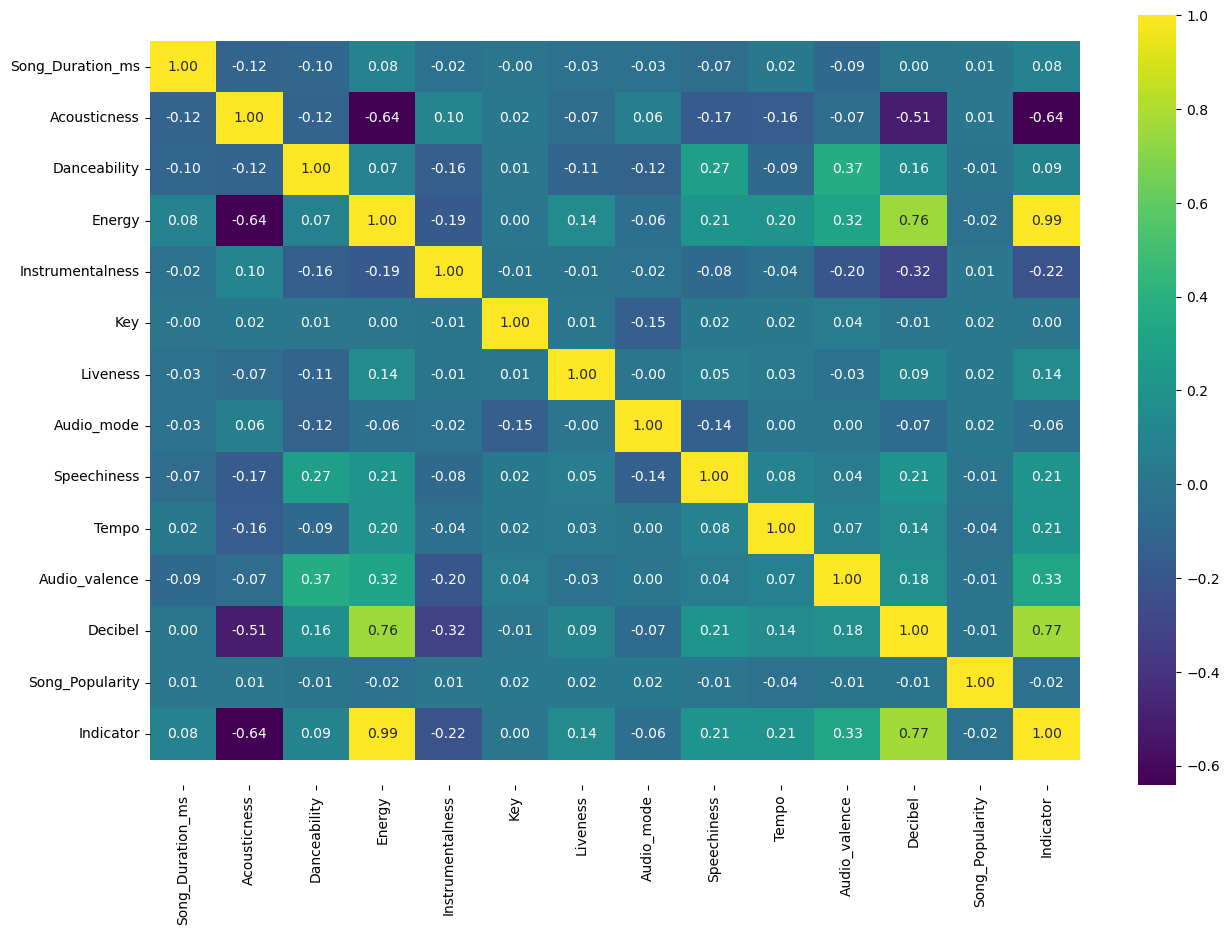

In [156]:
# Visualize the trained_data correlation through HeatMap
plt.rcParams['figure.figsize'] = (15, 10)
ax = sns.heatmap(trained_song_pop_data[num_cols].corr(), annot=True, fmt=".2f", cmap='viridis')

# Adjust the bottom and top margins to make sure the heatmap is displayed correctly
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

The heatmap indicates that features like `Decibel`, `Energy`, `Danceability`, and `Audio_valence` have the most notable (though still modest) correlations with `Song_Popularity`. The correlations are generally low, suggesting that no single feature has a strong direct impact on song popularity. Instead, the relationships are more subtle, and a combination of features likely influences popularity.

The `Indicator` variable seems to have very strong correlations with other features, especially `Energy`, suggesting it might be derived from or strongly associated with these features. However, its correlation with `Song_Popularity` is low (-0.02), indicating it might not directly influence popularity.

## 10: Report Summary <a id="10.0"></a>
[Back to Content](#Table-of-Content)

### 10.1 Introduction with Value Based Problem Statement; Problem Understanding <a id="10.1"></a>
[Back to Content](#Table-of-Content)

In the contemporary music industry, understanding the factors influencing a song's popularity is crucial for strategic decision-making. As a data analyst at XYZ Music Records Company, I was tasked with investigating the influence of various song characteristics on a song's popularity using the dataset 'song_popularity.csv'. This dataset included attributes such as acousticness, danceability, energy, instrumentalness, speechiness, and tempo.

The problem statement centered around optimizing resource allocation for marketing through predictive insights. I realized that a song's popularity could significantly affect revenue streams and marketing strategies. Therefore, identifying the most influential attributes became my primary goal. This analysis aimed to provide actionable insights to the management team, enabling data-driven decisions to enhance marketing efficacy and improve return on investment (ROI).

By employing a structured data wrangling process, I explored, preprocessed, and transformed the data. I then built and evaluated a linear regression model. This comprehensive approach ensured that I addressed any data quality issues, such as missing values and outliers, and applied appropriate transformations to improve model performance. Through detailed analysis and documentation, I aimed to uncover patterns and relationships within the dataset that could inform strategic marketing initiatives.

In summary, this report not only aimed to predict song popularity but also to provide a deeper understanding of the factors that drive it. The insights gained were instrumental in refining marketing strategies, thereby maximizing the potential for a song's success in the competitive music industry.

### 10.2 Exploratory Data Analysis <a id="10.2"></a>
[Back to Content](#Table-of-Content)

#### Data Exploration

To begin the exploratory data analysis, I loaded the dataset into a DataFrame and conducted a preliminary examination. The dataset, song_popularity.csv, contains various features such as song name, duration, acousticness, danceability, energy, instrumentalness, speechiness, tempo, and others. An initial preview of the data, which included displaying the first 20 rows, provided a good overview of its structure and some sample data points.

Firstly, I used .info() to check the size of the dataset. It contains 18 columns and 18,835 rows. This also revealed the presence of missing values in several columns, such as Danceability, Speechiness, and Dynamism. The data types were a mix of integers, floats, and objects.

Secondly, I used describe() to gain insights into the distribution of numerical variables. For example, the mean song duration is approximately 218,212 ms (around 3.6 minutes), and the average song popularity score is 42.36. These statistics also highlighted large variations in some features, such as song duration and loudness, which indicated potential outliers or the need for data transformation.

Thirdly, I quantified the missing values within the dataset. Quantifying missing values was a critical step to understand the extent of data incompleteness. Missing values were identified in several columns, with Danceability and Speechiness having significant gaps. Handling these missing values was crucial for accurate analysis and modeling.

Fourth, I identified the categorical and numerical variables. Identifying and segregating these types helped in applying appropriate preprocessing techniques. For instance, categorical variables required encoding, while numerical variables might need scaling or transformation to address skewness and improve model performance.

Fifth, I explored the unique values in each column. This provided insights into the data's diversity. For example, understanding the unique values with high repetition helped in making informed decisions during data cleaning and preprocessing.

Sixth, I explored the relationship between Song Popularity and other features to see how they influence the target variable. The three features I believed would provide a better understanding of how these features determine a song's popularity are 'Loudness', 'Liveness', and 'Energy'.

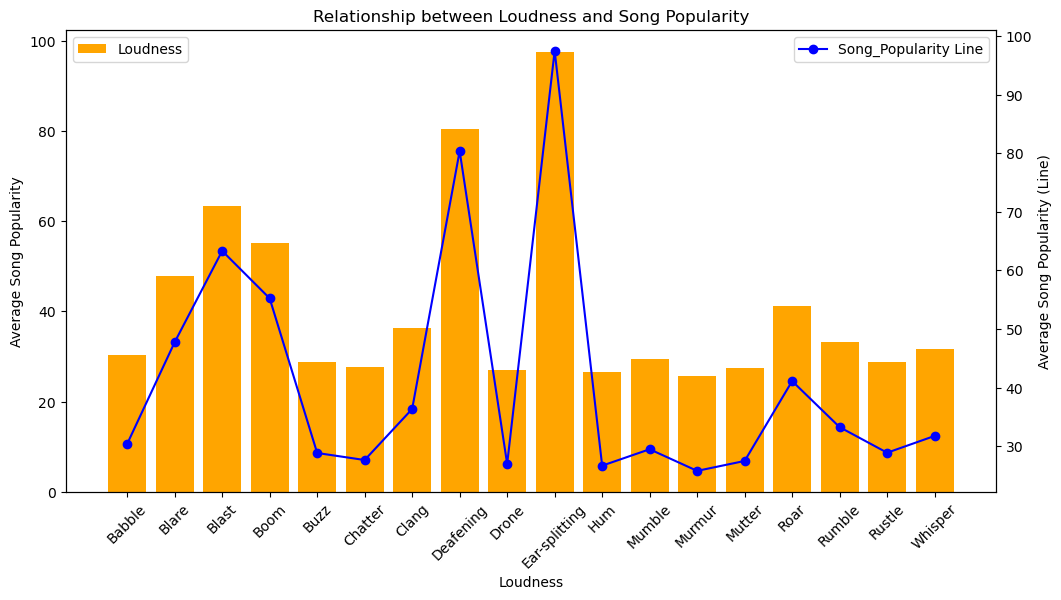
Loudness: The relationship between loudness and song popularity is complex and non-linear, with certain loudness levels correlating with higher popularity. Very high loudness levels ("Deafening" and "Ear-splitting") can lead to peaks in popularity, suggesting that listeners may prefer highly loud and energetic songs. However, the inconsistent popularity across other loudness categories indicates that loudness alone does not determine song popularity, and other musical factors are likely at play.

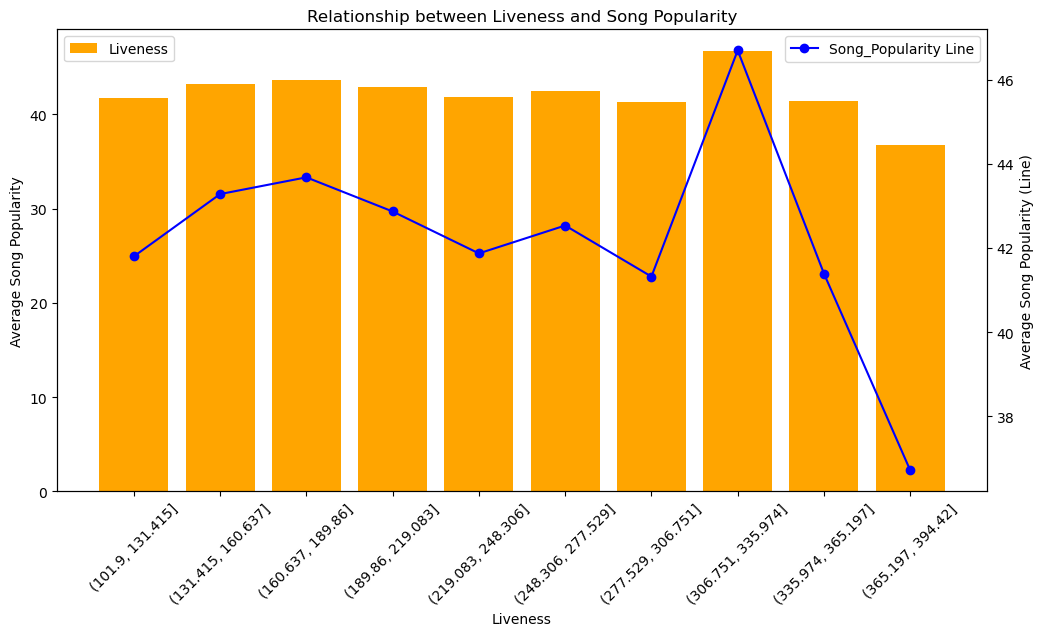
Liveness: The relationship between liveness and song popularity is non-linear, with a peak at mid to high liveness values, followed by a decline at very high liveness levels. This indicates that while some liveness is appreciated, too much can detract from a song's popularity. It suggests that there might be an optimal range for liveness that maximizes song popularity.

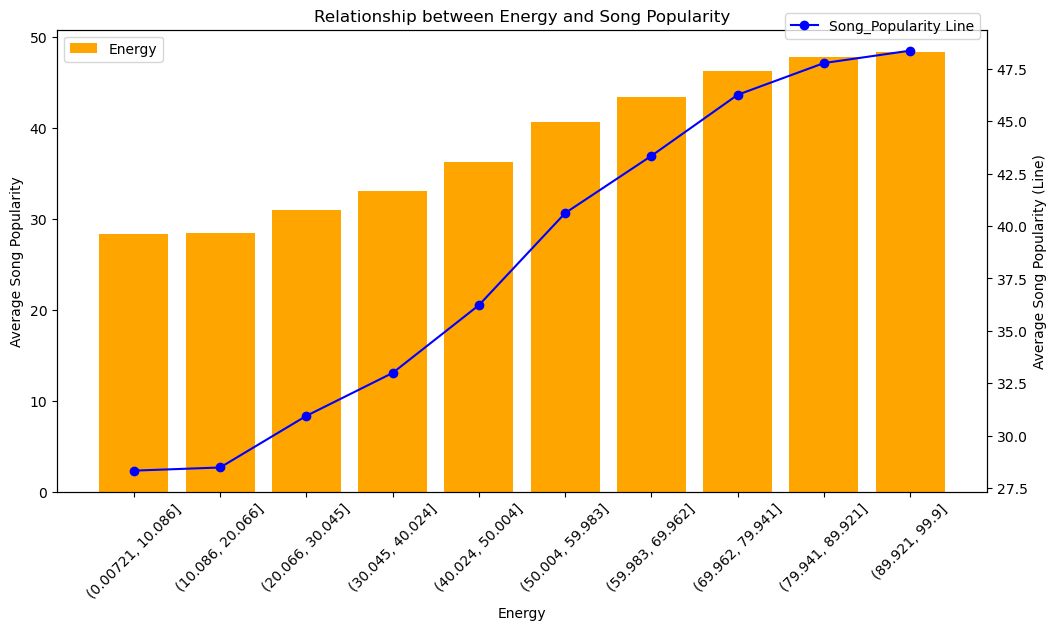
Energy: The relationship between energy and song popularity is strongly positive, with higher energy levels consistently associated with higher average song popularity. Songs with very low energy levels are less popular, but popularity increases steadily with rising energy levels, peaking in the highest energy ranges. This suggests that highly energetic songs are generally more appealing to listeners, and increasing the energy of a song can significantly enhance its popularity.

Lastly, I performed a correlation analysis to understand the relationships between different features. A heatmap was created to visualize these correlations, which helped in identifying multicollinearity issues and selecting important features for modeling. Based on the heatmap of the correlation matrix, several observations can be made regarding the relationships between the numerical variables in the dataset:

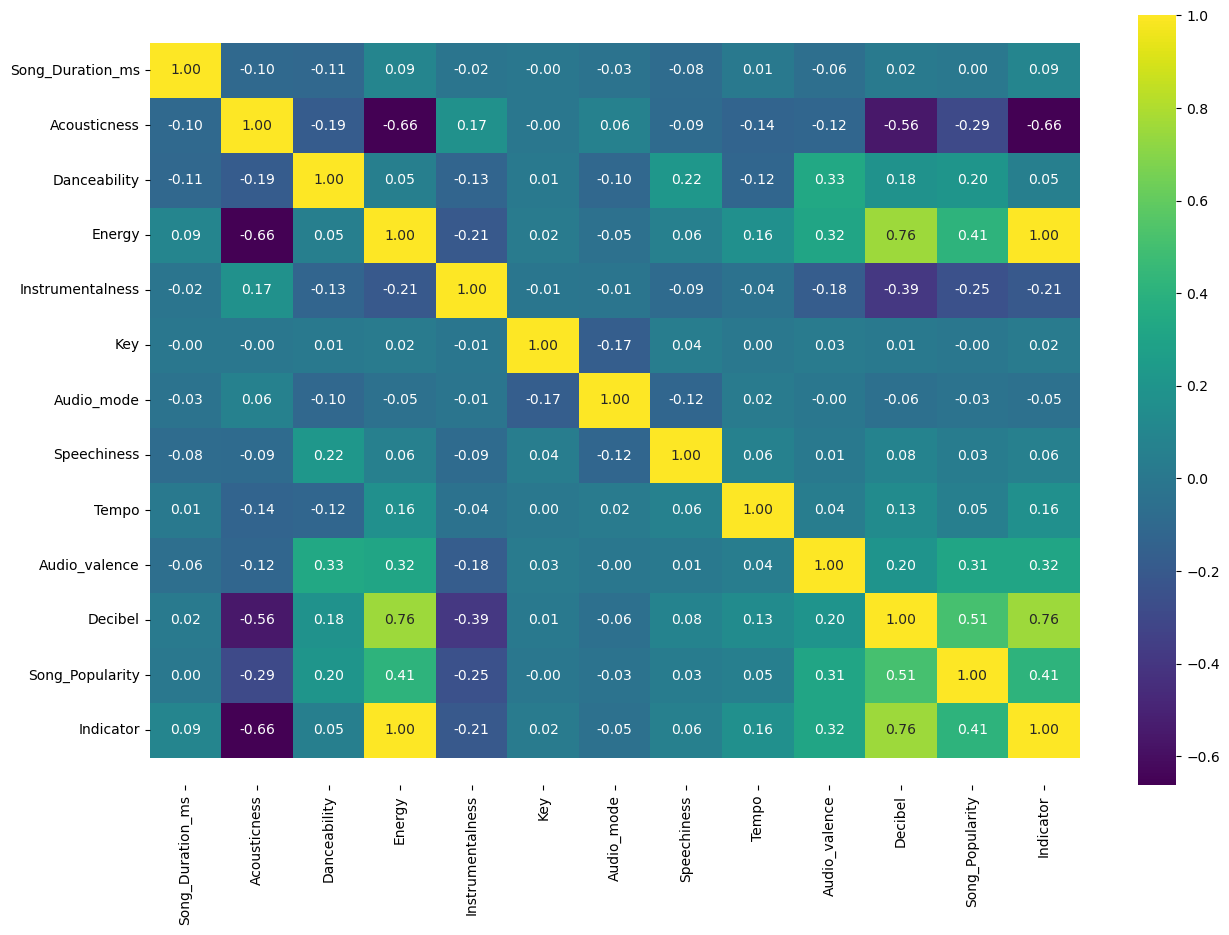

High Positive Correlations:
- **Energy and Decibel**: There is a strong positive correlation (`0.76`) between Energy and Decibel. This suggests that songs with higher energy levels tend to have higher decibel levels (louder volume).
- **Song_Popularity and Decibel**: There is a moderate positive correlation (`0.51`) between Song_Popularity and Decibel. Popular songs tend to be louder.
- **Song_Popularity and Energy**: There is a moderate positive correlation (`0.41`) between Song_Popularity and Energy. More popular songs tend to have higher energy levels.
- **Danceability and Audio_valence**: There is a positive correlation (`0.33`) between Danceability and Audio_valence. Songs that are more danceable tend to have higher valence (more positive emotions).

Negative Correlations:
- **Acousticness and Energy**: There is a strong negative correlation (`-0.66`) between Acousticness and Energy. Songs with high acousticness tend to have lower energy levels.
- **Acousticness and Decibel**: There is a moderate negative correlation (`-0.56`) between Acousticness and Decibel. Songs with high acousticness tend to be quieter.

Other Notable Correlations:
- **Instrumentalness and Acousticness**: There is a moderate positive correlation (`0.17`) between Instrumentalness and Acousticness. Instrumental songs tend to have higher acousticness.
- **Audio_valence and Energy**: There is a positive correlation (`0.32`) between Audio_valence and Energy. Songs with higher valence tend to have higher energy levels.

Weak or No Correlation:
- **Key, Tempo, Liveness, Audio_mode, Speechiness**: These variables show weak or no significant correlation with most other variables in the dataset.

In conclusion, the exploratory data analysis provided a comprehensive understanding of the dataset's structure, quality, and key characteristics. The insights gained laid the foundation for data preprocessing and modeling steps later. By addressing the identified issues and leveraging the observed patterns, this analysis aims to build a robust predictive model for song popularity, aiding XYZ Music Records Company in making informed, data-driven decisions for marketing and resource allocation.

### 10.3 Data Preprocessing <a id="10.3"></a>
[Back to Content](#Table-of-Content)

Data preprocessing is a crucial step in preparing the dataset for modeling. This step involves handling missing values, identifying and mitigating outliers, and transforming variables to ensure the data is in an optimal state for analysis. In the case of our dataset on song popularity, several preprocessing techniques were applied to address data quality issues and enhance the dataset's suitability for building a robust predictive model.

#### Missing Value Replacement

Firstly, handling missing values was one of the primary challenges in the dataset. Several columns, including Danceability and Speechiness, contained missing values. Missing values can skew the analysis and degrade model performance if not handled appropriately. Therefore, various imputation techniques were applied to replace the missing values with suitable estimates.

#### Dynamism Mapping

The Dynamism feature required mapping to a consistent scale. For example, 'Hi', 'High', and 'high' might all intend to represent the same level of dynamism but were recorded differently. Standardizing these entries ensured that the dataset was clean, consistent, and ready for further analysis or modeling. After mapping Dynamism, I further explored its relationship with other variables and identified significant patterns and trends.

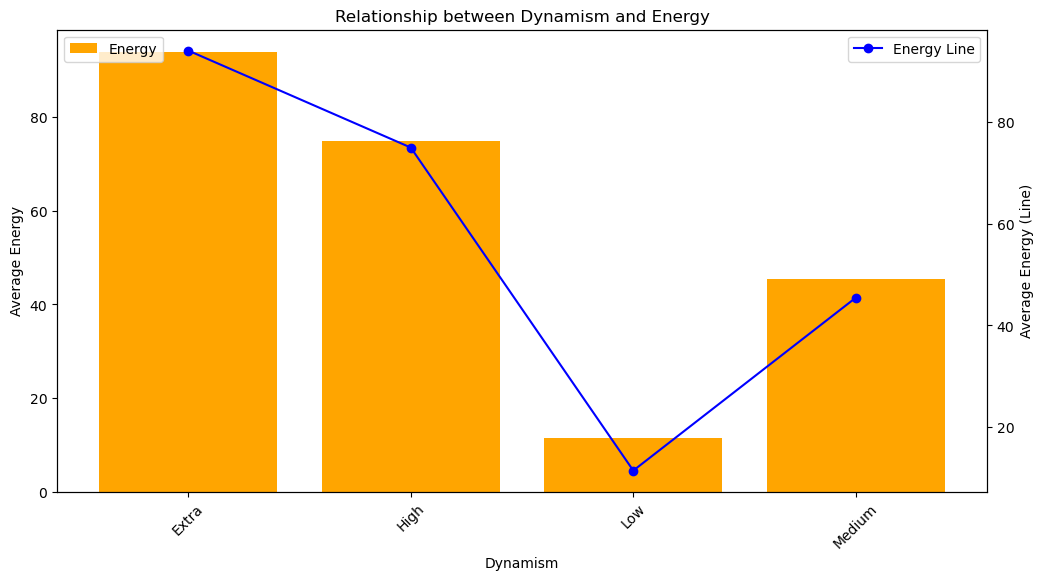

By examining the relationship between Dynamism and Energy, we can gain insights into how these characteristics interact and influence each other. For example:

- **Extra Dynamism**: Songs with "Extra" dynamism have the highest average energy levels, indicating that these songs are highly intense and active.
- **High Dynamism**: The energy levels for songs with "High" dynamism are also quite elevated, but slightly lower than those with "Extra" dynamism.
- **Medium Dynamism**: Energy levels are moderate for "Medium" dynamism, suggesting a balanced intensity.
- **Low Dynamism**: Songs with "Low" dynamism have the lowest average energy, indicating these songs are the least intense and active.

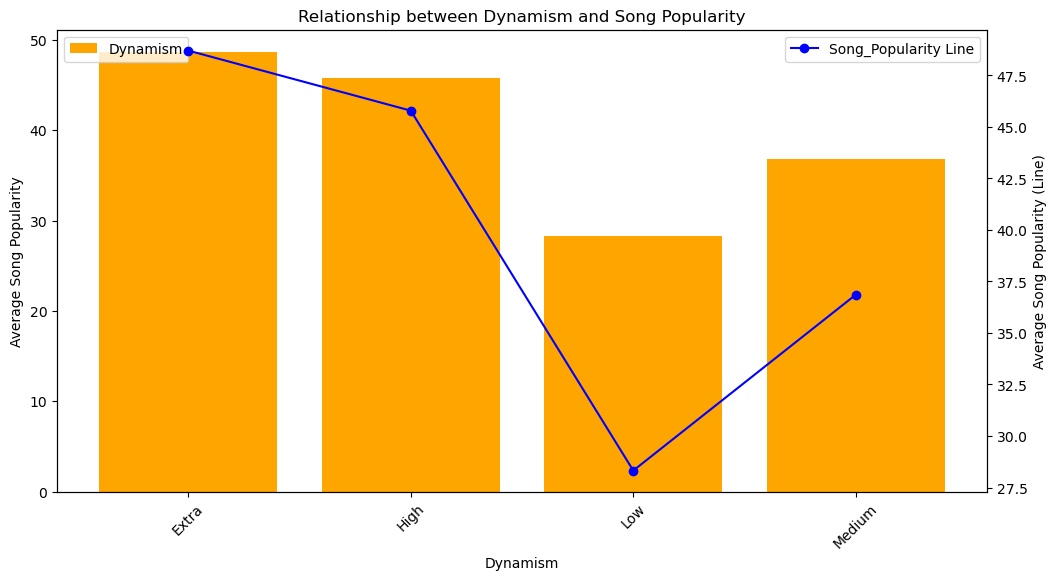

By examining the relationship between Dynamism and Song Popularity, we can gain insights into how the variability in a song's structure and intensity might influence its popularity among listeners. For example:

- **Extra Dynamism**: Songs with "Extra" dynamism are among the most popular, showing that high dynamism can be associated with higher popularity.
- **High Dynamism**: Similarly, songs with "High" dynamism also enjoy high popularity.
- **Medium Dynamism**: These songs have moderate popularity, slightly lower than "Extra" and "High" but still significant.
- **Low Dynamism**: Songs with "Low" dynamism are the least popular, indicating a potential preference for more dynamic and active songs among listeners.

#### Liveness Discrepancy

For the Liveness feature, I discovered a discrepancy. Although Liveness was supposed to be a floating-point number, the 'song_pop_data.dtypes' check showed it as an object. I converted the Liveness column to numeric to match the expected data type in the dataset. This step was crucial for ensuring the accuracy of subsequent analyses involving the Liveness variable.

#### Diagnostic Plot & Transformation of Variables

Creating diagnostic plots was an essential part of identifying data quality issues. Box plots, histograms, and Q-Q plots were used to visualize the distribution of numerical variables, helping to spot outliers and assess the need for data transformation.

- **Box Plots**: These plots were particularly useful for detecting outliers. For example, the box plot of song duration revealed extreme values that could distort the analysis.
- **Histograms**: These provided a view of the data distribution, highlighting skewed variables that might benefit from transformation.
- **Q-Q Plots**: Used to assess the normality of the data, these plots helped determine whether certain transformations were needed to achieve a normal distribution.

#### Removing Outliers

Before splitting the dataset, I had to trim the outliers to reduce their influence and improve the fit and robustness of the regression model. I used the following methods to remove variables like 'Speechiness', 'Song_Duration_ms', 'Decibel', 'Song_popularity', and 'Energy':

- **Trimming Method**: Extreme outliers were removed from the dataset. This method was particularly effective for variables where outliers could significantly skew the analysis, such as song duration and energy.
- **Winsorization Method**: This technique involved capping the extreme values to a certain percentile. By replacing extreme values with the nearest acceptable values, the impact of outliers was mitigated without losing data points.

#### Removing Null Values for Liveness

After noticing that the Liveness column had one null value, I decided to drop it to avoid potential issues in later steps.

By preprocessing the data, we ensured that the dataset was well-prepared for the next steps in the analysis. This rigorous preprocessing laid the foundation for building a reliable and accurate predictive model for song popularity, ultimately enabling XYZ Music Records Company to make data-driven decisions for optimizing marketing strategies.

### 10.4 Data Transformation <a id="10.4"></a>
[Back to Content](#Table-of-Content)

#### Missing Value Imputation

To address the missing data in some variables, I used several imputation methods.

Firstly, I employed arbitrary imputation. This method replaces missing values with a constant value that is not necessarily derived from the data's statistics but is chosen based on domain knowledge or other external reasoning. This approach is particularly useful when the missing data does not follow a specific pattern and when domain knowledge suggests a reasonable replacement value.

Secondly, I used frequent category imputation for categorical data. This method involves replacing missing values with the most frequently occurring category (or mode) within each feature. This approach helps to retain the most common data patterns and minimize the impact of missing values on the overall analysis.

By using an imputation pipeline to impute missing data, I ensured:

- **Versatility in Application**: The ability to use both arbitrary and frequent category imputation methods allows adaptation to different types of missing data within the same dataset—whether numerical or categorical. This versatility is key to handling complex datasets where different variables may require different imputation strategies.

- **Enhanced Model Reliability**: By intelligently filling missing values, the data fed into models is complete and representative, enhancing the reliability and validity of the model outputs.

- **Data Cohesion and Accuracy**: These methods together help maintain the cohesion and accuracy of the dataset, ensuring that subsequent analyses or decisions based on this data are well-founded and robust.

#### Catgeorical Data Encoding

For categorical data encoding, I started by dropping 'Song_Name' and 'Code' as they are generally arbitrary with respect to predictive modeling objectives, such as predicting song popularity or user preferences. These columns do not inherently carry information that would help a model learn meaningful patterns.

Next, I carried out ordinal encoding, which is effective for handling ordered categorical data. It preserves the natural ordering of data, ensures compatibility with various algorithms, and can enhance the performance and interpretability of the resulting models. While I experimented with one-hot encoding and count frequency encoding, I ultimately decided to use ordinal encoding for its effectiveness.

Next, I used the Yeo-Johnson Transformation as it helps a powerful statistical technique used to stabilize variance and normalize data distributions that are not normally distributed. This transformation is an extension of the Box-Cox transformation and can be applied to both positive and negative values, making it versatile for a wider range of data types. Here are some before and after comparison for these 4 variables 'Acousticness', 'Liveness', 'Speechiness' and 'Tempo'.

Before (Acousticness)
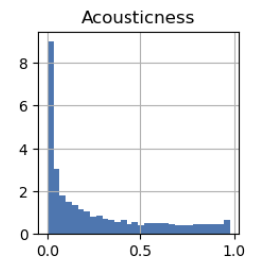

After (Acousticness)
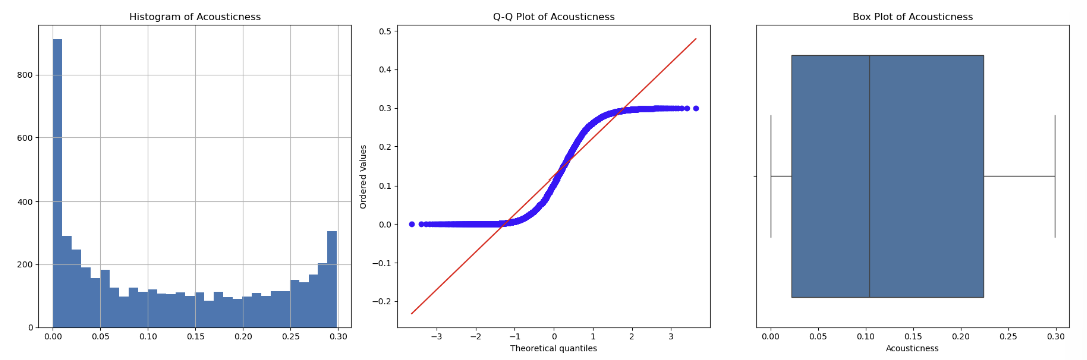

Before (Liveness)
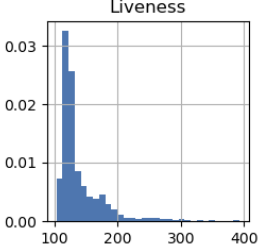

After (Liveness)
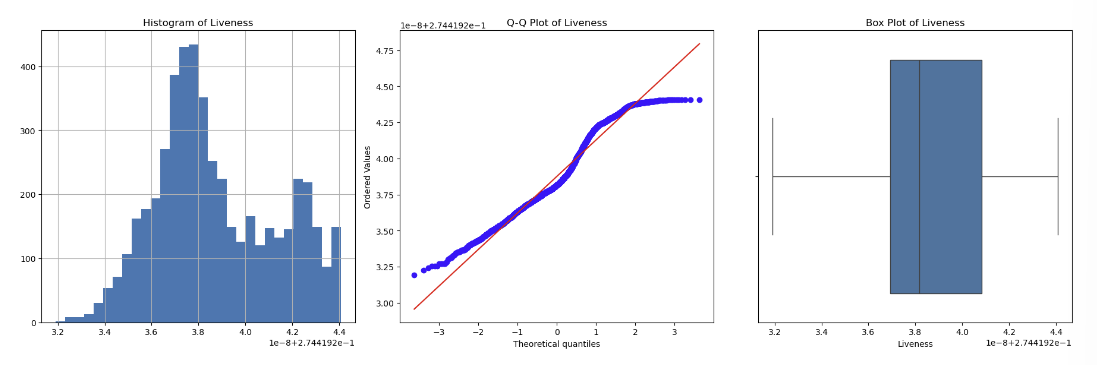

Before (Speechiness)
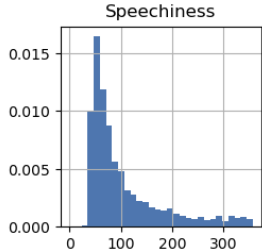

After (Speechiness)
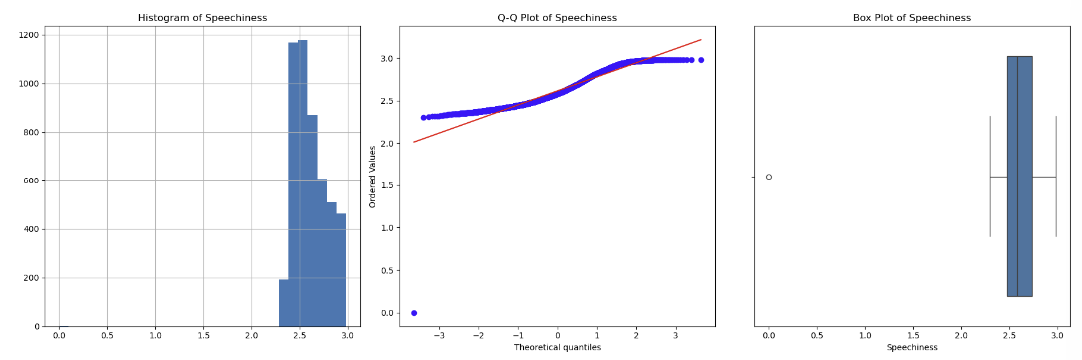

Before (Tempo)
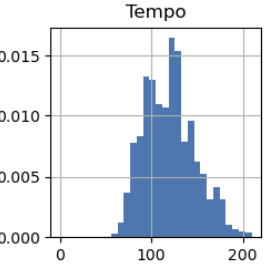

After (Tempo)
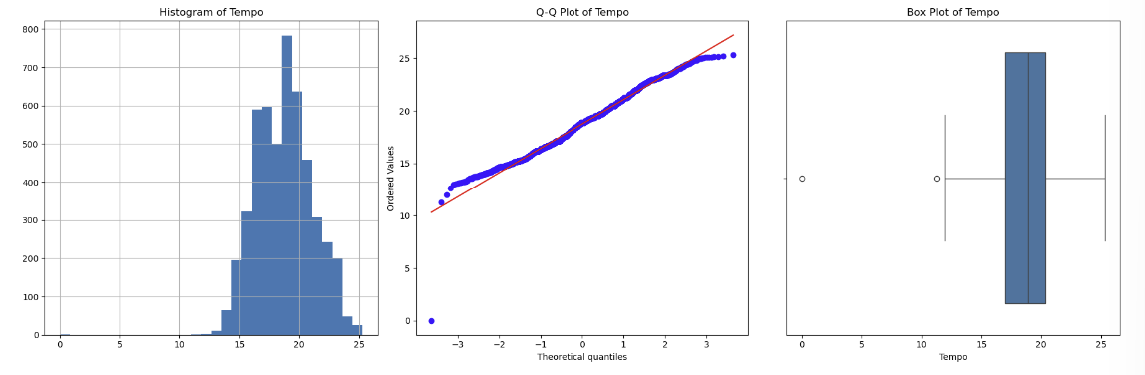

#### Yeo-Johnson Transformation

The Yeo-Johnson transformation significantly improved the distribution of the variables by addressing skewness and bringing the data closer to a normal distribution. Here's how this benefits your analysis:

- **Stabilizing Variance**: By transforming the data to have a more normal distribution, the Yeo-Johnson transformation helps stabilize variance, making the data more suitable for statistical modeling.

- **Improving Model Performance**: Models that assume normality, such as linear regression, will perform better with transformed data, leading to more accurate and reliable predictions.

#### Variable Discretization/Binning

Next, I explored the use of Equal-width dicretization and Equal-frequency discretization. However, after implementing and evaluating these discretization methods, I found that they did not significantly improve my model's performance. The transformed features did not enhance the predictive power of the model, and in some cases, they even introduced additional complexity without corresponding benefits.

As a result, I decided not to include these discretization techniques. The code for these steps is commented out to document the process and findings, but it is not executed as part of the current workflow.

### 10.5 Feature Enginner <a id="10.5"></a>
[Back to Content](#Table-of-Content)

#### Standardization

In data preprocessing, standardizing the data is a great way to ensure that the model perform optimally. I'll be showing the before and after applying standardization, the purpose of scaling, and the observations made during this process.

#### Initial State of Data: Before Standardization
Initially, the numerical variables in X_train_v2 exhibited significant variations in scale and distribution. The histograms plotted revealed that many variables were highly skewed or had non-uniform distributions:

- **Skewness in Distribution**: Variables such as 'Song_Duration_ms', 'Acousticness', and 'Energy' were heavily skewed, indicating that most of the data points were clustered around certain values, with long tails extending towards higher or lower values.

##### Purpose of Standardization
Standardization transforms the data to have a mean of zero and a standard deviation of one. This is crucial for the following reasons:

- **Equal Weighting**: By standardizing the data, we ensure that each feature contributes equally to the model’s predictions, preventing features with larger ranges from dominating the learning process.
- **Improved Convergence**: Algorithms like gradient descent converge more quickly when the data is standardized, as it helps in maintaining a uniform scale across features, thereby avoiding steep gradients.
- **Enhanced Model Performance**: Standardized data often leads to better model performance, especially for algorithms sensitive to feature scaling, such as logistic regression, support vector machines (SVM), and neural networks. These algorithms perform better when the input features are on a similar scale.

#### Before and After

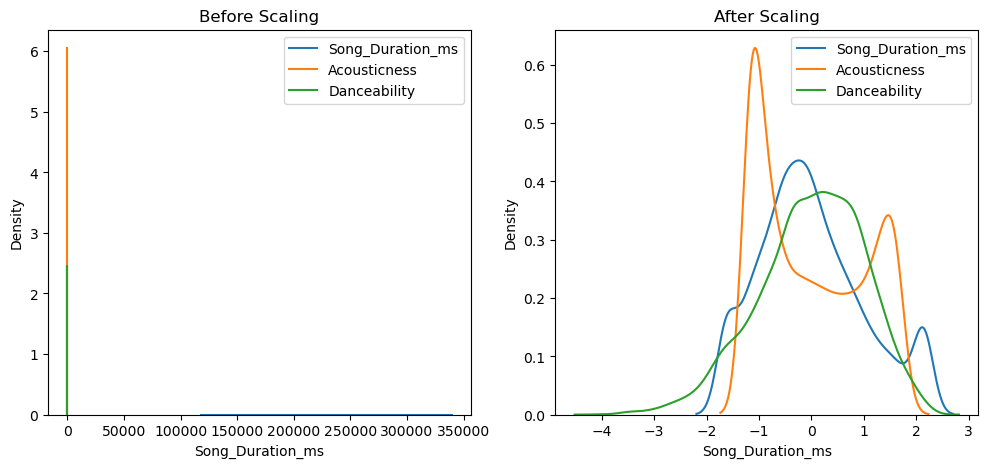
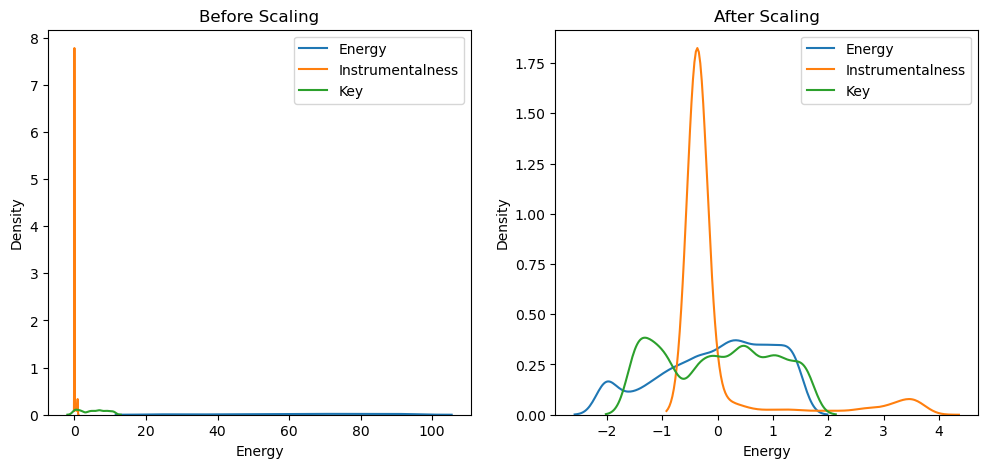
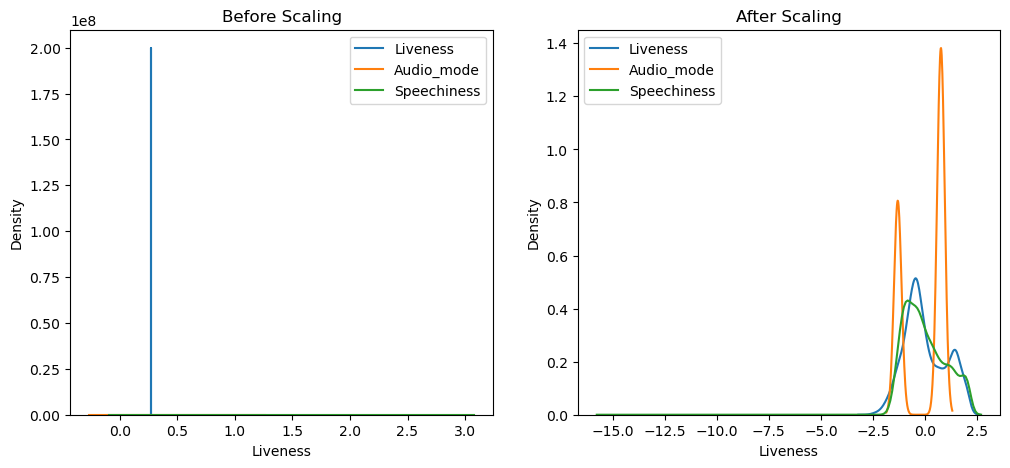
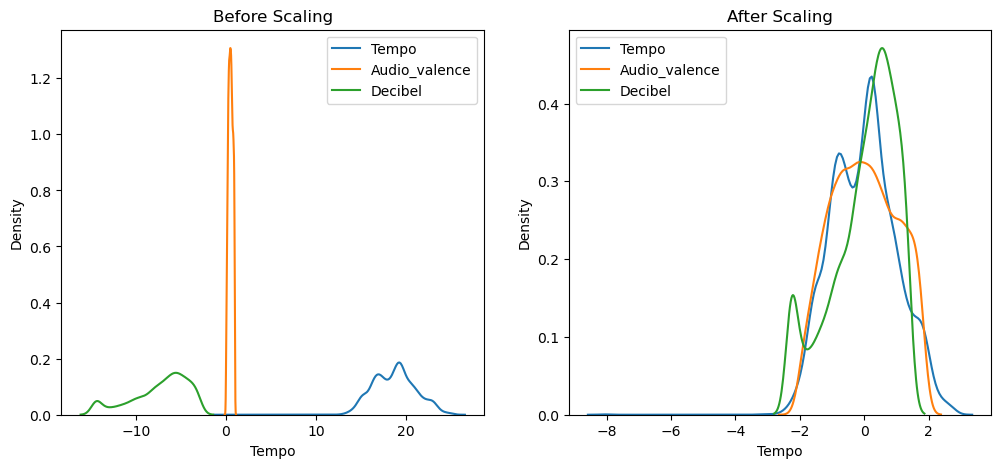
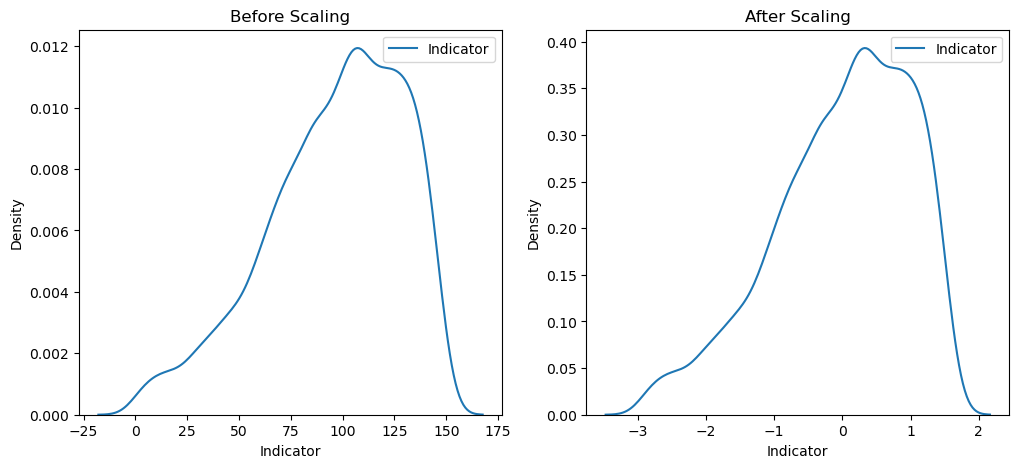

To visualize the impact of standardization, the before and after plots highlight the transformation:

- **Before Standardization**: The histograms show significant skewness and variability in scales across different features.
- **After Standardization**: The distributions are centered around zero with a standard deviation of one, demonstrating the normalization effect of standardization.

#### Observations after Standardization
After applying standardization, we observed significant improvements in the distributions of our variables:

- **Normalized Distributions**: The histograms of the variables post-standardization showed that the data was centered around zero with a standard deviation of one. This normalization was evident in the density plots, where previously skewed distributions appeared more Gaussian.
- **Uniform Scales**: The scale of all variables was now uniform, which is particularly beneficial for algorithms relying on distance calculations. The density plots before and after scaling highlighted this change clearly.
- **Enhanced Interpretability**: With standardized data, the coefficients in linear models become more interpretable. For instance, the magnitude of the coefficients can be directly compared to understand the relative importance of different features in predicting the target variable.
- **Robustness to Outliers**: While standardization does not directly address outliers, it helps in making the data more robust. The effect of outliers is minimized since the data is scaled to have a mean of zero and a standard deviation of one, preventing extreme values from having an undue influence.

All in all, standardization helped to improve the distribution of variables by addressing skewness and scaling disparities. This process ensures that the data is well-prepared for modeling, enhancing both the convergence of algorithms and the overall performance of the predictive models. This also resulted in a slight improvement in my MSE figures, demonstrating the effectiveness of standardization in achieving more accurate and reliable predictions.

### 10.6 Linear Regression Modelling <a id="10.6"></a>
[Back to Content](#Table-of-Content)

#### Introduction
Linear regression is a foundational machine learning algorithm used to predict a continuous target variable based on one or more predictor variables. The goal is to fit a linear relationship between the independent variables (features) and the dependent variable (target). The optimal values of intercept and coefficients are determined to minimize the prediction errors.

#### Building and Evaluating the Model

##### Data Preparation
Before building the linear regression model, the data underwent thorough preprocessing, which included handling missing values, encoding categorical variables, and scaling the features to ensure uniformity.

1. **Handling Missing Values**: Missing data were imputed using appropriate strategies to ensure completeness.
2. **Encoding Categorical Variables**: Categorical features were converted into numerical format using encoding techniques.
3. **Scaling**: StandardScaler was used to standardize the features, ensuring that each feature contributed equally to the model’s predictions.

##### Model Implementation
The fully cleaned and transformed data was assigned to training and testing sets. The LinearRegression model from `sklearn` was then instantiated and fitted to the training data.

##### Performance Metrics
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors between predicted and actual values. Lower MSE indicates better model performance.
- **R-Square (R²)**: Represents the proportion of variance in the dependent variable explained by the independent variables. Higher R² values (closer to 1) indicate a better fit.

##### Observations
- **Model Fit**: The model provided a reasonable fit, with the R² values indicating a decent amount of variance explained by the model. However, the model's performance could be further improved by addressing potential overfitting or underfitting issues.
- **Error Analysis**: The MSE values provided insight into the model’s accuracy, indicating areas where predictions deviated from actual values.

#### Results
After much experimentation to improve my model performance, these are the results I have gotten along the way.

**Initial (Dropped Dynamism & Loudness)**
- train_mse: 117.88635822886326
- test_mse: 119.57949554661678
- train_r-sq: 0.39301564160028757 
- test_r-sq: 0.38817755126835496

**Before Feature Engineer (Dropped Code & Song name)**
- train_mse: 101.8941300405396 
- test_mse: 103.9318017525816
- train_r-sq: 0.3858663516681492 
- test_r-sq: 0.3606776463181488

**After Feature Engineer (Final)**
- train_mse: 101.89413003829577 
- test_mse: 103.93180170819184
- train_r-sq: 0.38586635168167316 
- test_r-sq: 0.3606776465912065

To better understand the relationships and model performance, the transformed dataset was visualized using a heatmap to display the correlation between features and the target variable.

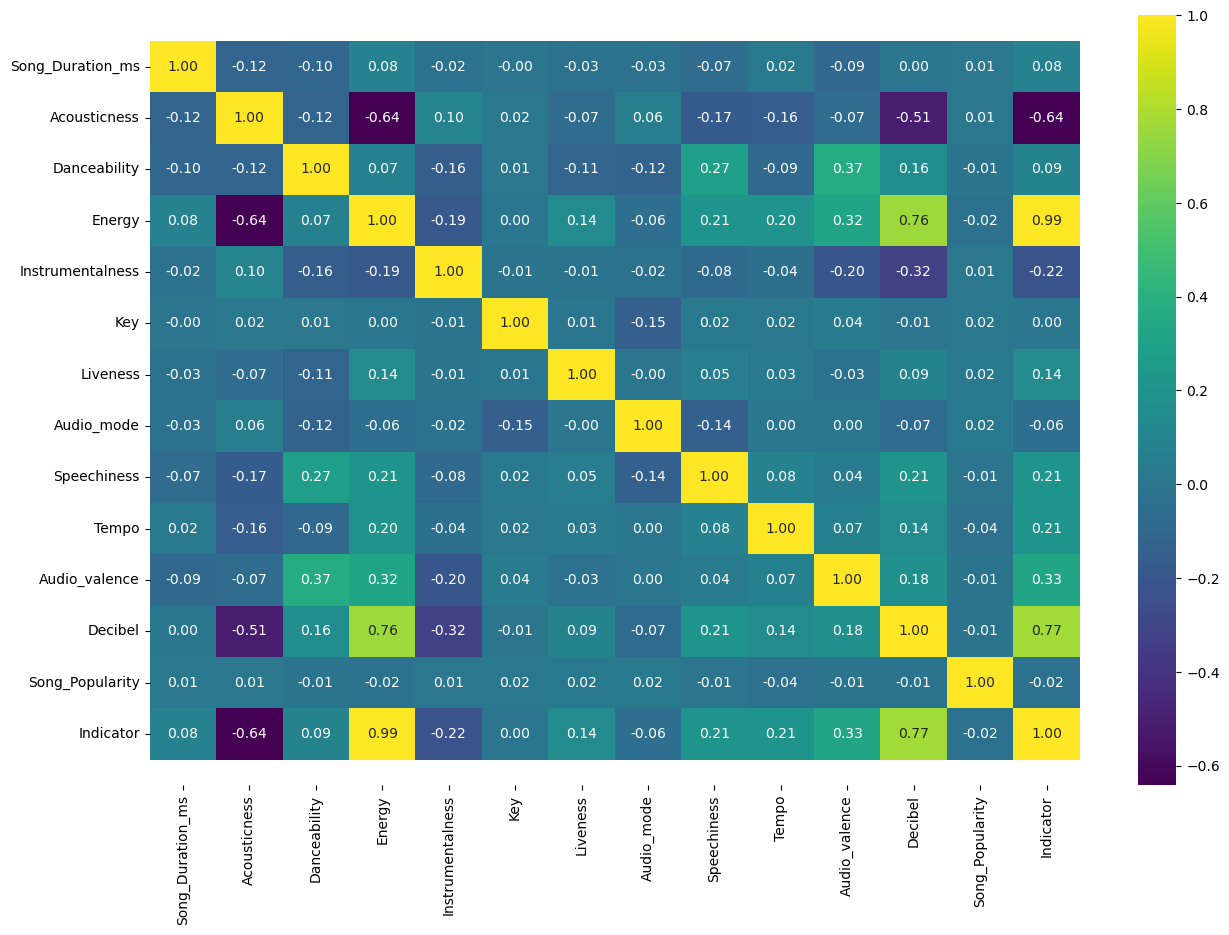

The heatmap indicates that features like Decibel, Energy, Danceability, and Audio_valence have the most notable (though still modest) correlations with Song_Popularity. The correlations are generally low, suggesting that no single feature has a strong direct impact on song popularity. Instead, the relationships are more subtle, and a combination of features likely influences popularity.

The Indicator variable seems to have very strong correlations with other features, especially Energy, suggesting it might be derived from or strongly associated with these features. However, its correlation with Song_Popularity is low (-0.02), indicating it might not directly influence popularity.

Overall, the linear regression model provided valuable insights into the factors influencing song popularity, underscoring the importance of comprehensive data preprocessing and the potential for further model optimization.

### 10.7 Conclusion <a id="10.7"></a>
[Back to Content](#Table-of-Content)

#### Summary of Findings

The linear regression model developed to predict song popularity underwent several iterations to optimize performance. Initially, dropping features like Dynamism and Loudness resulted in a train MSE of 117.89 and a test MSE of 119.58, with R² values indicating a moderate fit. After dropping less relevant features like Code and Song name, the model's performance improved, reducing the train MSE to 101.89 and test MSE to 103.93, although the R² values slightly decreased. Finally, feature engineering was applied, resulting in minimal changes to the MSE and R² values.

#### Recommendations for Further Improvement

1. **Exploring Discretization**: While discretization techniques such as equal-width and equal-frequency discretization were initially explored, they were not successfully integrated. Revisiting these methods and properly fitting them might help in capturing non-linear relationships and improving model performance.

2. **Enhancing Domain Knowledge**: Improving domain knowledge on song popularity and understanding what each feature represents could provide deeper insights and potentially more effective feature engineering. This involves studying the music industry, trends in song popularity, and the impact of various musical attributes on a song's success.

3. **Applying Principal Component Analysis (PCA)** It could help in reducing the dimensionality of the dataset while retaining most of the variance. PCA can transform the original features into a set of orthogonal components, which can improve the model's performance by eliminating multicollinearity and reducing noise. By focusing on the principal components, the model can become more robust and potentially more accurate, as it leverages the most informative aspects of the data.

By implementing these recommendations in the future, I can further enhance the predictive accuracy and robustness of the model, leading to more reliable predictions and providing more insightful results.

### 10.8 References <a id="10.8"></a>
[Back to Content](#Table-of-Content)

ChatGPT: https://chatgpt.com/?model=text-davinci-002-render-sha
Song Popularity Analysis: https://www.kaggle.com/code/paulandrewpaglinawan/song-popularity-analysis
Song Popularity Prediction - (Best ML Models): https://www.kaggle.com/code/yasserh/song-popularity-prediction-best-ml-models
Song Popularity Prediction - 📊EDA + MODELLING📊: https://www.kaggle.com/code/odins0n/song-popularity-prediction-eda-modelling
Song Popularity EDA - Live Coding Fun: https://www.kaggle.com/code/headsortails/song-popularity-eda-live-coding-fun